In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the data 
sparkling = pd.read_csv('Sparkling.csv')

In [3]:
sparkling.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
sparkling.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [5]:
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [6]:
#Check data types
sparkling.dtypes

YearMonth    object
Sparkling     int64
dtype: object

### Pandas is reading YearMonth as an object and not a date time index

### We will provide inputs to tell pandas that we are trying to work with time series.

In [7]:

sparkling = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [8]:
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [9]:
#Check data types again
sparkling.dtypes

Sparkling    int64
dtype: object

In [10]:
sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [11]:
sparkling.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

### We can conveniently do slicing i.e. obtain data for a specific time period.

In [12]:

sparkling['1990-03-01':'1995-03-01']

Sparkling
YearMonth            
1990-03-01       1859
1990-04-01       1628
1990-05-01       1615
1990-06-01       1457
1990-07-01       1899
...               ...
1994-11-01       3729
1994-12-01       5999
1995-01-01       1070
1995-02-01       1402
1995-03-01       1897

[61 rows x 1 columns]

In [13]:
#We can check values corresponding to a specific time point
sparkling.loc['1980-05-01']

Sparkling    1471
Name: 1980-05-01 00:00:00, dtype: int64

## Plot the Time Series to understand the behaviour of the data.

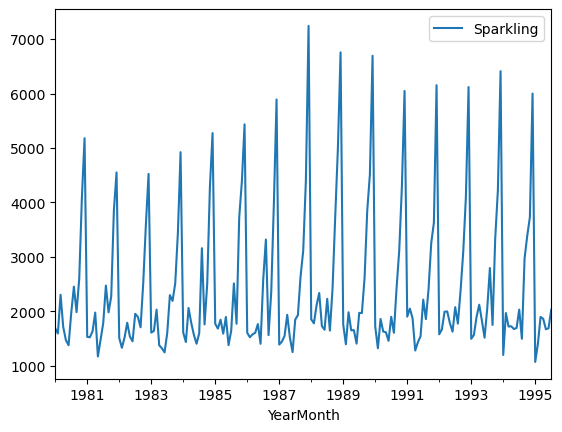

In [14]:
#Plot the time series
sparkling.plot()
plt.show()

### Increase the figure size

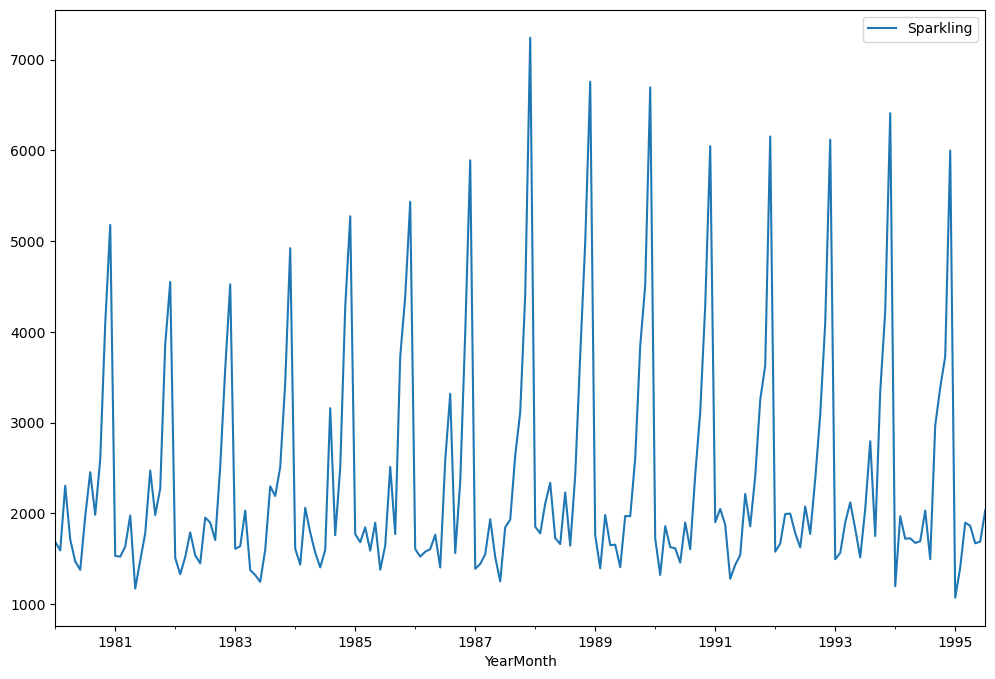

In [15]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
sparkling.plot()
plt.show()

## Missing Value Handling

In [16]:
sparkling.isna().sum()

Sparkling    0
dtype: int64

There are no missing values in the dataset.

## Explore Log Transformation

In [17]:

sparkling_log = sparkling.copy()

In [18]:
sparkling_log['Sparkling'] = np.log(sparkling)

In [19]:
sparkling_log.Sparkling

YearMonth
1980-01-01    7.430114
1980-02-01    7.372118
1980-03-01    7.742402
1980-04-01    7.445418
1980-05-01    7.293698
                ...   
1995-03-01    7.548029
1995-04-01    7.529406
1995-05-01    7.420579
1995-06-01    7.431300
1995-07-01    7.616284
Name: Sparkling, Length: 187, dtype: float64

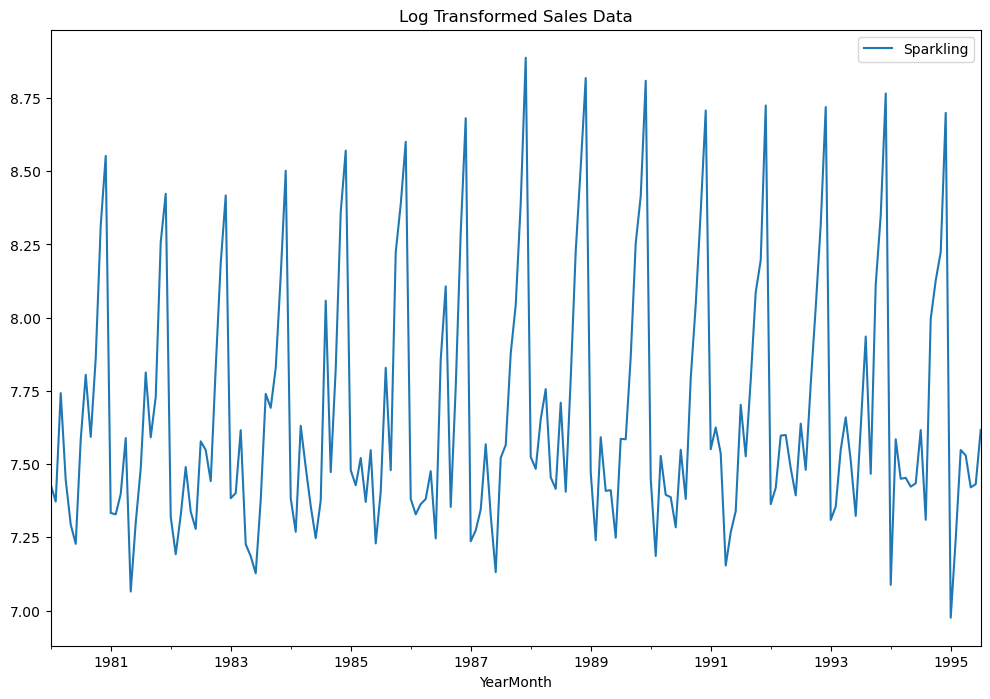

In [20]:
#Visualize the log transformed series
sparkling_log.plot()
plt.title('Log Transformed Sales Data')
plt.show()

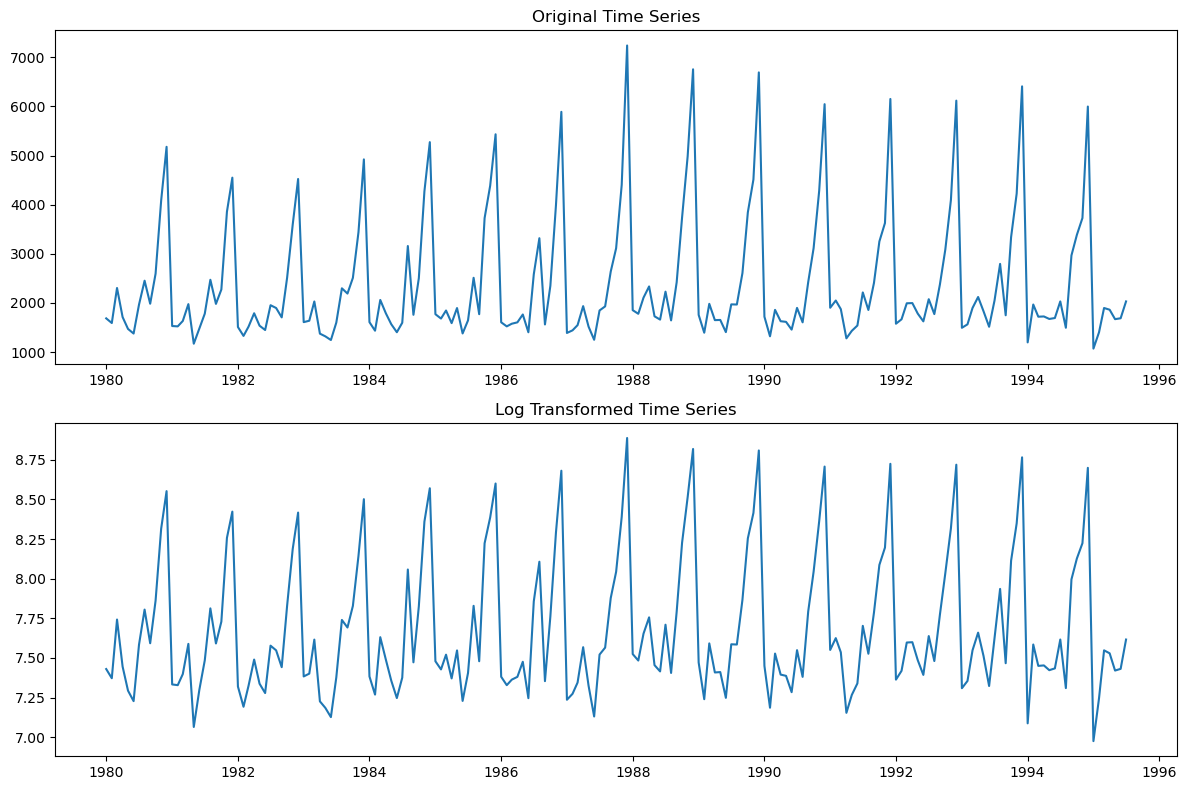

In [21]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(sparkling)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(sparkling_log)
plt.tight_layout()

## Downsampling

In [22]:
#Let's change the monthly series to quarterly. This would require aggregation.
sparkling_q = sparkling.resample('Q').mean()

<Axes: xlabel='YearMonth'>

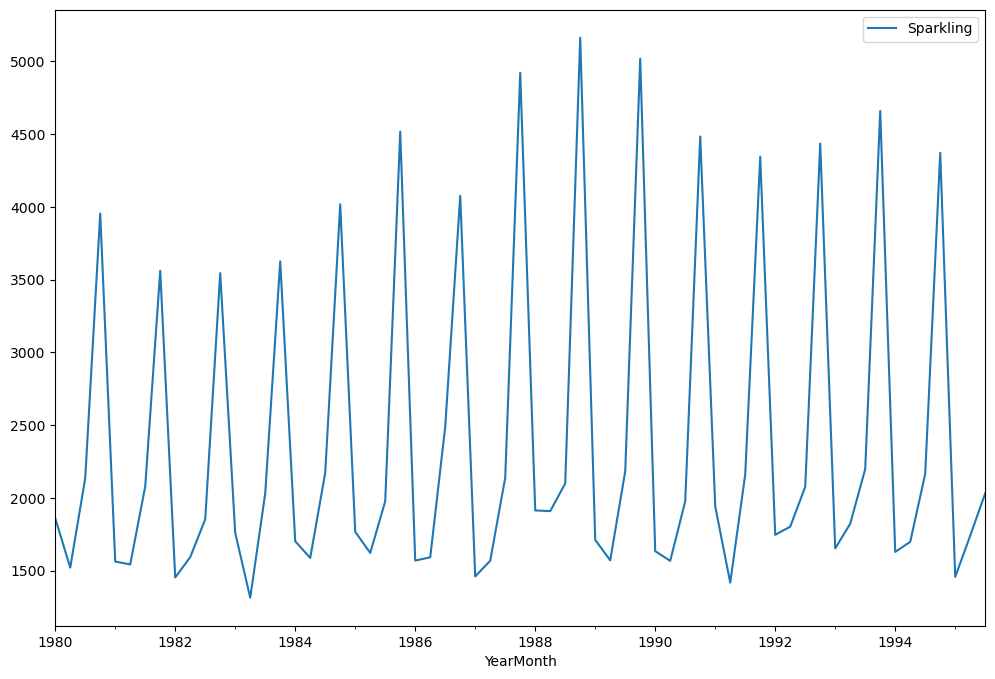

In [23]:
sparkling_q.plot()

<Axes: xlabel='YearMonth'>

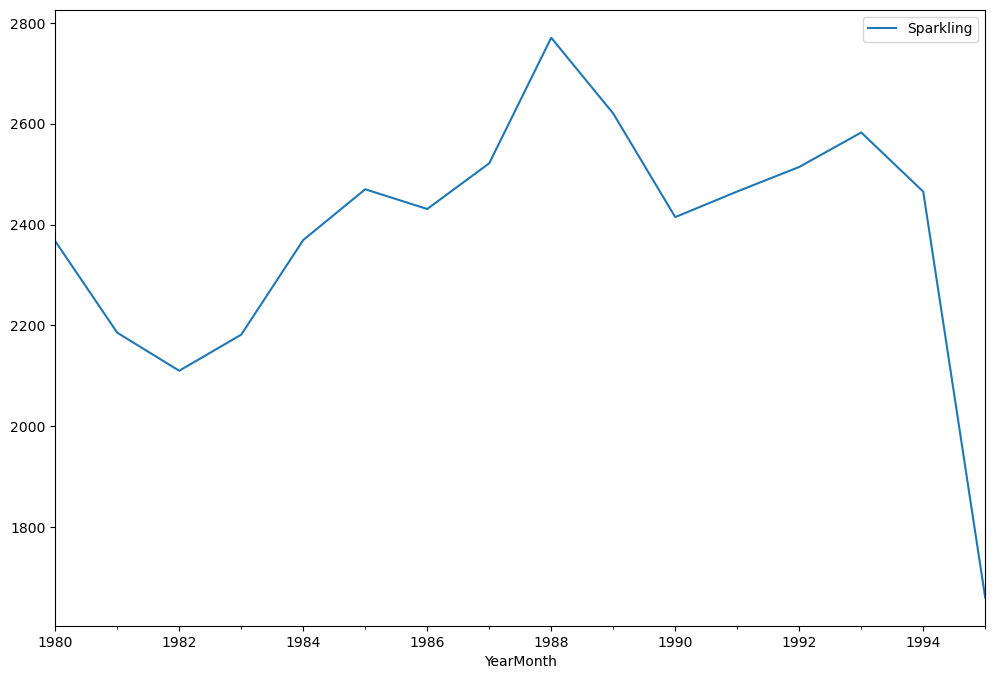

In [24]:
#Let's change the monthly series to yearly. This would require aggregation.
sparkling_y = sparkling.resample('Y').mean()
sparkling_y.plot()

## Upsampling

In [25]:
#Let's change the monthly series to daily. 
sparkling_d = sparkling.resample('D').ffill()
sparkling_d['1980-02']

Sparkling
YearMonth            
1980-02-01       1591
1980-02-02       1591
1980-02-03       1591
1980-02-04       1591
1980-02-05       1591
1980-02-06       1591
1980-02-07       1591
1980-02-08       1591
1980-02-09       1591
1980-02-10       1591
1980-02-11       1591
1980-02-12       1591
1980-02-13       1591
1980-02-14       1591
1980-02-15       1591
1980-02-16       1591
1980-02-17       1591
1980-02-18       1591
1980-02-19       1591
1980-02-20       1591
1980-02-21       1591
1980-02-22       1591
1980-02-23       1591
1980-02-24       1591
1980-02-25       1591
1980-02-26       1591
1980-02-27       1591
1980-02-28       1591
1980-02-29       1591

<Axes: xlabel='YearMonth'>

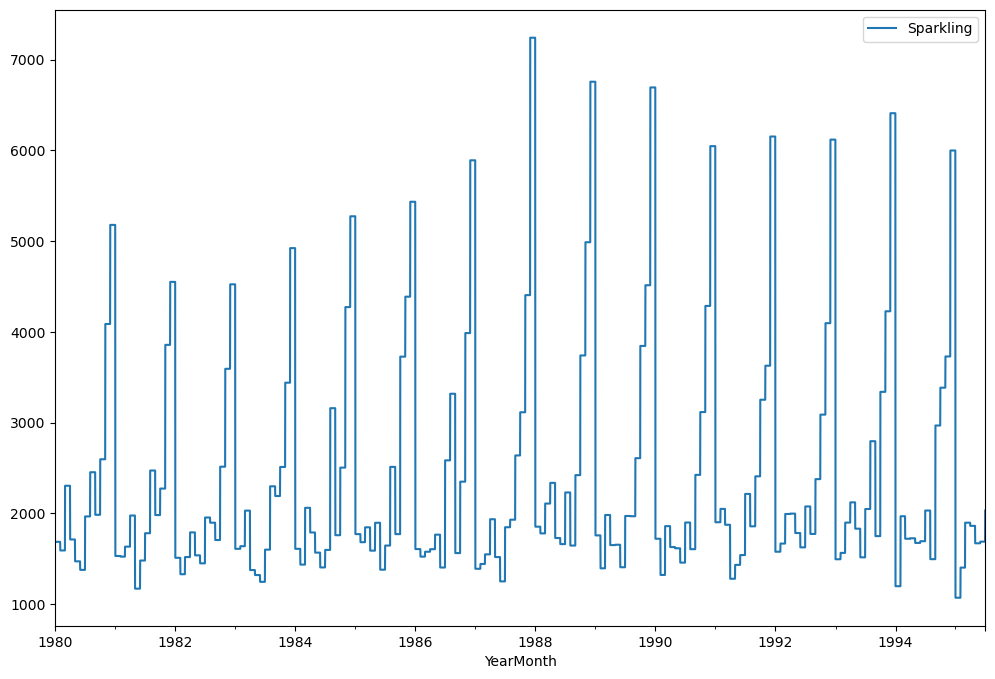

In [26]:
sparkling_d.plot()

# Find the mean and median of the monthly sparkling wine production.

In [27]:
sparkling.describe().round(2)

Sparkling
count     187.00
mean     2402.42
std      1295.11
min      1070.00
25%      1605.00
50%      1874.00
75%      2549.00
max      7242.00

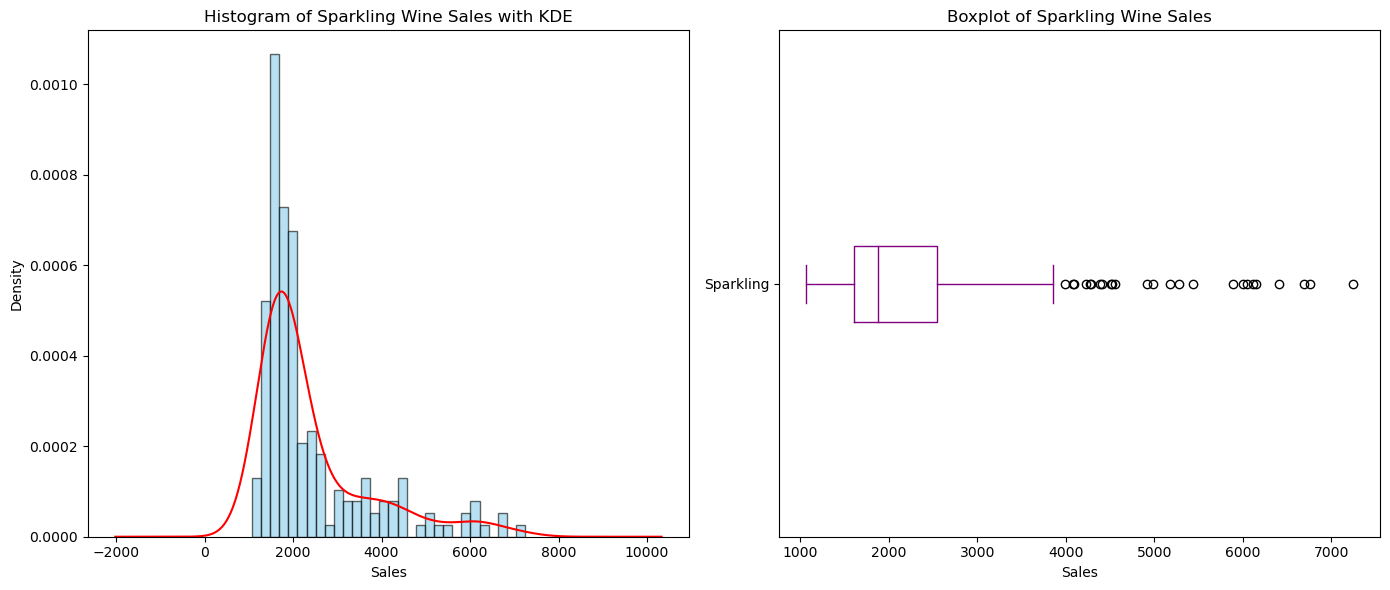

In [28]:
# Plotting histogram and boxplot for sparkling wine sales data with KDE curve on the histogram

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram with KDE
sparkling['Sparkling'].plot(kind='hist', ax=ax[0], bins=30, color='skyblue', edgecolor='black', density=True, alpha=0.6)
sparkling['Sparkling'].plot(kind='kde', ax=ax[0], color='red')
ax[0].set_title('Histogram of Sparkling Wine Sales with KDE')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Density')

# Boxplot
sparkling['Sparkling'].plot(kind='box', ax=ax[1], vert=False, color='purple')
ax[1].set_title('Boxplot of Sparkling Wine Sales')
ax[1].set_xlabel('Sales')

plt.tight_layout()
plt.show()



In [29]:
sparkling_skew = sparkling['Sparkling'].skew()
print(sparkling_skew)


1.8176118488983815



A skewness value of 1.81 indicates a right-skewed (or positively skewed) distribution. This means that the tail on the right side of the distribution is longer or fatter than the left side, indicating that the majority of the data points are concentrated on the left of the distribution, with fewer large values stretching out to the right.

This relationship suggests that in the context of the sparkling wine sales data, there are relatively few months with exceptionally high sales that are pulling the average (mean) sales value higher than the median. This indicates that while most of the sales figures are concentrated on the lower end, there are outliers or periods of unusually high sales that affect the distribution's shape.

### Plot of Empirical Cumulative Distribution

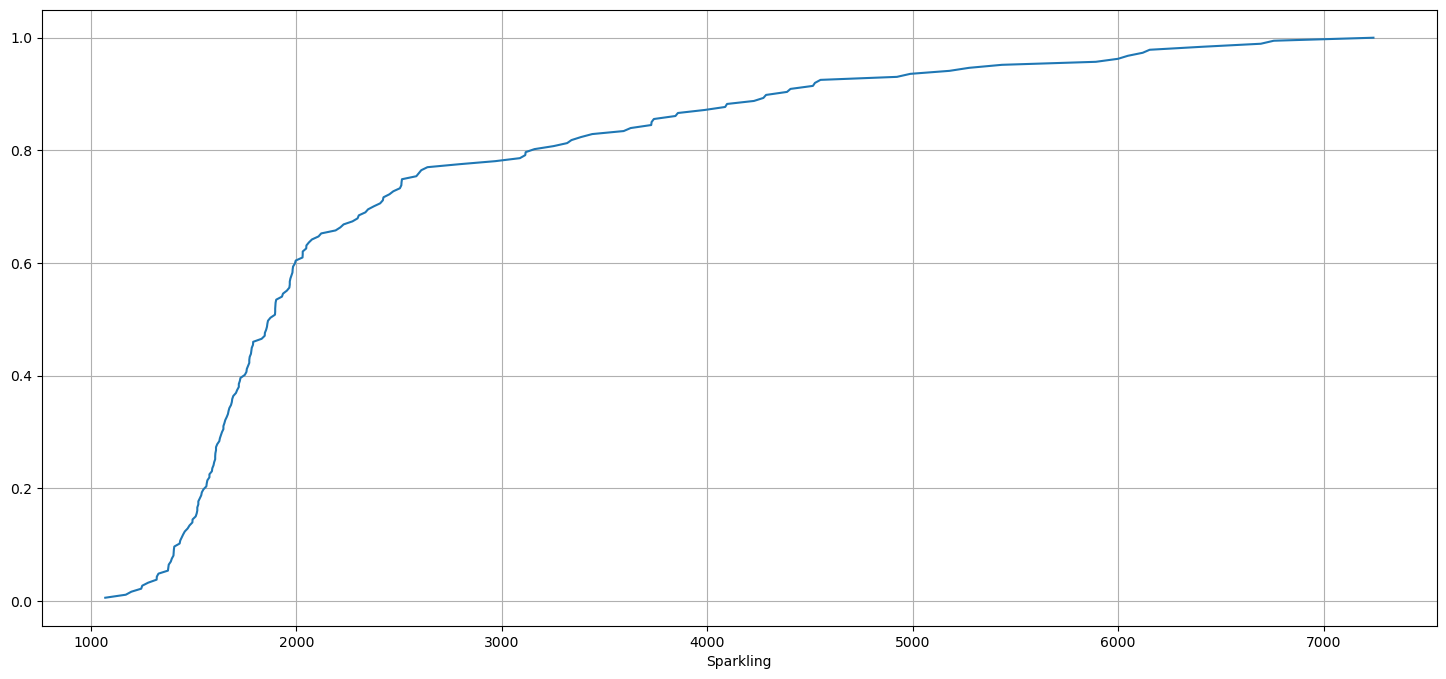

In [30]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(sparkling['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

This particular graph tells us what percentage of data points refer to what number of Sales.

## <u>Code to convert/split the data as per frequency.</u>

In [31]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(sparkling))

In [32]:
import calendar
sparkling['Month'] = dates.month
sparkling['Month'] = sparkling['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
sparkling['Year'] = dates.year

In [33]:
sparkling.rename(columns={'Sparkling':'Sparkling-Wine-Sales'}, inplace=True)
sparkling = sparkling[['Month', 'Year', 'Sparkling-Wine-Sales']]

In [34]:
sparkling.set_index(dates, inplace=True)

In [35]:
sparkling.head()

Month  Year  Sparkling-Wine-Sales
1980-01-01   Jan  1980                  1686
1980-02-01   Feb  1980                  1591
1980-03-01   Mar  1980                  2304
1980-04-01   Apr  1980                  1712
1980-05-01   May  1980                  1471

## <u>Basic Bivariate Analysis</u>

### Analyse monthly Sparkling Wine Sales across years.

Observe how number of units sold vary on a month on month basis. A stacked plot for every year will give us a clear pattern of any seasonality over the many years and those changes will be clearly reflected in the plots. 

In [36]:
sparkling_monthly_sales_data = pd.pivot_table(sparkling, values = 'Sparkling-Wine-Sales', columns = "Year", index = "Month")
sparkling_monthly_sales_data

Year     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Month                                                                           
Apr    1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
Aug    2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
Dec    5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   
Feb    1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
Jan    1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
Jul    1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
Jun    1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
Mar    2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
May    1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
Nov    4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
Oct    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
Sep    1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   

Year     1989    1990    1991    1992    1993    1994    1995  
Month                                                          
Apr    1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
Aug    1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
Dec    6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN  
Feb    1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
Jan    1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
Jul    1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
Jun    1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
Mar    1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
May    1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
Nov    4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
Oct    3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
Sep    2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN

In [37]:
# Define the correct order for the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' index to a Categorical type with the defined order
sparkling_monthly_sales_data.index = pd.CategoricalIndex(sparkling_monthly_sales_data.index, categories=month_order, ordered=True)

# Sort the pivot table by the month index
sparkling_monthly_sales_data.sort_index(inplace=True)

sparkling_monthly_sales_data


Year     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Month                                                                           
Jan    1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
Feb    1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
Mar    2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
Apr    1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
May    1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
Jun    1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
Jul    1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
Aug    2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
Sep    1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   
Oct    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
Nov    4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
Dec    5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   

Year     1989    1990    1991    1992    1993    1994    1995  
Month                                                          
Jan    1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
Feb    1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
Mar    1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
Apr    1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
May    1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
Jun    1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
Jul    1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
Aug    1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
Sep    2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
Oct    3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
Nov    4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
Dec    6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

### Monthly Plot to understand the spread of sales within different months across years

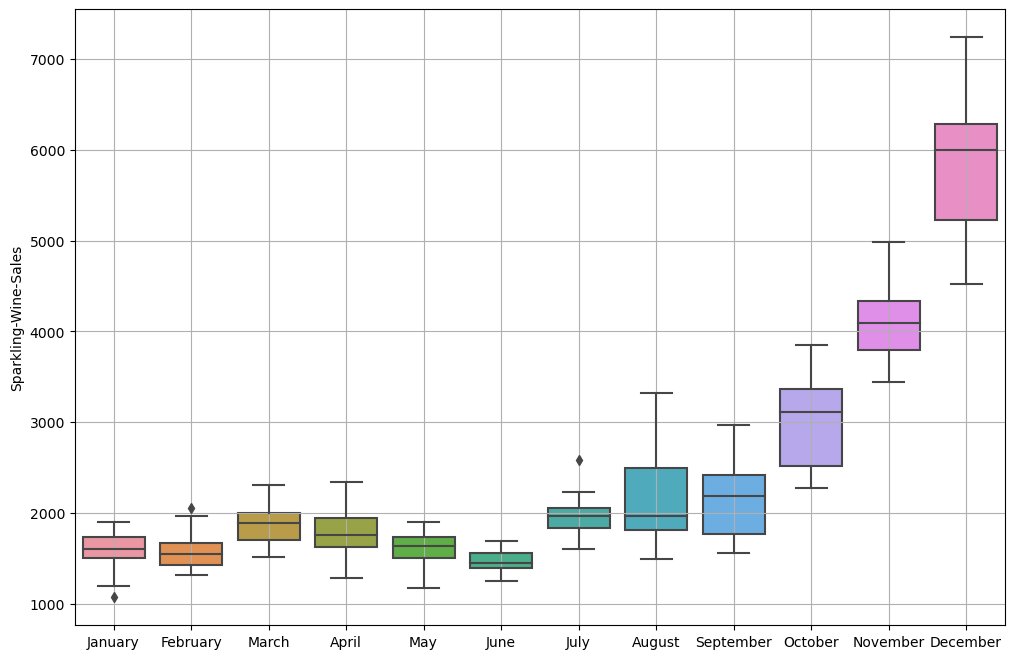

In [38]:
sns.boxplot(x = sparkling.index.month_name(),y = sparkling['Sparkling-Wine-Sales'])
plt.grid();

There is a clear distinction of 'Sparkling Wine Sales' within different months spread across various years. The highest such numbers are being recorded in the month of November-December across various years.

### Time series monthplot to understand the spread of sales within different months across years

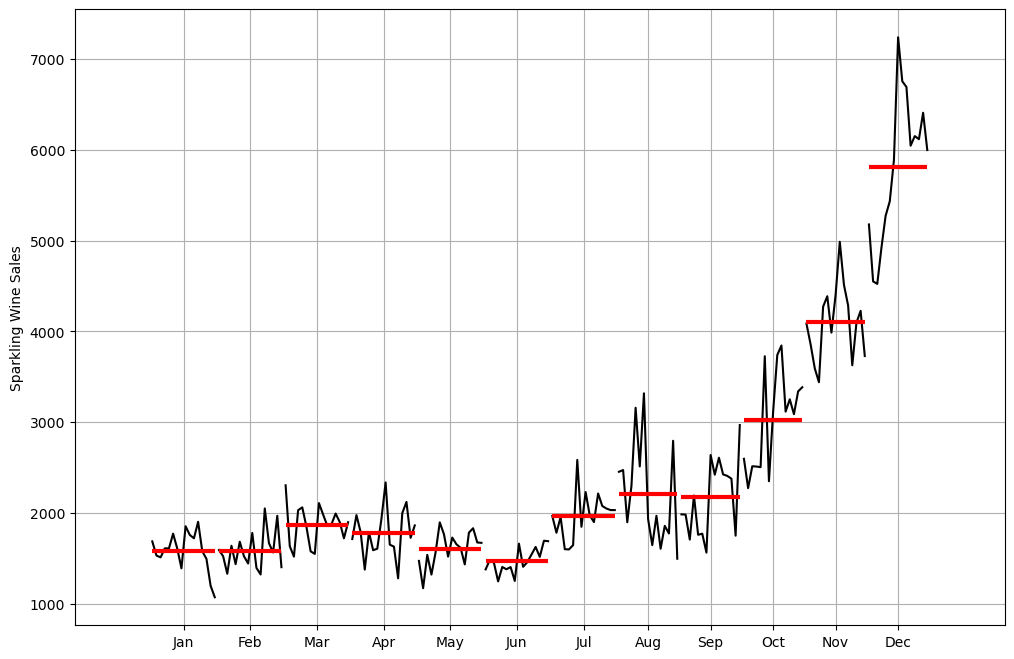

In [39]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(sparkling['Sparkling-Wine-Sales'],ylabel='Sparkling Wine Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sparkling Wine Sales' in this case) across various months. The red line is the median value.

### Plot of Average Sparkling Wine Sales per month and the month on month percentage change of Sparkling Wine Sales

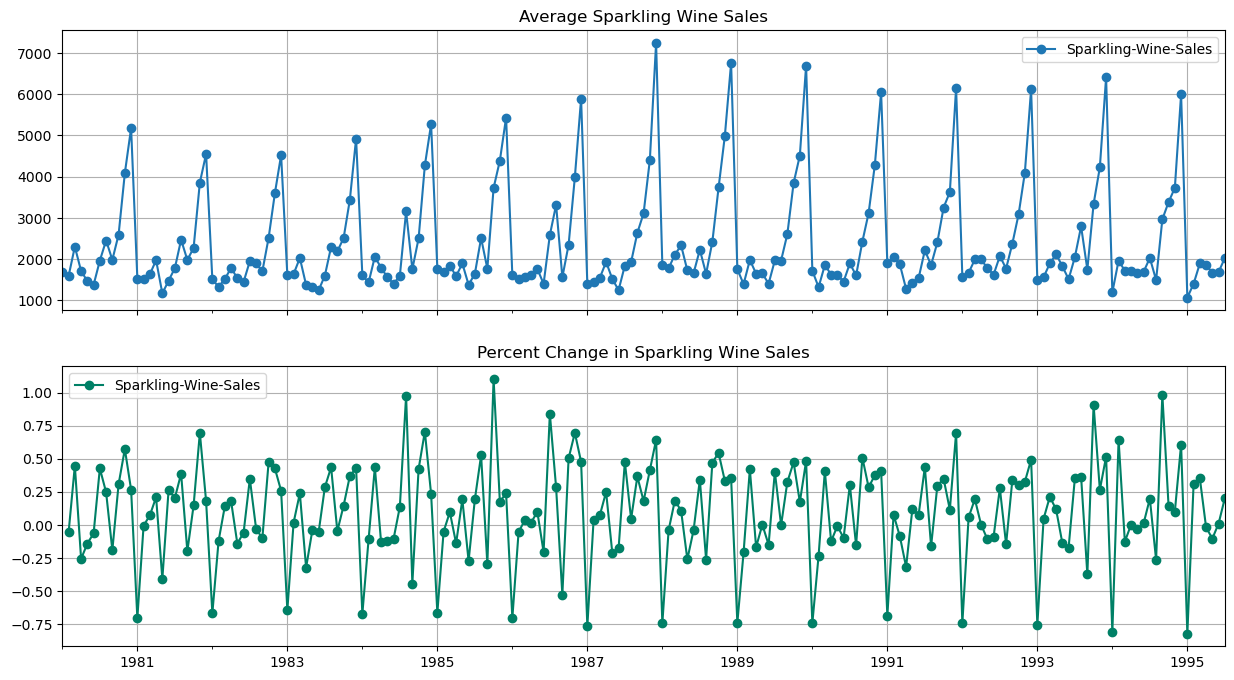

In [40]:
# group by date and get average RetailSales, and precent change
average    = sparkling.groupby(sparkling.index)["Sparkling-Wine-Sales"].mean()
pct_change = sparkling.groupby(sparkling.index)["Sparkling-Wine-Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling Wine Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Percent Change in Sparkling Wine Sales",grid=True)


The above two graphs tells us the Average 'Sparkling Wine Sales' and the Percentage change of 'Sparkling Wine Sales' with respect to the time.

In [41]:
# Calculating month-over-month percentage change in average sales
monthly_pct_change = sparkling['Sparkling-Wine-Sales'].pct_change()

# Extracting month and year from the index to group by month across all years
monthly_pct_change_df = monthly_pct_change.to_frame().assign(Month=lambda x: x.index.month)

# Calculating the average percentage change by month
average_monthly_pct_change = monthly_pct_change_df.groupby('Month')['Sparkling-Wine-Sales'].mean() * 100  # Convert to percentage

# Finding the months with the lowest and highest average percentage change
lowest_change_month = average_monthly_pct_change.idxmin()
highest_change_month = average_monthly_pct_change.idxmax()

lowest_change_value = average_monthly_pct_change.min()
highest_change_value = average_monthly_pct_change.max()

(lowest_change_month, lowest_change_value), (highest_change_month, highest_change_value), average_monthly_pct_change


((1, -72.46816773293791),
 (12, 41.9704169549078),
 Month
 1    -72.468168
 2      2.015016
 3     19.433593
 4     -3.693583
 5     -8.121809
 6     -7.009752
 7     33.950873
 8     15.012450
 9      7.453449
 10    41.944196
 11    38.390575
 12    41.970417
 Name: Sparkling-Wine-Sales, dtype: float64)

### Analyse yearly Sparkling Wine Sales across months.

In [42]:
yearly_sales_data = pd.pivot_table(sparkling, values = 'Sparkling-Wine-Sales', columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep  \
Year                                                                            
1980   1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0  1984.0   
1981   1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0  1981.0   
1982   1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0  1706.0   
1983   1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0  2191.0   
1984   1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0  1759.0   
1985   1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0  1771.0   
1986   1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0  1562.0   
1987   1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0  2638.0   
1988   1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0  2421.0   
1989   1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0  2608.0   
1990   1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0  2424.0   
1991   1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0  2408.0   
1992   1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0  2377.0   
1993   1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0  1749.0   
1994   1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0  2968.0   
1995   1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN     NaN   

Month     Oct     Nov     Dec  
Year                           
1980   2596.0  4087.0  5179.0  
1981   2273.0  3857.0  4551.0  
1982   2514.0  3593.0  4524.0  
1983   2511.0  3440.0  4923.0  
1984   2504.0  4273.0  5274.0  
1985   3727.0  4388.0  5434.0  
1986   2349.0  3987.0  5891.0  
1987   3114.0  4405.0  7242.0  
1988   3740.0  4988.0  6757.0  
1989   3845.0  4514.0  6694.0  
1990   3116.0  4286.0  6047.0  
1991   3252.0  3627.0  6153.0  
1992   3088.0  4096.0  6119.0  
1993   3339.0  4227.0  6410.0  
1994   3385.0  3729.0  5999.0  
1995      NaN     NaN     NaN

<Axes: xlabel='Year'>

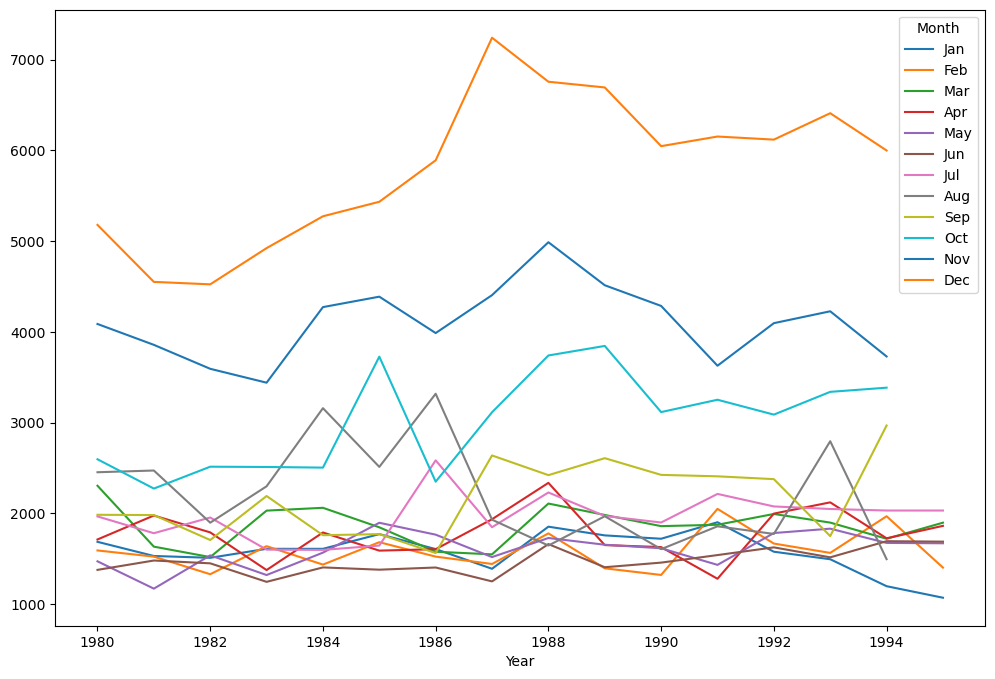

In [43]:
yearly_sales_data.plot()

### Yearly Boxplot to understand the spread of Sparkling Wine Sales across different years

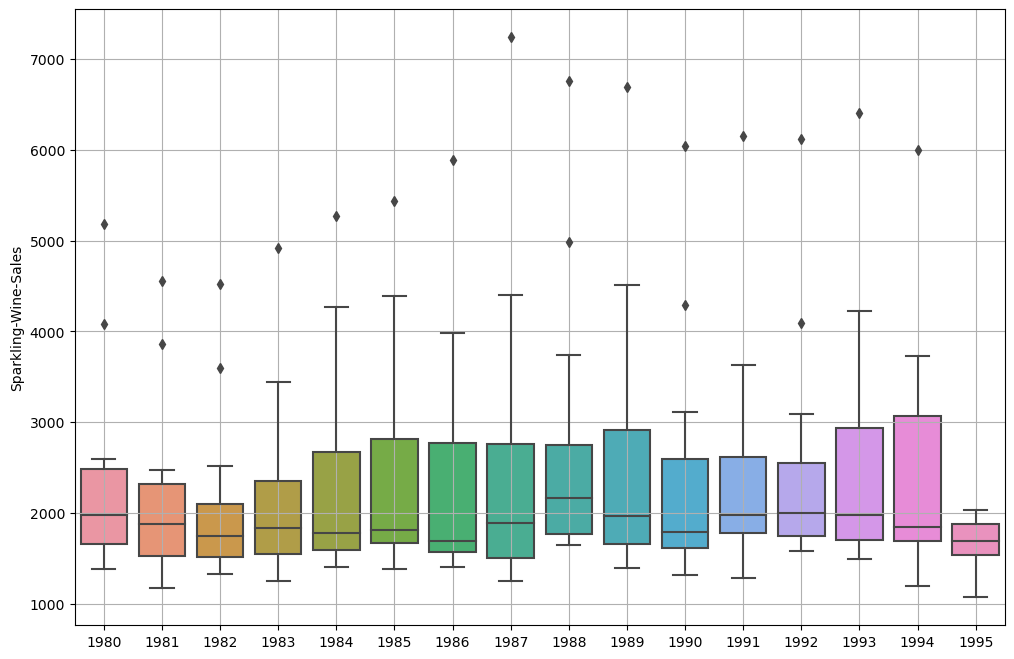

In [44]:
sns.boxplot(x = sparkling.index.year,y = sparkling['Sparkling-Wine-Sales'])
plt.grid();

The yearly boxplots also shows that the Sales have been relatively almost constant across the years.

## Decompose the Time Series and plot the different components.

*Performing the decomposition of data if there is an existence of seasonality and split the data accordingly.*

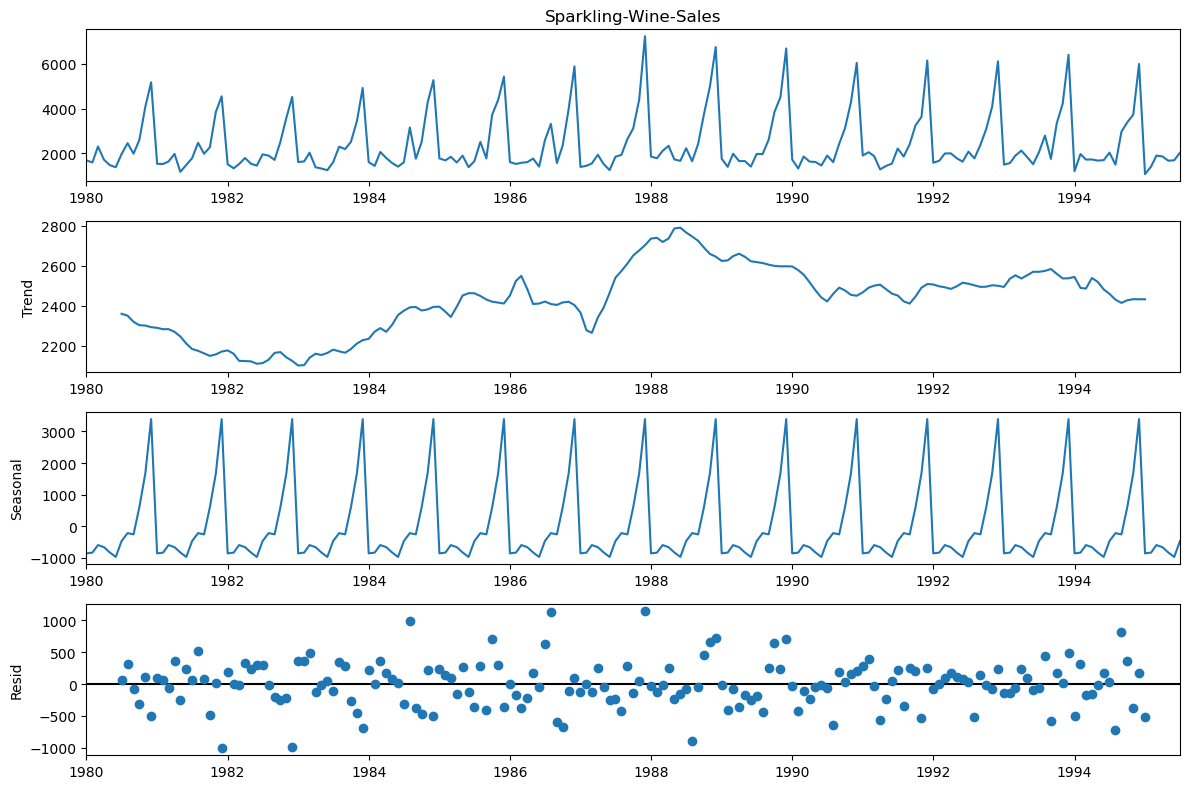

In [45]:
#Decompose the time series additively
sparkling_add_decompose = seasonal_decompose(sparkling['Sparkling-Wine-Sales'], model = 'additive', period = 12)
sparkling_add_decompose.plot()
plt.show()

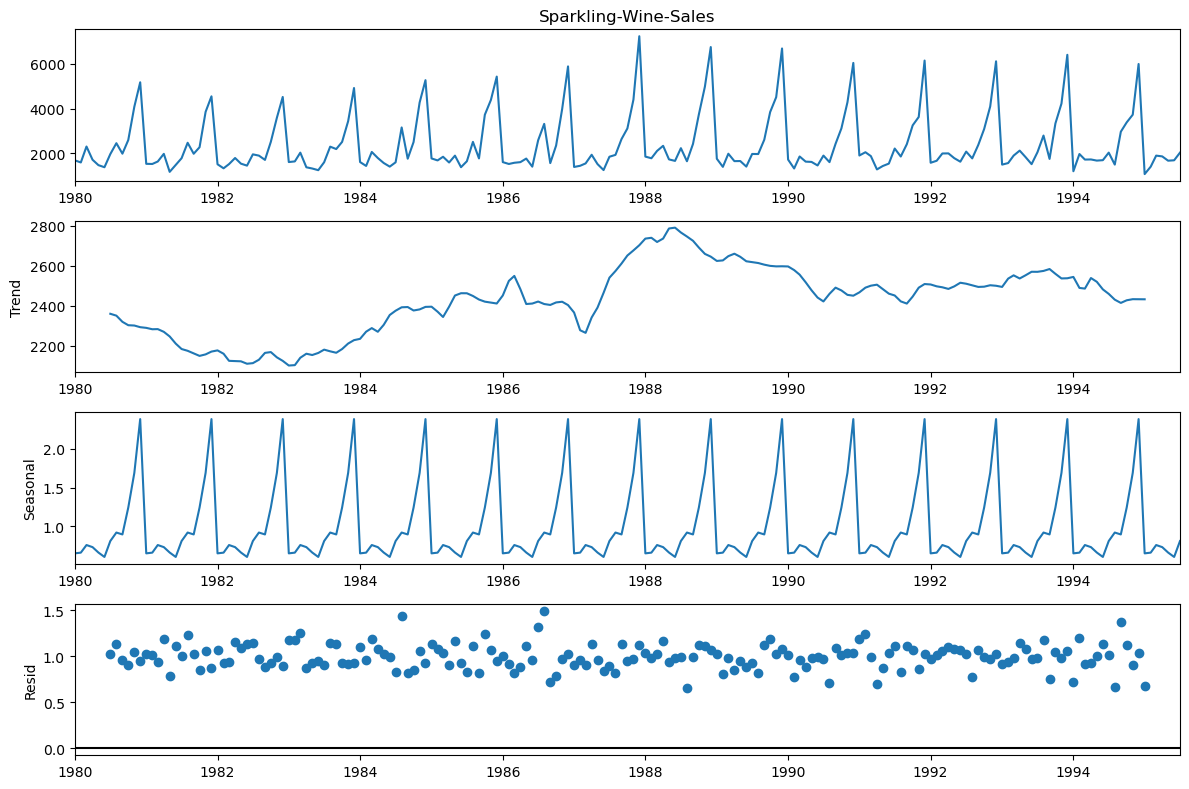

In [46]:
##Decompose the time series multiplicatively
sparkling_mul_decompose = seasonal_decompose(sparkling['Sparkling-Wine-Sales'], model = "multiplicative")
sparkling_mul_decompose.plot()
plt.show()

In [47]:
trend = sparkling_mul_decompose.trend
seasonality = sparkling_mul_decompose.seasonal
residual = sparkling_mul_decompose.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2360.67
1980-08-01    2351.33
1980-09-01    2320.54
1980-10-01    2303.58
1980-11-01    2302.04
1980-12-01    2293.79
Freq: MS, Name: trend, dtype: float64 

Seasonality 
 1980-01-01    0.65
1980-02-01    0.66
1980-03-01    0.76
1980-04-01    0.73
1980-05-01    0.66
1980-06-01    0.60
1980-07-01    0.81
1980-08-01    0.92
1980-09-01    0.89
1980-10-01    1.24
1980-11-01    1.69
1980-12-01    2.38
Freq: MS, Name: seasonal, dtype: float64 

Residual 
 1980-01-01     NaN
1980-02-01     NaN
1980-03-01     NaN
1980-04-01     NaN
1980-05-01     NaN
1980-06-01     NaN
1980-07-01    1.03
1980-08-01    1.14
1980-09-01    0.96
1980-10-01    0.91
1980-11-01    1.05
1980-12-01    0.95
Freq: MS, Name: resid, dtype: float64 



## Building Prediction and Forecast Models

### Split into Train and Test Data

In [48]:
train    =   sparkling[0:int(len(sparkling)*0.8)] 
test     =   sparkling[int(len(sparkling)*0.8):]

In [49]:
# Printing the Sparkling Wine Data
print('Training Data')
display(train.head())
print('Test Data')
display(test.head())

Training Data


Month  Year  Sparkling-Wine-Sales
1980-01-01   Jan  1980                  1686
1980-02-01   Feb  1980                  1591
1980-03-01   Mar  1980                  2304
1980-04-01   Apr  1980                  1712
1980-05-01   May  1980                  1471

Test Data


Month  Year  Sparkling-Wine-Sales
1992-06-01   Jun  1992                  1625
1992-07-01   Jul  1992                  2076
1992-08-01   Aug  1992                  1773
1992-09-01   Sep  1992                  2377
1992-10-01   Oct  1992                  3088

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling Wine Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [50]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [51]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [52]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
            Month  Year  Sparkling-Wine-Sales  time
1980-01-01   Jan  1980                  1686     1
1980-02-01   Feb  1980                  1591     2
1980-03-01   Mar  1980                  2304     3
1980-04-01   Apr  1980                  1712     4
1980-05-01   May  1980                  1471     5 

Last few rows of Training Data 
            Month  Year  Sparkling-Wine-Sales  time
1992-01-01   Jan  1992                  1577   145
1992-02-01   Feb  1992                  1667   146
1992-03-01   Mar  1992                  1993   147
1992-04-01   Apr  1992                  1997   148
1992-05-01   May  1992                  1783   149 

First few rows of Test Data 
            Month  Year  Sparkling-Wine-Sales  time
1992-06-01   Jun  1992                  1625    43
1992-07-01   Jul  1992                  2076    44
1992-08-01   Aug  1992                  1773    45
1992-09-01   Sep  1992                  2377    46
1992-10-01   Oct  1992          

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling-Wine-Sales'].values)

LinearRegression()

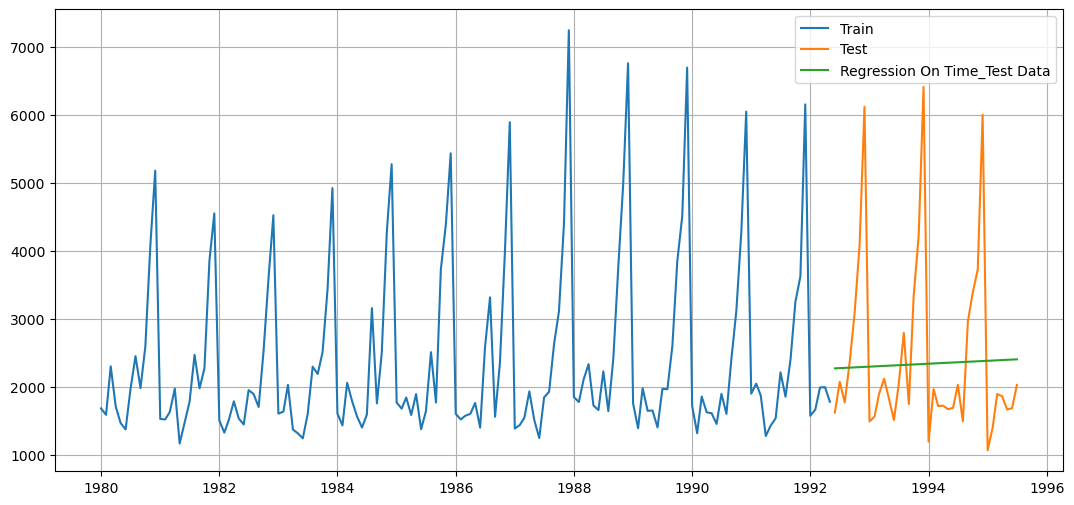

In [56]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling-Wine-Sales'], label='Train')
plt.plot(test['Sparkling-Wine-Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [57]:
LinearRegression_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 1980-01-01 to 1992-05-01
Freq: MS
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 149 non-null    object
 1   Year                  149 non-null    int64 
 2   Sparkling-Wine-Sales  149 non-null    int64 
 3   time                  149 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ KB


In [58]:
import statsmodels.api as sm

# Assuming you have a DataFrame 'df' with a column 'time' for the independent variable
# and 'Sparkling-Wine-Sales' for the dependent variable

# Add a constant to the independent variable data for the intercept
X = sm.add_constant(LinearRegression_train['time'])  

# Fit the OLS model
model = sm.OLS(LinearRegression_train['Sparkling-Wine-Sales'], X).fit()

# Print out the summary
model_summary = model.summary()
print(model_summary)


                             OLS Regression Results                             
Dep. Variable:     Sparkling-Wine-Sales   R-squared:                       0.014
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     2.162
Date:                  Sun, 17 Mar 2024   Prob (F-statistic):              0.144
Time:                          23:36:25   Log-Likelihood:                -1276.5
No. Observations:                   149   AIC:                             2557.
Df Residuals:                       147   BIC:                             2563.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2119.6155    210.916

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 1.4% of the variance in the training set.

#### Defining the accuracy metrics.

In [59]:
from sklearn import metrics

### Model Evaluation: Linear Regression

In [60]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling-Wine-Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1338.22


In [61]:
resultsDf_LR = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf_LR])
resultsDf

Test RMSE
RegressionOnTime  1338.22299

## Model 2: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [62]:
MovingAverage = sparkling.copy()
MovingAverage.head()

Month  Year  Sparkling-Wine-Sales
1980-01-01   Jan  1980                  1686
1980-02-01   Feb  1980                  1591
1980-03-01   Mar  1980                  2304
1980-04-01   Apr  1980                  1712
1980-05-01   May  1980                  1471

#### Trailing moving averages

In [63]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling-Wine-Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling-Wine-Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling-Wine-Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling-Wine-Sales'].rolling(9).mean()

MovingAverage.head()

Month  Year  Sparkling-Wine-Sales  Trailing_2  Trailing_4  \
1980-01-01   Jan  1980                  1686         NaN         NaN   
1980-02-01   Feb  1980                  1591      1638.5         NaN   
1980-03-01   Mar  1980                  2304      1947.5         NaN   
1980-04-01   Apr  1980                  1712      2008.0     1823.25   
1980-05-01   May  1980                  1471      1591.5     1769.50   

            Trailing_6  Trailing_9  
1980-01-01         NaN         NaN  
1980-02-01         NaN         NaN  
1980-03-01         NaN         NaN  
1980-04-01         NaN         NaN  
1980-05-01         NaN         NaN

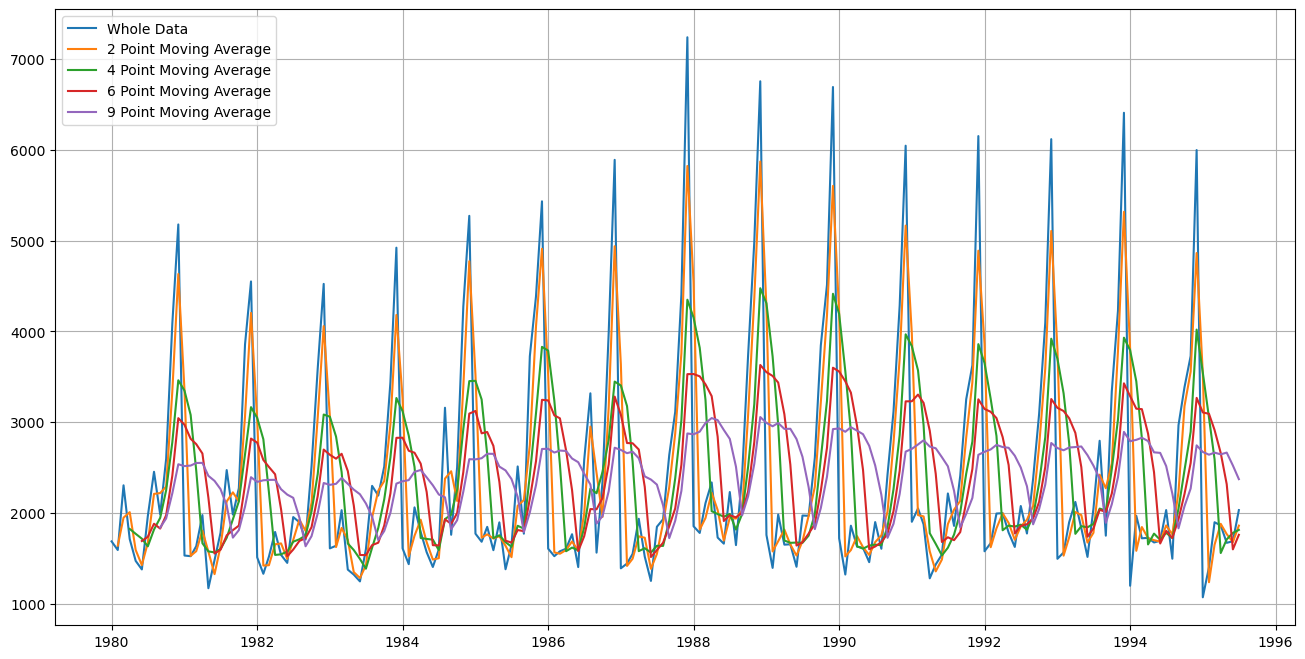

In [64]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling-Wine-Sales'], label='Whole Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [65]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.8)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.8):]

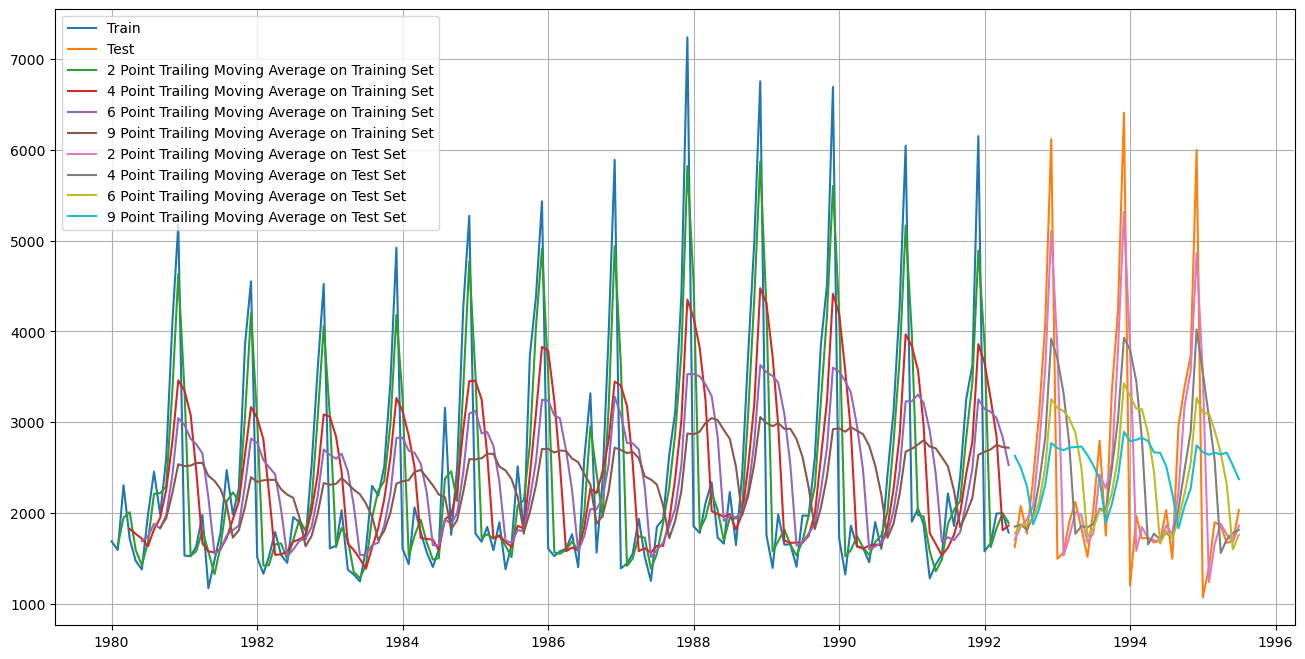

In [66]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling-Wine-Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling-Wine-Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation: Moving Average Model

##### Done only on the test data.

##### MAPE can be calculated as below 

In [67]:
# Test Data - MAPE --> 2 point Trailing MA
mape_model1_test = np.mean(np.abs((test['Sparkling-Wine-Sales'] - test_predictions_model1)/test['Sparkling-Wine-Sales']))*100
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.2f" %(mape_model1_test))

For RegressionOnTime forecast on the Test Data,  MAPE is 38.65


#### RMSE Calculation as below 

In [68]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling-Wine-Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling-Wine-Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling-Wine-Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling-Wine-Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 805.880
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1161.283
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1290.625
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1375.582 


In [69]:
resultsDf_MA = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA])
resultsDf

Test RMSE
RegressionOnTime             1338.222990
2pointTrailingMovingAverage   805.879970
4pointTrailingMovingAverage  1161.282792
6pointTrailingMovingAverage  1290.624831
9pointTrailingMovingAverage  1375.582351

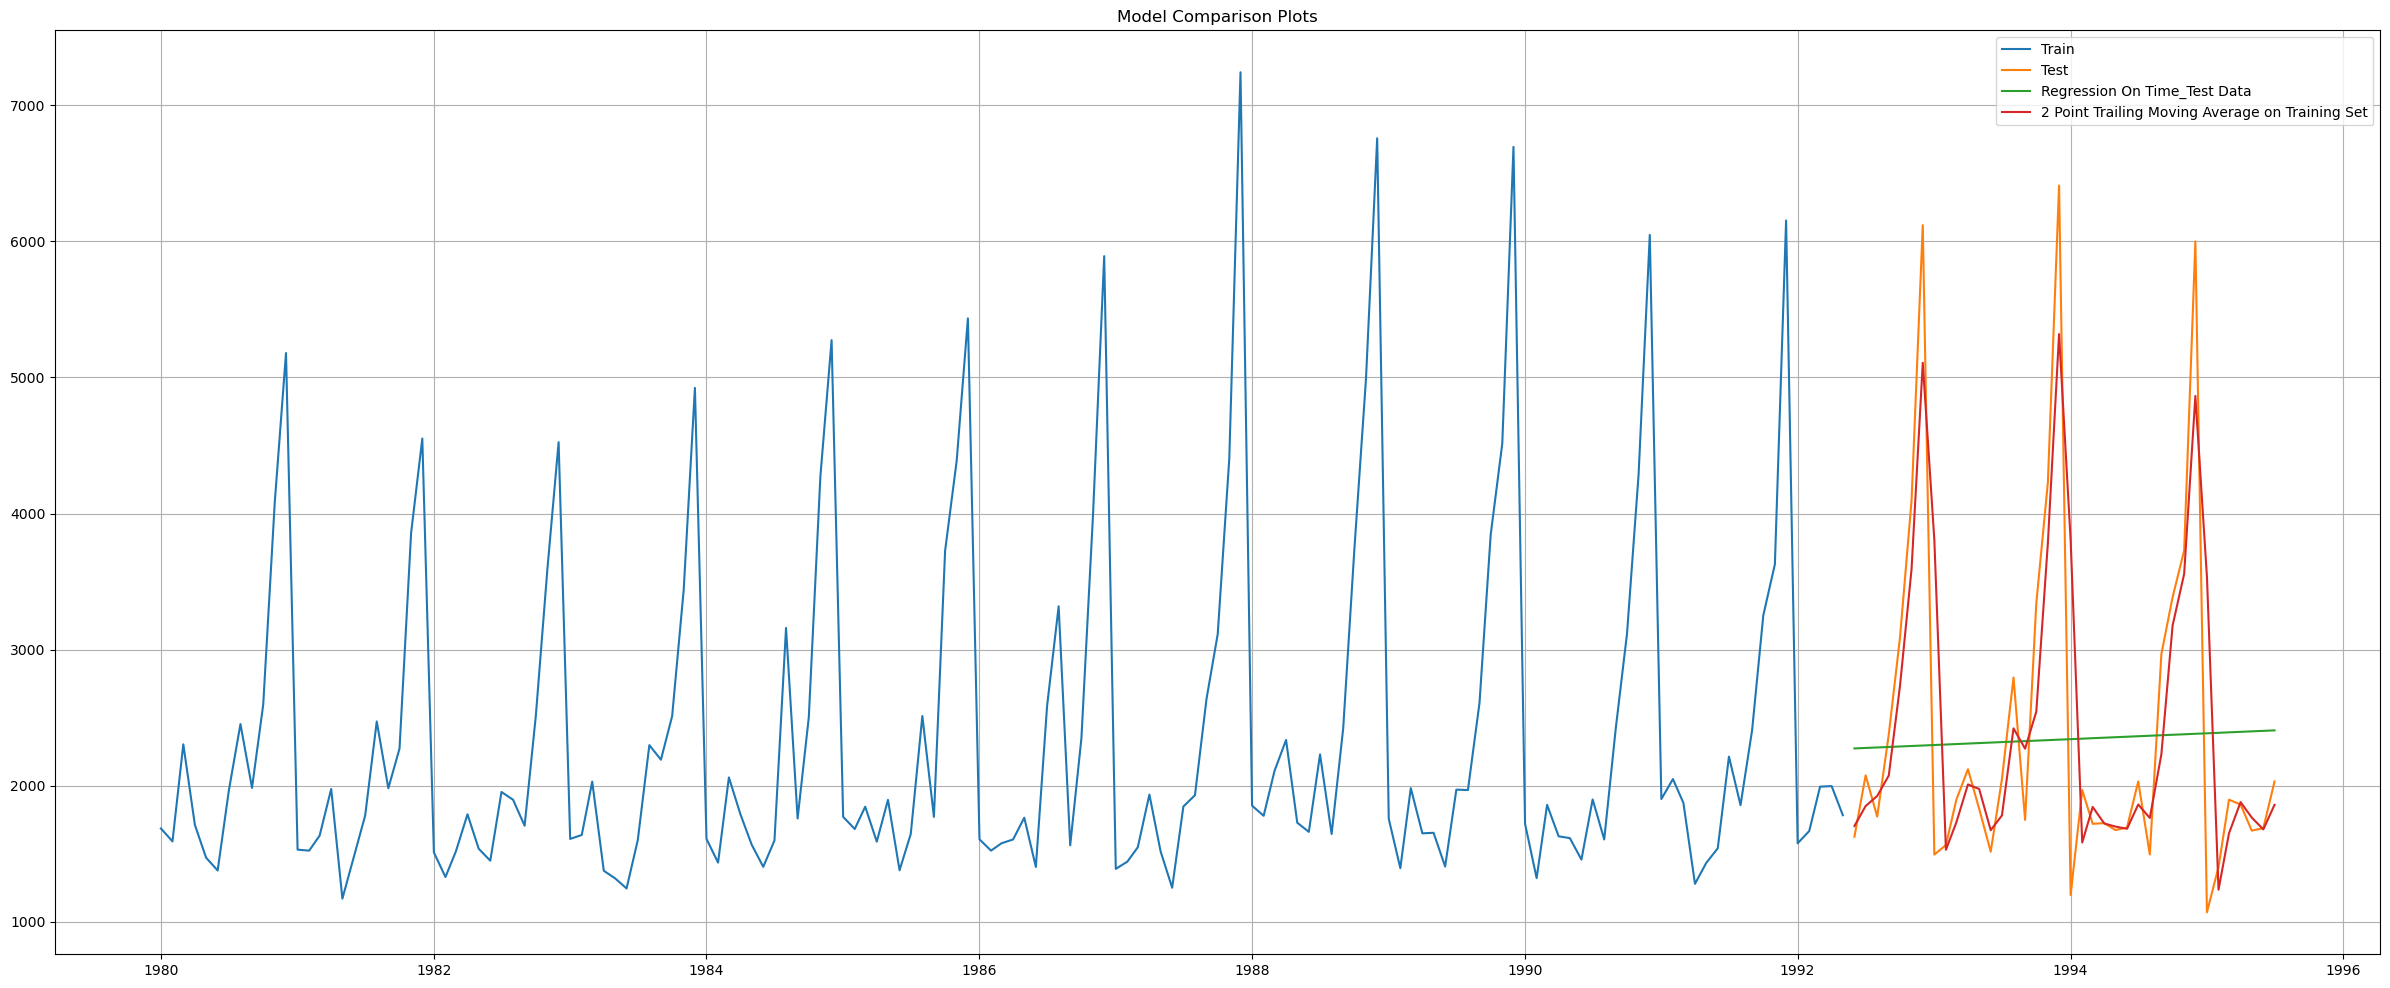

In [70]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling-Wine-Sales'], label='Train')
plt.plot(test['Sparkling-Wine-Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 3: Simple Exponential Smoothing Method

### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [71]:
from sklearn import metrics

In [72]:
SES_train = train.copy()
SES_test = test.copy()

In [73]:
# create class
model_SES = SimpleExpSmoothing(SES_train['Sparkling-Wine-Sales'],initialization_method='estimated')

In [74]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [75]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.06651031891750384,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2113.744496770534,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
# Using the fitted model on the training set to forecast on the test set
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test['predict']

1992-06-01    2472.856031
1992-07-01    2472.856031
1992-08-01    2472.856031
1992-09-01    2472.856031
1992-10-01    2472.856031
1992-11-01    2472.856031
1992-12-01    2472.856031
1993-01-01    2472.856031
1993-02-01    2472.856031
1993-03-01    2472.856031
1993-04-01    2472.856031
1993-05-01    2472.856031
1993-06-01    2472.856031
1993-07-01    2472.856031
1993-08-01    2472.856031
1993-09-01    2472.856031
1993-10-01    2472.856031
1993-11-01    2472.856031
1993-12-01    2472.856031
1994-01-01    2472.856031
1994-02-01    2472.856031
1994-03-01    2472.856031
1994-04-01    2472.856031
1994-05-01    2472.856031
1994-06-01    2472.856031
1994-07-01    2472.856031
1994-08-01    2472.856031
1994-09-01    2472.856031
1994-10-01    2472.856031
1994-11-01    2472.856031
1994-12-01    2472.856031
1995-01-01    2472.856031
1995-02-01    2472.856031
1995-03-01    2472.856031
1995-04-01    2472.856031
1995-05-01    2472.856031
1995-06-01    2472.856031
1995-07-01    2472.856031
Freq: MS, Na

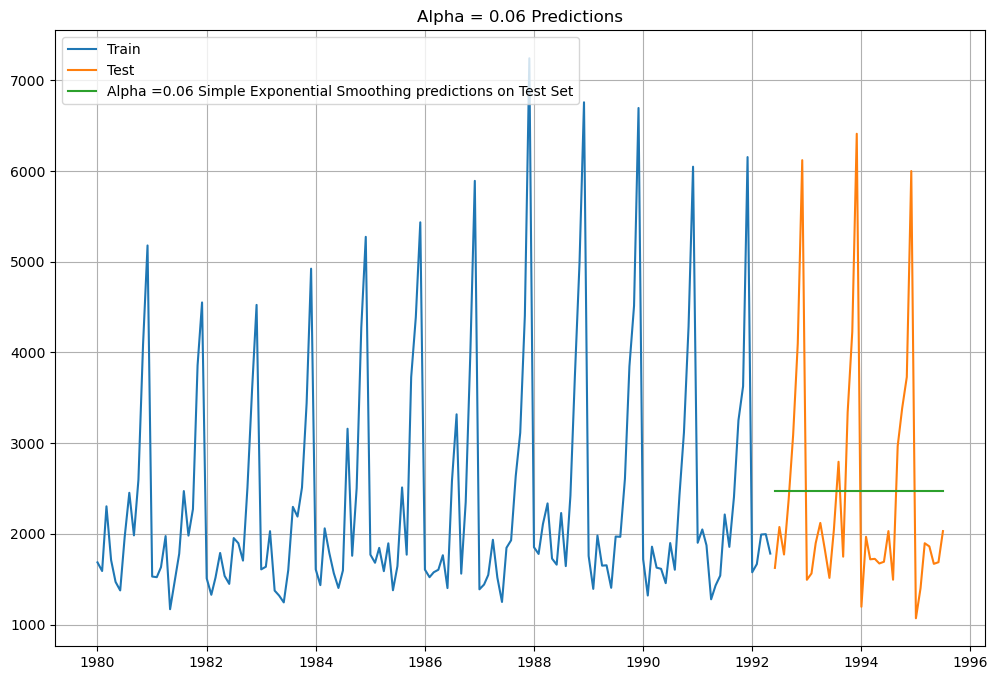

In [77]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(SES_train['Sparkling-Wine-Sales'], label='Train')
plt.plot(SES_test['Sparkling-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.06 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.06 Predictions');

## SES Model Evaluation

### Model Evaluation for $\alpha$ = 0.06 : Simple Exponential Smoothing

In [78]:
print('SES RMSE:',mean_squared_error(SES_test['Sparkling-Wine-Sales'].values,SES_test['predict'].values,squared=False))

SES RMSE: 1329.4024560575483


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [79]:
## First we will define an empty dataframe to store our values from the loop

SES_resultsDf = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
SES_resultsDf

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [80]:
# Preparing to update the SES_train and SES_test DataFrames to include predictions for each alpha value
# It appears there's a slight misunderstanding in how predictions are stored; let's correct that approach.
for i in np.arange(0, 1, 0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    # Generating predictions for the training set
    SES_train['predict_{}'.format(i)] = model_SES_alpha_i.fittedvalues
    # Generating forecasts for the test set
    SES_test['predict_{}'.format(i)] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    # Calculating RMSE for both train and test sets
    rmse_SES_model_train_i = mean_squared_error(SES_train['Sparkling-Wine-Sales'], SES_train['predict_{}'.format(i)], squared=False)
    rmse_SES_model_test_i = mean_squared_error(SES_test['Sparkling-Wine-Sales'], SES_test['predict_{}'.format(i)], squared=False)
    
    # Appending the results to the DataFrame
    SES_resultsDf = SES_resultsDf.append({'Alpha Values': i, 'Train RMSE': rmse_SES_model_train_i, 'Test RMSE': rmse_SES_model_test_i}, ignore_index=True)




In [81]:
SES_test.head()

Month  Year  Sparkling-Wine-Sales      predict  predict_0.0  \
1992-06-01   Jun  1992                  1625  2472.856031       1502.2   
1992-07-01   Jul  1992                  2076  2472.856031       1502.2   
1992-08-01   Aug  1992                  1773  2472.856031       1502.2   
1992-09-01   Sep  1992                  2377  2472.856031       1502.2   
1992-10-01   Oct  1992                  3088  2472.856031       1502.2   

            predict_0.05  predict_0.1  predict_0.15000000000000002  \
1992-06-01   2489.441285  2436.566015                  2380.935797   
1992-07-01   2489.441285  2436.566015                  2380.935797   
1992-08-01   2489.441285  2436.566015                  2380.935797   
1992-09-01   2489.441285  2436.566015                  2380.935797   
1992-10-01   2489.441285  2436.566015                  2380.935797   

            predict_0.2  predict_0.25  ...  predict_0.5  predict_0.55  \
1992-06-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   
1992-07-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   
1992-08-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   
1992-09-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   
1992-10-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   

            predict_0.6000000000000001  predict_0.65  \
1992-06-01                 1880.000375   1861.001099   
1992-07-01                 1880.000375   1861.001099   
1992-08-01                 1880.000375   1861.001099   
1992-09-01                 1880.000375   1861.001099   
1992-10-01                 1880.000375   1861.001099   

            predict_0.7000000000000001  predict_0.75  predict_0.8  \
1992-06-01                  1846.43986   1834.619043  1824.183436   
1992-07-01                  1846.43986   1834.619043  1824.183436   
1992-08-01                  1846.43986   1834.619043  1824.183436   
1992-09-01                  1846.43986   1834.619043  1824.183436   
1992-10-01                  1846.43986   1834.619043  1824.183436   

            predict_0.8500000000000001  predict_0.9  \
1992-06-01                 1814.182028  1804.068188   
1992-07-01                 1814.182028  1804.068188   
1992-08-01                 1814.182028  1804.068188   
1992-09-01                 1814.182028  1804.068188   
1992-10-01                 1814.182028  1804.068188   

            predict_0.9500000000000001  
1992-06-01                 1793.650078  
1992-07-01                 1793.650078  
1992-08-01                 1793.650078  
1992-09-01                 1793.650078  
1992-10-01                 1793.650078  

[5 rows x 24 columns]

### Model Evaluation for  $\alpha$ with lowest RMSE : Simple Exponential Smoothing

In [82]:
# Display the results
print(SES_resultsDf.sort_values(by='Test RMSE').head())  # Display top 5 combinations with lowest Test RMSE

   Alpha Values   Train RMSE    Test RMSE
2          0.10  1326.216140  1329.452727
1          0.05  1311.635767  1329.709274
3          0.15  1340.966482  1331.451462
4          0.20  1351.517435  1336.657179
5          0.25  1357.671154  1346.108647


In [83]:
SES_test.head()

Month  Year  Sparkling-Wine-Sales      predict  predict_0.0  \
1992-06-01   Jun  1992                  1625  2472.856031       1502.2   
1992-07-01   Jul  1992                  2076  2472.856031       1502.2   
1992-08-01   Aug  1992                  1773  2472.856031       1502.2   
1992-09-01   Sep  1992                  2377  2472.856031       1502.2   
1992-10-01   Oct  1992                  3088  2472.856031       1502.2   

            predict_0.05  predict_0.1  predict_0.15000000000000002  \
1992-06-01   2489.441285  2436.566015                  2380.935797   
1992-07-01   2489.441285  2436.566015                  2380.935797   
1992-08-01   2489.441285  2436.566015                  2380.935797   
1992-09-01   2489.441285  2436.566015                  2380.935797   
1992-10-01   2489.441285  2436.566015                  2380.935797   

            predict_0.2  predict_0.25  ...  predict_0.5  predict_0.55  \
1992-06-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   
1992-07-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   
1992-08-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   
1992-09-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   
1992-10-01   2316.52647   2244.506884  ...  1938.889075   1905.338985   

            predict_0.6000000000000001  predict_0.65  \
1992-06-01                 1880.000375   1861.001099   
1992-07-01                 1880.000375   1861.001099   
1992-08-01                 1880.000375   1861.001099   
1992-09-01                 1880.000375   1861.001099   
1992-10-01                 1880.000375   1861.001099   

            predict_0.7000000000000001  predict_0.75  predict_0.8  \
1992-06-01                  1846.43986   1834.619043  1824.183436   
1992-07-01                  1846.43986   1834.619043  1824.183436   
1992-08-01                  1846.43986   1834.619043  1824.183436   
1992-09-01                  1846.43986   1834.619043  1824.183436   
1992-10-01                  1846.43986   1834.619043  1824.183436   

            predict_0.8500000000000001  predict_0.9  \
1992-06-01                 1814.182028  1804.068188   
1992-07-01                 1814.182028  1804.068188   
1992-08-01                 1814.182028  1804.068188   
1992-09-01                 1814.182028  1804.068188   
1992-10-01                 1814.182028  1804.068188   

            predict_0.9500000000000001  
1992-06-01                 1793.650078  
1992-07-01                 1793.650078  
1992-08-01                 1793.650078  
1992-09-01                 1793.650078  
1992-10-01                 1793.650078  

[5 rows x 24 columns]

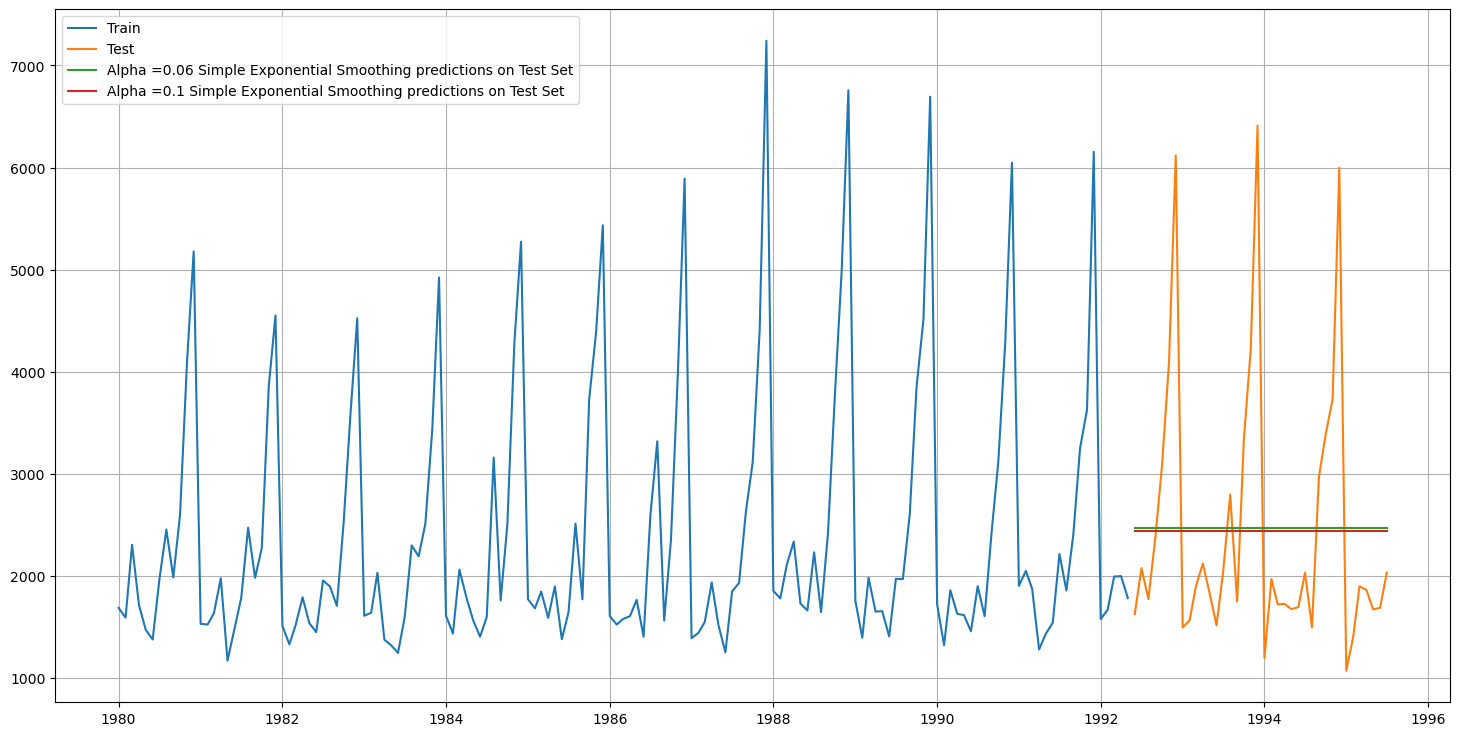

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling-Wine-Sales'], label='Train')
plt.plot(SES_test['Sparkling-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.06 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict_0.1'], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [85]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Sparkling-Wine-Sales'].values,SES_test['predict'].values,squared=False)]}
                           ,index=['Alpha=0.06:SES'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES])
resultsDf

Test RMSE
RegressionOnTime             1338.222990
2pointTrailingMovingAverage   805.879970
4pointTrailingMovingAverage  1161.282792
6pointTrailingMovingAverage  1290.624831
9pointTrailingMovingAverage  1375.582351
Alpha=0.06:SES               1329.402456

## Model 4: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [86]:
DES_train = train.copy()
DES_test = test.copy()

In [87]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train['Sparkling-Wine-Sales'],initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0761020405947672, 'smoothing_trend': 0.06918657565053189, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.421901500889, 'initial_trend': 2.27422485971249, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [88]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(DES_test))
DES_predict

1992-06-01    2410.519141
1992-07-01    2401.963869
1992-08-01    2393.408596
1992-09-01    2384.853324
1992-10-01    2376.298052
1992-11-01    2367.742779
1992-12-01    2359.187507
1993-01-01    2350.632235
1993-02-01    2342.076962
1993-03-01    2333.521690
1993-04-01    2324.966417
1993-05-01    2316.411145
1993-06-01    2307.855873
1993-07-01    2299.300600
1993-08-01    2290.745328
1993-09-01    2282.190055
1993-10-01    2273.634783
1993-11-01    2265.079511
1993-12-01    2256.524238
1994-01-01    2247.968966
1994-02-01    2239.413693
1994-03-01    2230.858421
1994-04-01    2222.303149
1994-05-01    2213.747876
1994-06-01    2205.192604
1994-07-01    2196.637332
1994-08-01    2188.082059
1994-09-01    2179.526787
1994-10-01    2170.971514
1994-11-01    2162.416242
1994-12-01    2153.860970
1995-01-01    2145.305697
1995-02-01    2136.750425
1995-03-01    2128.195152
1995-04-01    2119.639880
1995-05-01    2111.084608
1995-06-01    2102.529335
1995-07-01    2093.974063
Freq: MS, dt

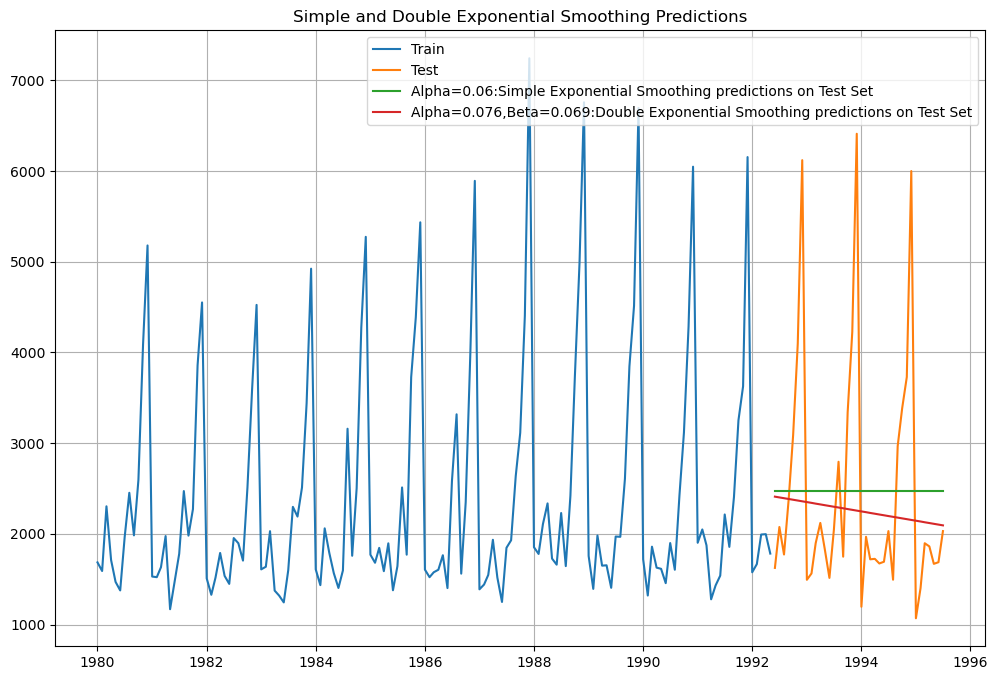

In [89]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train['Sparkling-Wine-Sales'], label='Train')
plt.plot(DES_test['Sparkling-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.06:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.076,Beta=0.069:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

## DES Model Evaluation

### Model Evaluation for $\alpha$ = 0.076 and $\beta$ = 0.069 : Double Exponential Smoothing

In [90]:
print('DES RMSE:',mean_squared_error(DES_test['Sparkling-Wine-Sales'].values,DES_predict.values,squared=False))

DES RMSE: 1340.4527914679866


#### Setting different alpha and beta values.

###### Remember, the higher the beta value more weightage is given to the trend. It determines how quickly the model's estimate of the trend responds to changes in the underlying trend of the data series.


#### We will run a loop with different alpha and beta values to understand which particular value works best for alpha and beta on the test set.

In [91]:
## First we will define an empty dataframe to store our values from the loop

DES_resultsDf = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
DES_resultsDf

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [92]:
# Loop over combinations of alpha and beta
for i in np.arange(0.01, 0.99, 0.1):
    for j in np.arange(0.01, 0.99, 0.1):
        # Fit the DES model with current alpha and beta
        model_DES_alpha_i_j = ExponentialSmoothing(DES_train['Sparkling-Wine-Sales'], 
                                                   trend="add", 
                                                   initialization_method='estimated').fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
        # Generate fitted values for training set
        DES_train_fitted = model_DES_alpha_i_j.fittedvalues
        # Forecast for the test set
        DES_test_forecast = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        # Calculate RMSE for training and test sets
        rmse_DES_train = mean_squared_error(DES_train['Sparkling-Wine-Sales'], DES_train_fitted, squared=False)
        rmse_DES_test = mean_squared_error(DES_test['Sparkling-Wine-Sales'], DES_test_forecast, squared=False)
        
        # Append results to DataFrame
        DES_resultsDf = DES_resultsDf.append({'Alpha': i, 'Beta': j, 'Train RMSE': rmse_DES_train, 'Test RMSE': rmse_DES_test}, ignore_index=True)

# Display the results
print(DES_resultsDf.sort_values(by='Test RMSE').head())  # Display top 5 combinations with lowest Test RMSE

    Alpha Values  Beta Values   Train RMSE    Test RMSE  Alpha  Beta
12           NaN          NaN  1401.383383  1326.662208   0.11  0.21
11           NaN          NaN  1368.838230  1339.668486   0.11  0.11
13           NaN          NaN  1438.190753  1353.040146   0.11  0.31
30           NaN          NaN  1372.768390  1355.647560   0.31  0.01
40           NaN          NaN  1368.567164  1357.269060   0.41  0.01


### Model Evaluation for  $\alpha$ and $\beta$ with lowest RMSE : Double Exponential Smoothing

In [93]:
DES_alpha_value = 0.11  # Example specific alpha value
DES_beta_value = 0.21  # Example specific beta value

# 1. Fit the DES model with specific alpha and beta values
model_DES_best = ExponentialSmoothing(DES_train['Sparkling-Wine-Sales'], trend="add", initialization_method='estimated').fit(smoothing_level=DES_alpha_value, smoothing_slope=DES_beta_value, optimized=False)

# 2. Generate forecasts for the test set duration
DES_predict_best = model_DES_best.forecast(len(DES_test))

# 3. Calculate RMSE using these specific forecasts
DES_RMSE_best = mean_squared_error(DES_test['Sparkling-Wine-Sales'].values, DES_predict_best.values, squared=False)
print('DES RMSE with best alpha and beta:', DES_RMSE_best.round(2))


DES RMSE with best alpha and beta: 1326.66


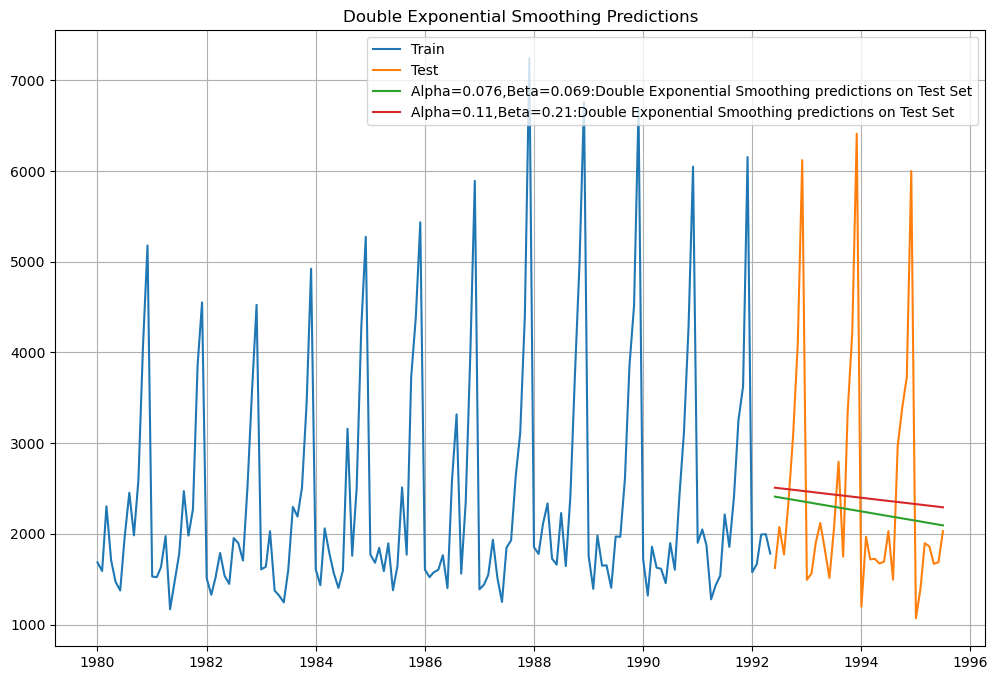

In [94]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train['Sparkling-Wine-Sales'], label='Train')
plt.plot(DES_test['Sparkling-Wine-Sales'], label='Test')

plt.plot(DES_predict, label='Alpha=0.076,Beta=0.069:Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_best, label='Alpha=0.11,Beta=0.21:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [95]:
resultsDf_DES = pd.DataFrame({'Test RMSE': [mean_squared_error(DES_test['Sparkling-Wine-Sales'].values, DES_predict_best.values, squared=False)]}
                           ,index=['Alpha=0.11,Beta=0.21:DES'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES])
resultsDf

Test RMSE
RegressionOnTime             1338.222990
2pointTrailingMovingAverage   805.879970
4pointTrailingMovingAverage  1161.282792
6pointTrailingMovingAverage  1290.624831
9pointTrailingMovingAverage  1375.582351
Alpha=0.06:SES               1329.402456
Alpha=0.11,Beta=0.21:DES     1326.662208

### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

## Model 5: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

Triple Exponential Smoothing, also known as Holt-Winters Exponential Smoothing, extends Double Exponential Smoothing to include a seasonal component. It's applicable when the data exhibits trend and seasonality.

Here's an overview of the model:

### Triple Exponential Smoothing Components:

1. **Level (ℓ)**: This represents the estimated average value of the series at time t. Similar to Double Exponential Smoothing, it is updated at each time step by considering the observed value and the previous estimate.

2. **Trend (b)**: This represents the estimated trend in the series at time t. It is updated by looking at the change in the level component compared to the previous time step.

3. **Seasonality (s)**: This is the new component introduced in Triple Exponential Smoothing. It captures the seasonal variations in the series. Seasonality can be additive or multiplicative, depending on whether the seasonal effect is roughly constant or changes proportionally with the level of the series.

### Triple Exponential Smoothing Equations:

1. **Level Equation**:
   \[ ℓ_t = α(y_t - s_{t-L}) + (1 - α)(ℓ_{t-1} + b_{t-1}) \]
   Where \( y_t \) is the actual value at time t, \( s_{t-L} \) is the seasonal component at time t for L periods ago (seasonal length), and α is the smoothing constant for the level.

2. **Trend Equation**:
   \[ b_t = β(ℓ_t - ℓ_{t-1}) + (1 - β)b_{t-1} \]
   Where β is the smoothing constant for the trend.

3. **Seasonality Equation** (Additive):
   \[ s_t = γ(y_t - ℓ_{t-1} - b_{t-1}) + (1 - γ)s_{t-L} \]
   Or (Multiplicative):
   \[ s_t = γ(\frac{y_t}{ℓ_{t-1} + b_{t-1}}) + (1 - γ)s_{t-L} \]
   Where γ is the smoothing constant for the seasonality and L is the length of the seasonal cycle.

### Forecasting with Triple Exponential Smoothing:

The forecast \( F \) for m periods ahead is given by:

- **Additive Seasonality**:
  \[ F_{t+m} = ℓ_t + mb_t + s_{t-L+1+(m-1)modL} \]

- **Multiplicative Seasonality**:
  \[ F_{t+m} = (ℓ_t + mb_t) \times s_{t-L+1+(m-1)modL} \]

### Smoothing Constants:

- **α (Level Smoothing)**: Controls the rate at which the influence of the observations at prior time steps decays exponentially.
- **β (Trend Smoothing)**: Controls the rate at which the information in the trend component decays exponentially.
- **γ (Seasonal Smoothing)**: Controls the rate at which the influence of the seasonal component decays.

Like with double exponential smoothing, 0 < α < 1, 0 < β < 1, and 0 < γ < 1. These parameters can either be set using domain knowledge or optimized using historical data to minimize a loss function, often the Mean Squared Error (MSE).

The Triple Exponential Smoothing model adapts to level, trend, and seasonality in the data, making it well-suited for time series forecasting where these components are present.

In [96]:
TES_train = train.copy()
TES_test = test.copy()

In [97]:
model_TES = ExponentialSmoothing(TES_train['Sparkling-Wine-Sales'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [98]:
model_TES_autofit = model_TES.fit()

In [99]:
model_TES_autofit.params

{'smoothing_level': 0.0761098484256277,
 'smoothing_trend': 0.07610963565024798,
 'smoothing_seasonal': 0.34203412322962573,
 'damping_trend': nan,
 'initial_level': 2356.26403332933,
 'initial_trend': -15.465590125999253,
 'initial_seasons': array([0.72137076, 0.69478573, 0.90400184, 0.81362133, 0.6605609 ,
        0.6537082 , 0.8815116 , 1.13653747, 0.92074583, 1.22957272,
        1.9034186 , 2.43422555]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [100]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Month  Year  Sparkling-Wine-Sales  auto_predict
1992-06-01   Jun  1992                  1625   1488.086597
1992-07-01   Jul  1992                  2076   2075.347121
1992-08-01   Aug  1992                  1773   1940.514993
1992-09-01   Sep  1992                  2377   2424.952553
1992-10-01   Oct  1992                  3088   3330.334414

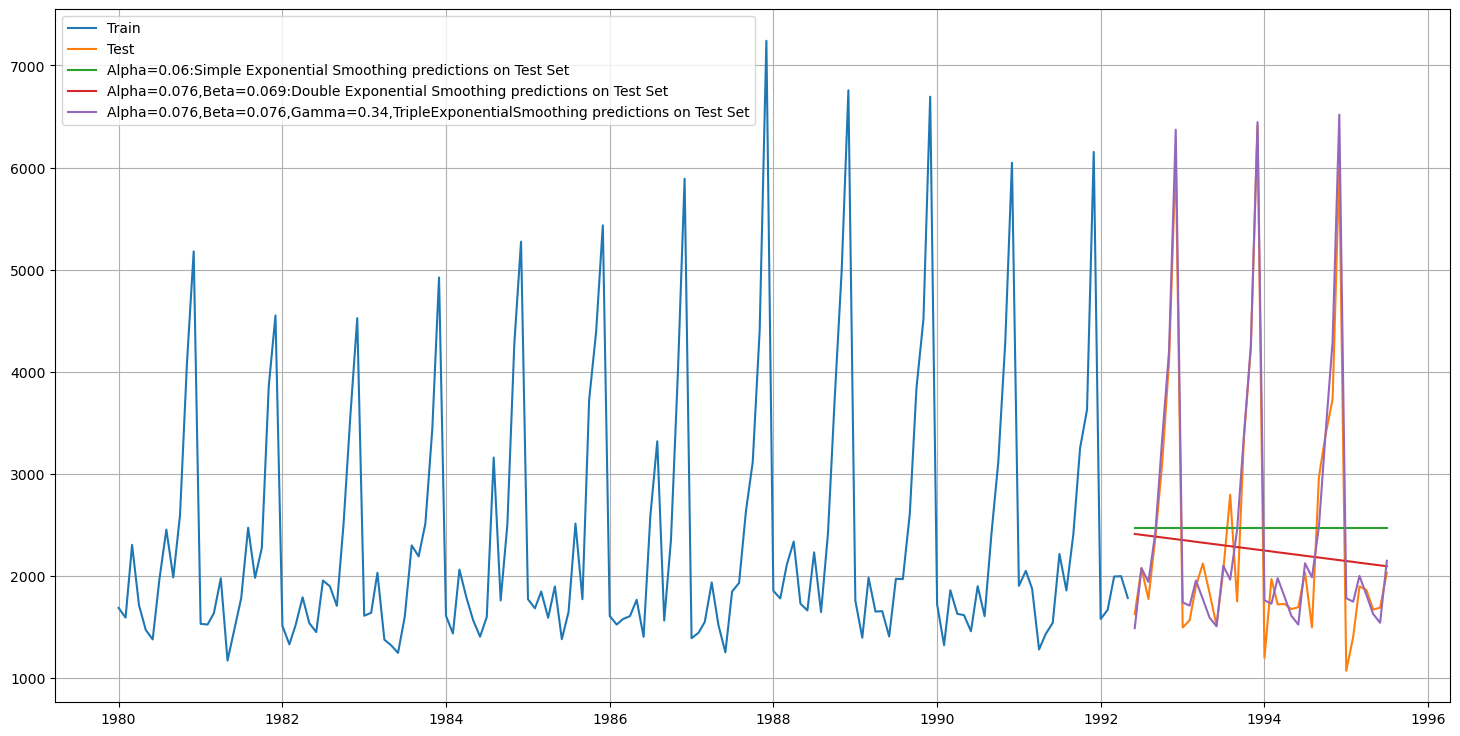

In [101]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling-Wine-Sales'], label='Train')
plt.plot(TES_test['Sparkling-Wine-Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.06:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.076,Beta=0.069:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.076,Beta=0.076,Gamma=0.34,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

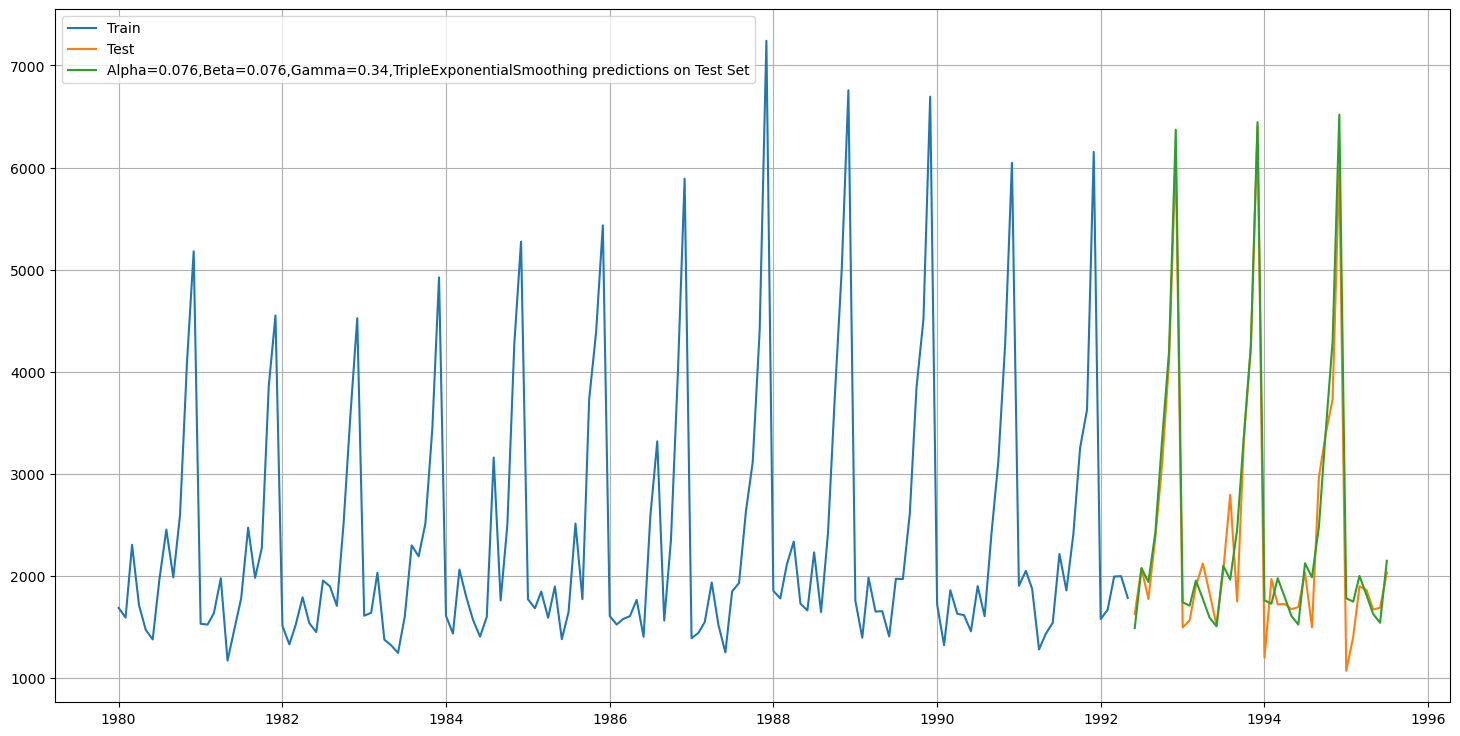

In [102]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling-Wine-Sales'], label='Train')
plt.plot(TES_test['Sparkling-Wine-Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.076,Beta=0.076,Gamma=0.34,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## TES Model Evaluation

### Model Evaluation for $\alpha$ = 0.076, $\beta$ = 0.076 and $\gamma$ = 0.34: Triple Exponential Smoothing

In [103]:
print('TES RMSE:',mean_squared_error(TES_test['Sparkling-Wine-Sales'].values,TES_test['auto_predict'].values,squared=False))

TES RMSE: 319.12140318607607


#### Setting different alpha, beta and gamma values.

###### Remember, the higher the gamma value more weightage is given to the seasonality. The role of gamma ( is particularly important in forecasting contexts where the seasonal patterns may evolve. 

###### The appropriate setting of gamma (along with alpha for the level and beta (for the trend) can significantly impact the model's performance, balancing the need to capture genuine seasonal changes while avoiding overreacting to random fluctuations or noise in the data.


#### We will run a loop with different alpha, beta and gamma values to understand which particular value works best for alpha, beta and gamma on the test set.

In [104]:
## First we will define an empty dataframe to store our values from the loop

TES_resultsDf = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
TES_resultsDf

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [105]:
for i in np.arange(0, 1, 0.05):  
    for j in np.arange(0, 1, 0.05):
        for k in np.arange(0, 1, 0.05):
            model = ExponentialSmoothing(TES_train['Sparkling-Wine-Sales'], trend="add", seasonal='mul', seasonal_periods=12, initialization_method='estimated').fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False)
            TES_train_fitted = model.fittedvalues
            TES_test_forecast = model.forecast(len(TES_test))
                
            rmse_train = mean_squared_error(TES_train['Sparkling-Wine-Sales'], TES_train_fitted, squared=False)
            rmse_test = mean_squared_error(TES_test['Sparkling-Wine-Sales'], TES_test_forecast, squared=False)
                
            TES_resultsDf = TES_resultsDf.append({'Alpha Values': i, 'Beta Values': j, 'Gamma Values': k, 'Train RMSE': rmse_train, 'Test RMSE': rmse_test}, ignore_index=True)
            

In [106]:
print(TES_resultsDf.sort_values(by='Test RMSE').head())

     Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
446          0.05         0.10          0.30  353.420919  295.006290
445          0.05         0.10          0.25  354.722982  296.005856
425          0.05         0.05          0.25  360.906071  296.768732
447          0.05         0.10          0.35  353.476148  297.901136
424          0.05         0.05          0.20  364.118480  298.305309


### Model Evaluation for  $\alpha$, $\beta$ and $\gamma$ with lowest RMSE : Triple Exponential Smoothing

In [107]:
TES_alpha_value = 0.05  # Example specific alpha value
TES_beta_value = 0.1  # Example specific beta value
TES_gamma_value = 0.3  # Example specific beta value

# 1. Fit the DES model with specific alpha and beta values
model_TES_best = ExponentialSmoothing(TES_train['Sparkling-Wine-Sales'], trend="add", seasonal='mul', seasonal_periods=12, initialization_method='estimated').fit(smoothing_level=TES_alpha_value, smoothing_slope=TES_beta_value, smoothing_seasonal=TES_gamma_value, optimized=False)

# 2. Generate forecasts for the test set duration
TES_predict_best = model_TES_best.forecast(len(TES_test))

# 3. Calculate RMSE using these specific forecasts
TES_RMSE_best = mean_squared_error(TES_test['Sparkling-Wine-Sales'].values, TES_predict_best.values, squared=False)
print('TES RMSE with best alpha, beta and gamma:', TES_RMSE_best.round(2))


TES RMSE with best alpha, beta and gamma: 295.01


### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.05, $\beta$ = 0.10 and $\gamma$ = 0.30.

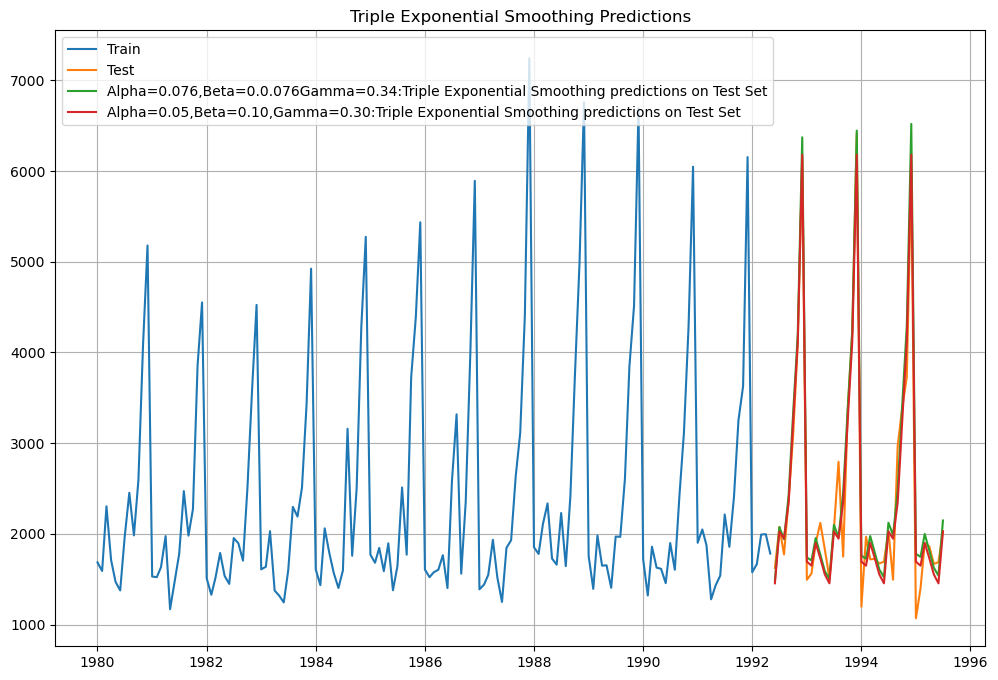

In [108]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(TES_train['Sparkling-Wine-Sales'], label='Train')
plt.plot(TES_test['Sparkling-Wine-Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.076,Beta=0.0.076Gamma=0.34:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_best, label='Alpha=0.05,Beta=0.10,Gamma=0.30:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [109]:
resultsDf_TES = pd.DataFrame({'Test RMSE': [mean_squared_error(TES_test['Sparkling-Wine-Sales'].values, TES_predict_best.values, squared=False)]}
                           ,index=['Alpha=0.05,Beta=0.1, Gamma=0.3:TES'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES ])
resultsDf

Test RMSE
RegressionOnTime                    1338.222990
2pointTrailingMovingAverage          805.879970
4pointTrailingMovingAverage         1161.282792
6pointTrailingMovingAverage         1290.624831
9pointTrailingMovingAverage         1375.582351
Alpha=0.06:SES                      1329.402456
Alpha=0.11,Beta=0.21:DES            1326.662208
Alpha=0.05,Beta=0.1, Gamma=0.3:TES   295.006290

## Building a Forecast Model using Holt Winters' Method (Triple Exponential Smoothing) 

So far we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).

The two models to be built on the whole data are the following:

* Alpha=0.076,Beta=0.076,Gamma=0.34,TripleExponentialSmoothing
* Alpha=0.05,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing	

In [110]:
sparkling.head()

Month  Year  Sparkling-Wine-Sales
1980-01-01   Jan  1980                  1686
1980-02-01   Feb  1980                  1591
1980-03-01   Mar  1980                  2304
1980-04-01   Apr  1980                  1712
1980-05-01   May  1980                  1471

In [111]:
sparkling_sales_df = sparkling.copy()

In [112]:
sparkling_sales_df.drop(columns=['Month', 'Year'], inplace=True)
sparkling_sales_df.head()

Sparkling-Wine-Sales
1980-01-01                  1686
1980-02-01                  1591
1980-03-01                  2304
1980-04-01                  1712
1980-05-01                  1471

In [113]:
sparkling_sales_df.tail()

Sparkling-Wine-Sales
1995-03-01                  1897
1995-04-01                  1862
1995-05-01                  1670
1995-06-01                  1688
1995-07-01                  2031

### Building TES Forecast Model for Model 1

In [114]:
full_TES_model_1 = ExponentialSmoothing(sparkling_sales_df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.076,
                                                                 smoothing_trend=0.076,
                                                                 smoothing_seasonal=0.34)

In [115]:
RMSE_full_TES_model_1 = metrics.mean_squared_error(sparkling_sales_df['Sparkling-Wine-Sales'],full_TES_model_1.fittedvalues,squared=False)

print('TES RMSE with Alpha=0.076, Beta=0.0.076, Gamma=0.34 is:',RMSE_full_TES_model_1.round(2))

TES RMSE with Alpha=0.076, Beta=0.0.076, Gamma=0.34 is: 347.46


In [116]:
sparkling_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sparkling-Wine-Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [117]:
# Getting the predictions for the same number of times stamps that are present in the test data
full_TES_model_1_prediction = full_TES_model_1.forecast(steps=len(test))

In [118]:
full_TES_model_1_prediction.head(24).round()

1995-08-01    1891.0
1995-09-01    2377.0
1995-10-01    3178.0
1995-11-01    3854.0
1995-12-01    5949.0
1996-01-01    1296.0
1996-02-01    1588.0
1996-03-01    1820.0
1996-04-01    1791.0
1996-05-01    1640.0
1996-06-01    1569.0
1996-07-01    1953.0
1996-08-01    1858.0
1996-09-01    2336.0
1996-10-01    3122.0
1996-11-01    3786.0
1996-12-01    5844.0
1997-01-01    1273.0
1997-02-01    1560.0
1997-03-01    1788.0
1997-04-01    1760.0
1997-05-01    1610.0
1997-06-01    1541.0
1997-07-01    1918.0
Freq: MS, dtype: float64

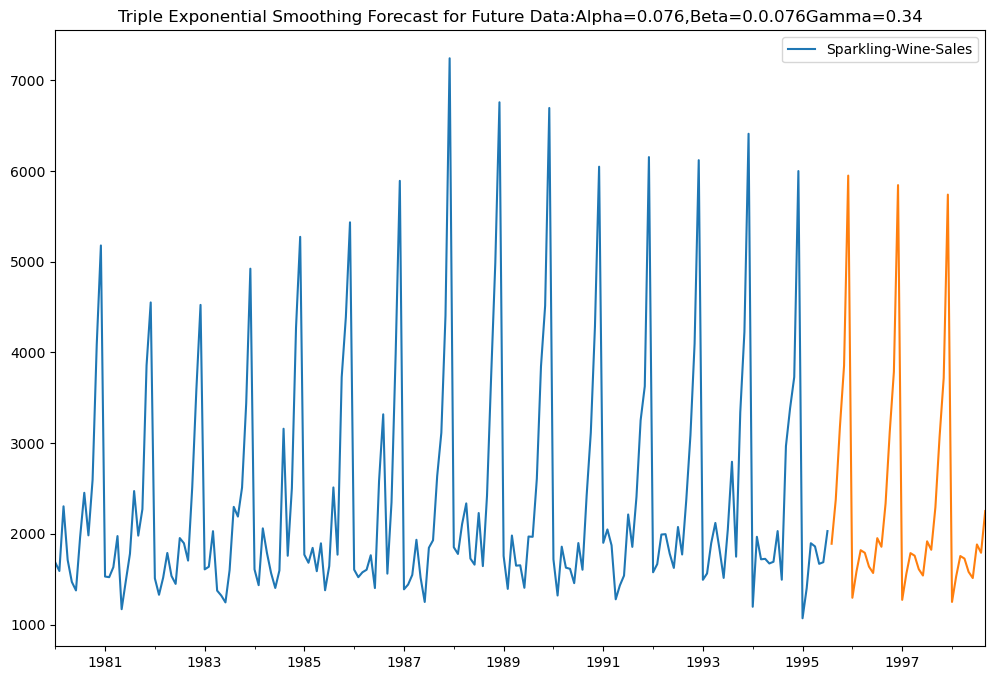

In [119]:
sparkling_sales_df.plot()
full_TES_model_1_prediction.plot()
plt.title('Triple Exponential Smoothing Forecast for Future Data:Alpha=0.076,Beta=0.0.076Gamma=0.34');

### Calculating upper and lower confidence bands at 95% confidence level

In [120]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
full_TES_model_1_prediction_df = pd.DataFrame({'lower_CI':full_TES_model_1_prediction - 1.96*np.std(full_TES_model_1.resid,ddof=1),
                          'prediction':full_TES_model_1_prediction,
                          'upper_ci': full_TES_model_1_prediction + 1.96*np.std(full_TES_model_1.resid,ddof=1)})
full_TES_model_1_prediction_df.head(24).round()

lower_CI  prediction  upper_ci
1995-08-01    1209.0      1891.0    2574.0
1995-09-01    1695.0      2377.0    3060.0
1995-10-01    2495.0      3178.0    3860.0
1995-11-01    3171.0      3854.0    4537.0
1995-12-01    5266.0      5949.0    6632.0
1996-01-01     613.0      1296.0    1979.0
1996-02-01     905.0      1588.0    2270.0
1996-03-01    1138.0      1820.0    2503.0
1996-04-01    1109.0      1791.0    2474.0
1996-05-01     957.0      1640.0    2322.0
1996-06-01     887.0      1569.0    2252.0
1996-07-01    1270.0      1953.0    2636.0
1996-08-01    1176.0      1858.0    2541.0
1996-09-01    1653.0      2336.0    3018.0
1996-10-01    2439.0      3122.0    3804.0
1996-11-01    3104.0      3786.0    4469.0
1996-12-01    5162.0      5844.0    6527.0
1997-01-01     590.0      1273.0    1956.0
1997-02-01     877.0      1560.0    2242.0
1997-03-01    1105.0      1788.0    2471.0
1997-04-01    1077.0      1760.0    2442.0
1997-05-01     928.0      1610.0    2293.0
1997-06-01     859.0      1541.0    2224.0
1997-07-01    1236.0      1918.0    2601.0

In [121]:
sparkling_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sparkling-Wine-Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 7.0 KB


In [122]:
full_TES_model_1_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 1995-08-01 to 1998-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lower_CI    38 non-null     float64
 1   prediction  38 non-null     float64
 2   upper_ci    38 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


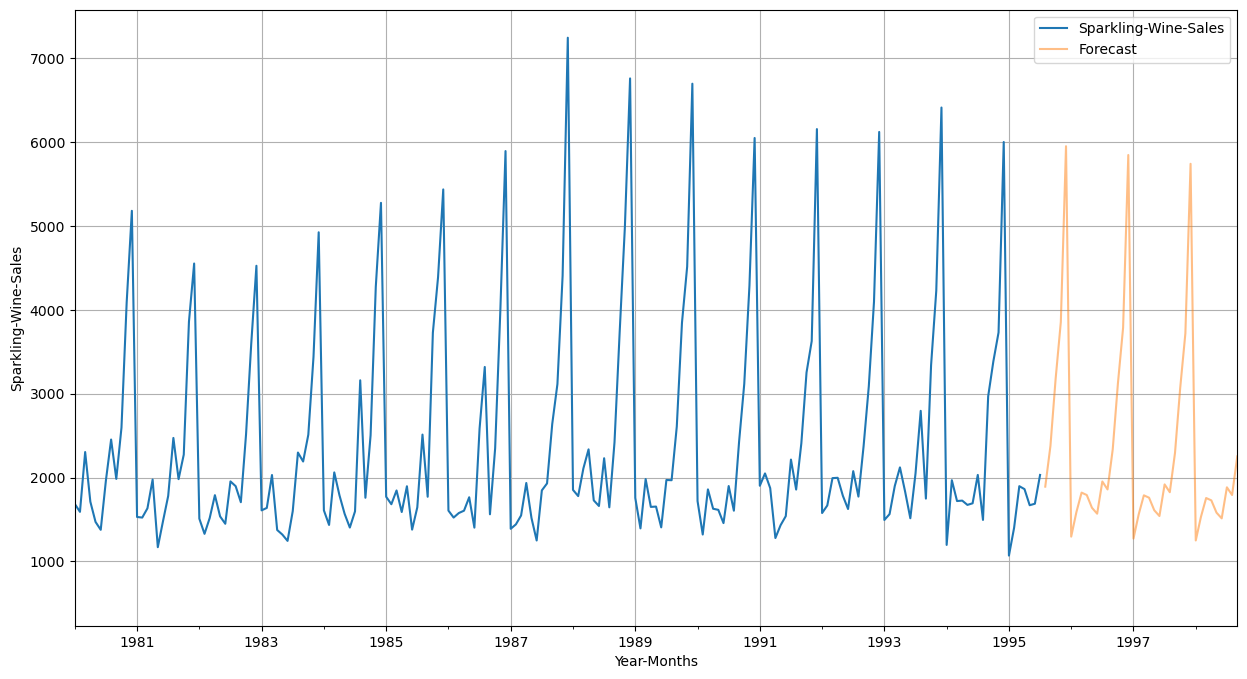

In [123]:
# plot the forecast along with the confidence band

axis = sparkling_sales_df.plot(label='Actual', figsize=(15,8))
full_TES_model_1_prediction_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(full_TES_model_1_prediction_df.index, full_TES_model_1_prediction_df['lower_CI'], full_TES_model_1_prediction_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling-Wine-Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

### Analysing the Residual Diagnostics

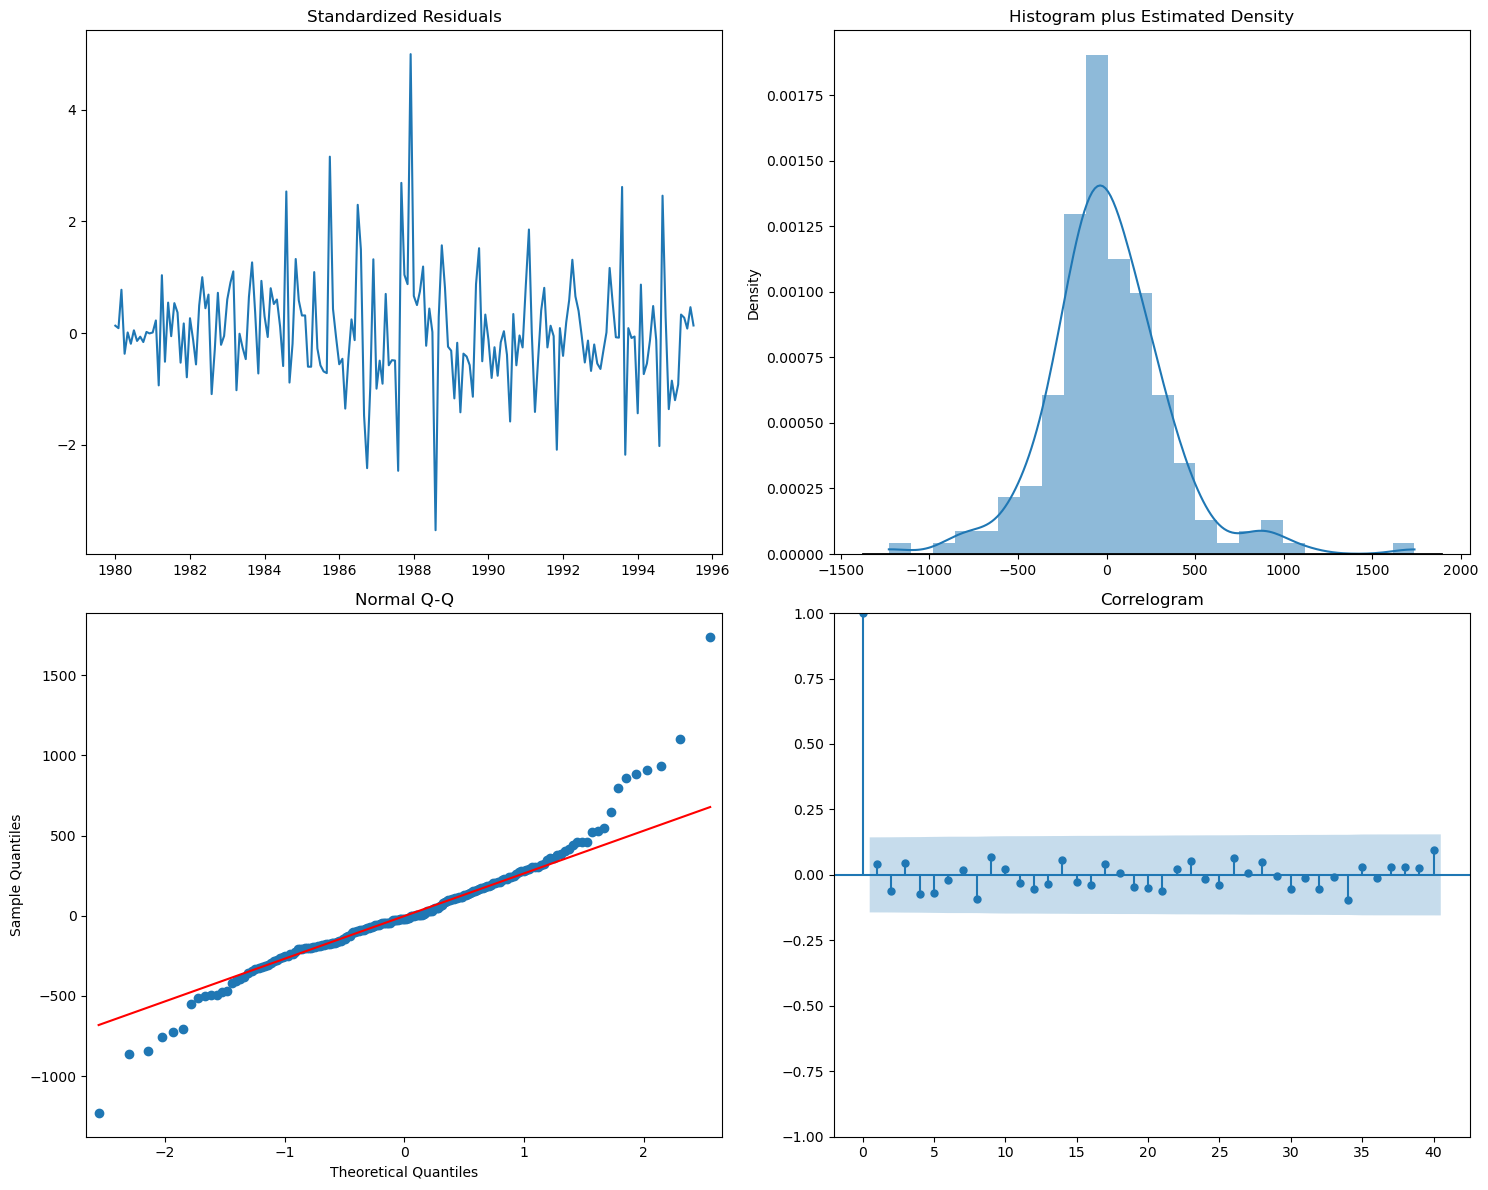

In [124]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

residuals = full_TES_model_1.resid

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standardized residuals
axes[0, 0].plot(residuals / residuals.std())
axes[0, 0].set_title('Standardized Residuals')

# Histogram plus estimated density
sns.histplot(residuals, kde=True, stat="density", linewidth=0, ax=axes[0, 1])
xmin, xmax = axes[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axes[0, 1].plot(x, p, 'k', linewidth=2)
axes[0, 1].set_title('Histogram plus Estimated Density')

# Normal Q-Q plot
sm.qqplot(residuals, line='q', ax=axes[1, 0])
axes[1, 0].set_title('Normal Q-Q')

# Correlogram
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=axes[1, 1])
axes[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()



### Building TES Forecast Model for Model 2

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.


In [125]:
full_TES_model_2 = ExponentialSmoothing(sparkling_sales_df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.05,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.3)

In [126]:
RMSE_full_TES_model_2 = metrics.mean_squared_error(sparkling_sales_df['Sparkling-Wine-Sales'],full_TES_model_2.fittedvalues,squared=False)

print('RMSE:',RMSE_full_TES_model_2)

RMSE: 344.58645447328877


In [127]:
# Getting the predictions for the same number of times stamps that are present in the test data
full_TES_model_2_prediction = full_TES_model_2.forecast(steps=len(test))

In [128]:
full_TES_model_2_prediction.head(24)

1995-08-01    1930.744263
1995-09-01    2370.651487
1995-10-01    3203.641854
1995-11-01    3922.240554
1995-12-01    6009.430432
1996-01-01    1339.395047
1996-02-01    1597.249830
1996-03-01    1827.270135
1996-04-01    1792.534359
1996-05-01    1643.924503
1996-06-01    1564.518979
1996-07-01    1973.921674
1996-08-01    1899.561746
1996-09-01    2332.312642
1996-10-01    3151.761734
1996-11-01    3858.637538
1996-12-01    5911.849701
1997-01-01    1317.616569
1997-02-01    1571.243411
1997-03-01    1797.478103
1997-04-01    1763.268901
1997-05-01    1617.048730
1997-06-01    1538.906477
1997-07-01    1941.562758
Freq: MS, dtype: float64

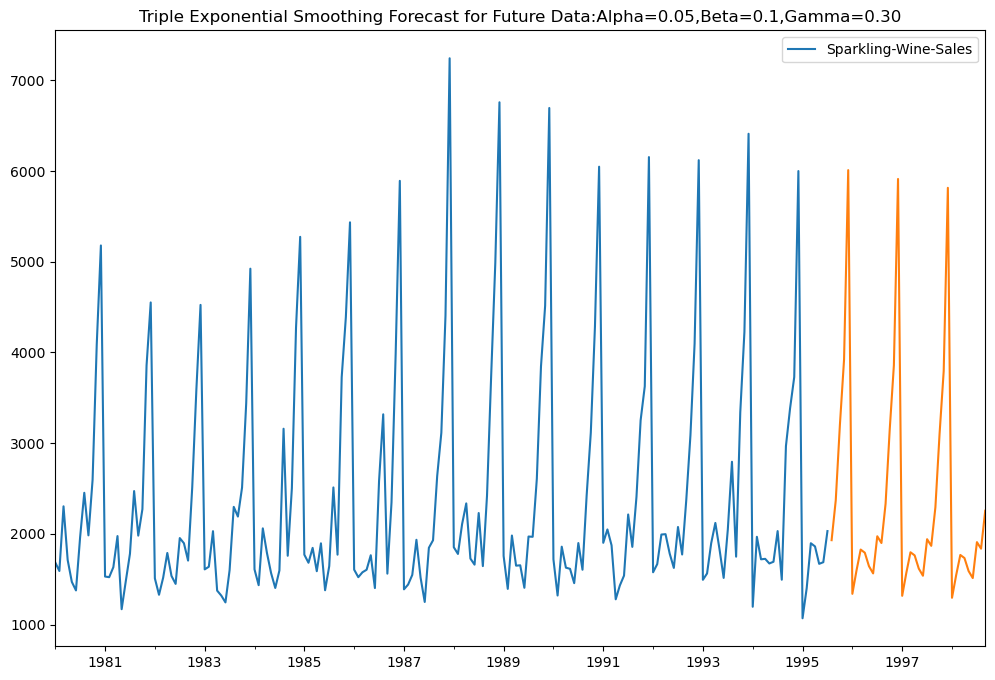

In [129]:
sparkling_sales_df.plot()
full_TES_model_2_prediction.plot()
plt.title('Triple Exponential Smoothing Forecast for Future Data:Alpha=0.05,Beta=0.1,Gamma=0.30');

In [130]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
full_TES_model_2_prediction_df = pd.DataFrame({'lower_CI':full_TES_model_2_prediction - 1.96*np.std(full_TES_model_2.resid,ddof=1),
                          'prediction':full_TES_model_2_prediction,
                          'upper_ci': full_TES_model_2_prediction + 1.96*np.std(full_TES_model_2.resid,ddof=1)})
full_TES_model_2_prediction_df.head(24).round()

lower_CI  prediction  upper_ci
1995-08-01    1254.0      1931.0    2607.0
1995-09-01    1694.0      2371.0    3047.0
1995-10-01    2527.0      3204.0    3880.0
1995-11-01    3246.0      3922.0    4599.0
1995-12-01    5333.0      6009.0    6686.0
1996-01-01     663.0      1339.0    2016.0
1996-02-01     921.0      1597.0    2274.0
1996-03-01    1151.0      1827.0    2504.0
1996-04-01    1116.0      1793.0    2469.0
1996-05-01     967.0      1644.0    2321.0
1996-06-01     888.0      1565.0    2241.0
1996-07-01    1297.0      1974.0    2651.0
1996-08-01    1223.0      1900.0    2576.0
1996-09-01    1656.0      2332.0    3009.0
1996-10-01    2475.0      3152.0    3828.0
1996-11-01    3182.0      3859.0    4535.0
1996-12-01    5235.0      5912.0    6589.0
1997-01-01     641.0      1318.0    1994.0
1997-02-01     895.0      1571.0    2248.0
1997-03-01    1121.0      1797.0    2474.0
1997-04-01    1087.0      1763.0    2440.0
1997-05-01     940.0      1617.0    2294.0
1997-06-01     862.0      1539.0    2216.0
1997-07-01    1265.0      1942.0    2618.0

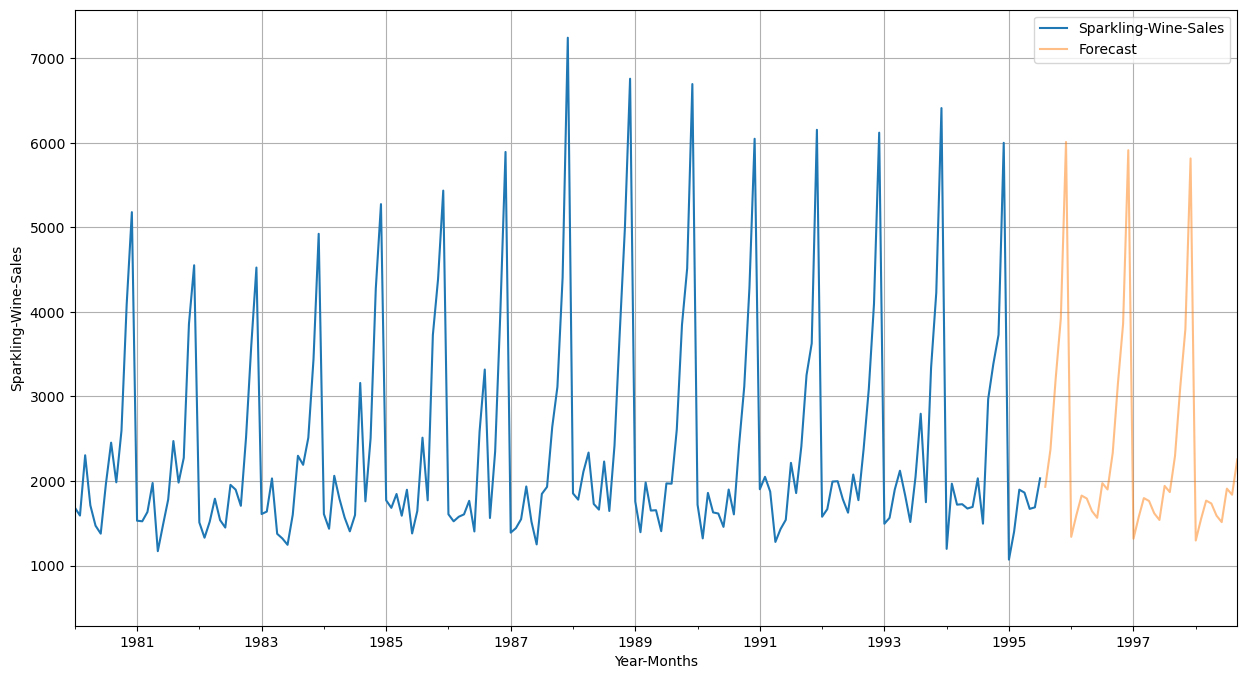

In [131]:
# plot the forecast along with the confidence band

axis = sparkling_sales_df.plot(label='Actual', figsize=(15,8))
full_TES_model_2_prediction_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(full_TES_model_2_prediction_df.index, full_TES_model_2_prediction_df['lower_CI'], full_TES_model_2_prediction_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling-Wine-Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

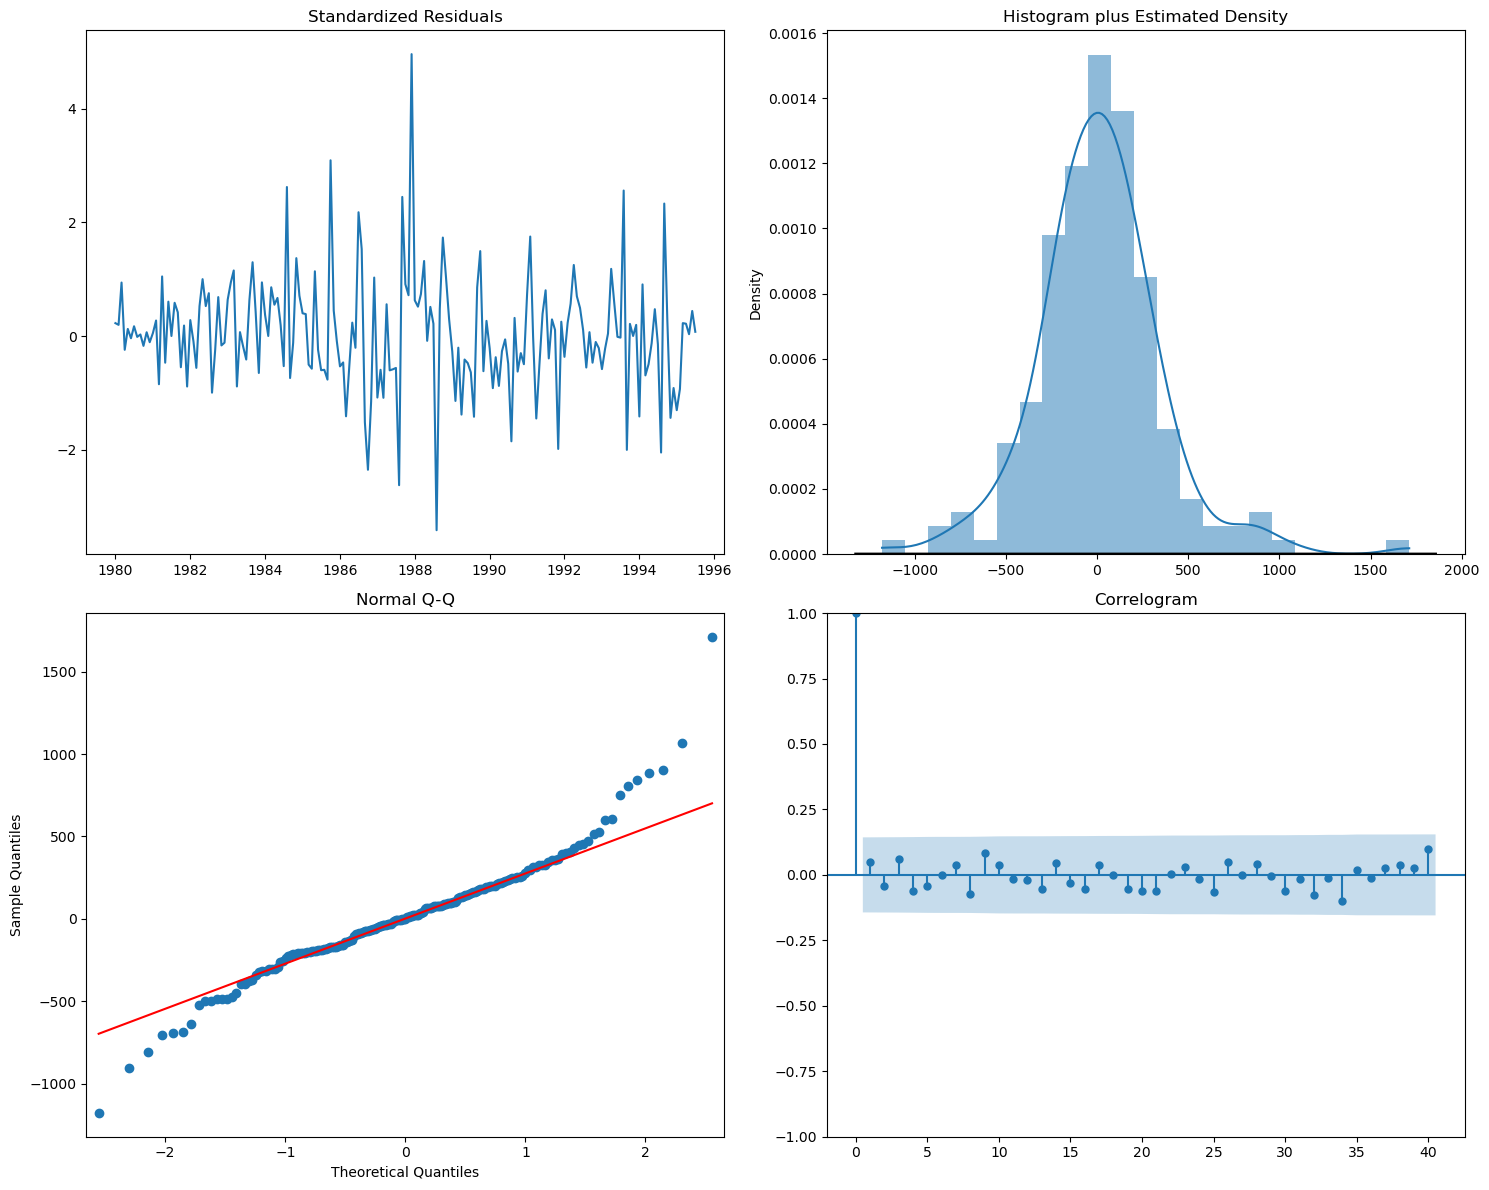

In [132]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

residuals = full_TES_model_2.resid

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standardized residuals
axes[0, 0].plot(residuals / residuals.std())
axes[0, 0].set_title('Standardized Residuals')

# Histogram plus estimated density
sns.histplot(residuals, kde=True, stat="density", linewidth=0, ax=axes[0, 1])
xmin, xmax = axes[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
axes[0, 1].plot(x, p, 'k', linewidth=2)
axes[0, 1].set_title('Histogram plus Estimated Density')

# Normal Q-Q plot
sm.qqplot(residuals, line='q', ax=axes[1, 0])
axes[1, 0].set_title('Normal Q-Q')

# Correlogram
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=axes[1, 1])
axes[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

## <font color='blue'>AR / ARMA / ARIMA / SARIMA Models: </font>

## Auto Regressive(AR) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Autoregression means **regression of a variable on itself** which means **Autoregressive models use previous time period values to predict the current time period values.**


- One of the fundamental assumptions of an AR model is that the **time series is assumed to be a stationary process.**


- An AR(p) model (Auto-Regressive model of order p) can be written as: 

## <font color='blue'> $y_{t}$ =   $φ_{1} y_{t-1} + φ_{2}y_{t-2} + ……+ φ_{p} y_{t-p} + ε_{t}$</font>

- <font color='blue'>$ε_{t}$ </font>**is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ**
- The <font color='blue'>φ </font>**are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.**


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## How to check for Stationarity?


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

*So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .*

####  Non differenced full data Time series

Text(0, 0.5, 'Sparkling Wine Sales')

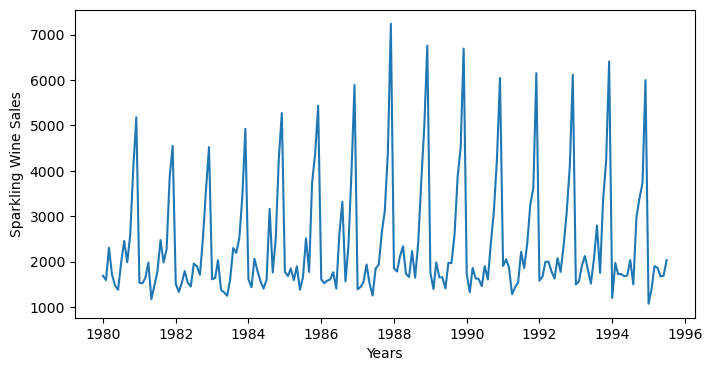

In [133]:
plt.figure(figsize=(8, 4))
plt.plot(sparkling_sales_df)
plt.xlabel('Years')
plt.ylabel('Sparkling Wine Sales')

In [134]:
from statsmodels.tsa.stattools import adfuller

In [135]:
dftest_non_differenced = adfuller(sparkling_sales_df)#python implementation of dicky fuller test 
dftest_non_differenced
print('DF test statistic is %3.3f' %dftest_non_differenced[0])
print('DF test p-value is %1.4f' %dftest_non_differenced[1])

DF test statistic is -1.360
DF test p-value is 0.6011


***the p-value 0.60 is very large, and not smaller than 0.05 and thus is not a stationary series.***

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## How to Make a Time Series Stationary ? - Differencing 'd'

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Differencing **'d'** is done on a non-stationary time series data one or more times to convert it into stationary. 



- **(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series** 

    - <font color='blue'> 1st  order differencing equation is : $𝒚_{𝒕} = 𝒚_{𝒕} − 𝒚_{𝒕-1}$
	- 2nd order differencing equation is : $𝒚_{𝒕} = (𝒚_{𝒕} − 𝒚_{𝒕-1}) − (𝒚_{𝒕-1} -y_{t-2})$		and so on…</font>


- The variance of a time series may also not be the same over time.   To remove this kind of non-stationarity, we can transform     the data. **If the variance is increasing over time, then a log transformation can stabilize the variance.** 


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


#### Performing differencing ( d=1 ) as the data is non-stationary

Text(0, 0.5, 'Sparkling Wine Sales')

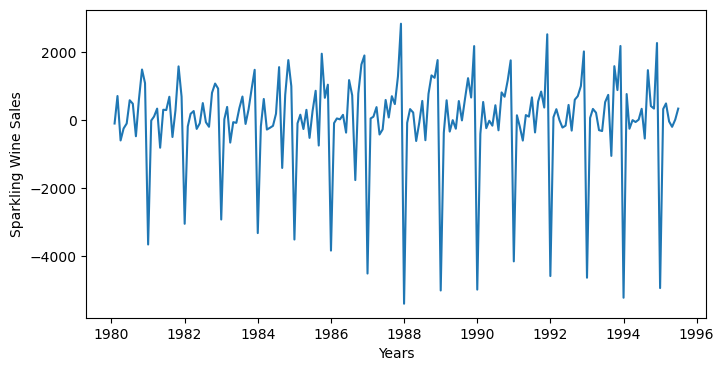

In [136]:
plt.figure(figsize=(8, 4))
plt.plot(sparkling_sales_df.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sparkling Wine Sales')

In [137]:
# First-order differencing on the data
sparkling_sales_df['Differenced'] = sparkling_sales_df['Sparkling-Wine-Sales'].diff(periods=1)

# Drop the NaN values that result from differencing
sparkling_sales_df_diff = sparkling_sales_df.dropna(subset=['Differenced'])

# Perform the Augmented Dickey-Fuller test on the differenced data
adf_test_result_diff = adfuller(sparkling_sales_df_diff['Differenced'])

# Extract the test statistic and p-value for the differenced data
adf_statistic_diff, p_value_diff = adf_test_result_diff[0], adf_test_result_diff[1]

print('DF test statistic is %3.3f' %adf_statistic_diff)
print('DF test p-value is %1.4f' %p_value_diff)

DF test statistic is -45.050
DF test p-value is 0.0000


***the p-value 0.00 is smaller than 0.05 and thus this has become a stationary series.***

Let's check the DF again to see Original Sales values and Differenced Sales Values

In [138]:
sparkling_sales_df.head()

Sparkling-Wine-Sales  Differenced
1980-01-01                  1686          NaN
1980-02-01                  1591        -95.0
1980-03-01                  2304        713.0
1980-04-01                  1712       -592.0
1980-05-01                  1471       -241.0

## Alternative way to Check for Stationarity

In [139]:
## Test for stationarity of the series - Dicky Fuller test

def test_stationarity(timeseries):
    
    # Drop NaN values to avoid errors in rolling statistics and Dickey-Fuller test
    timeseries.dropna(inplace=True)
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput, '\n')


#### Checking output of our test stationarity function on original time series

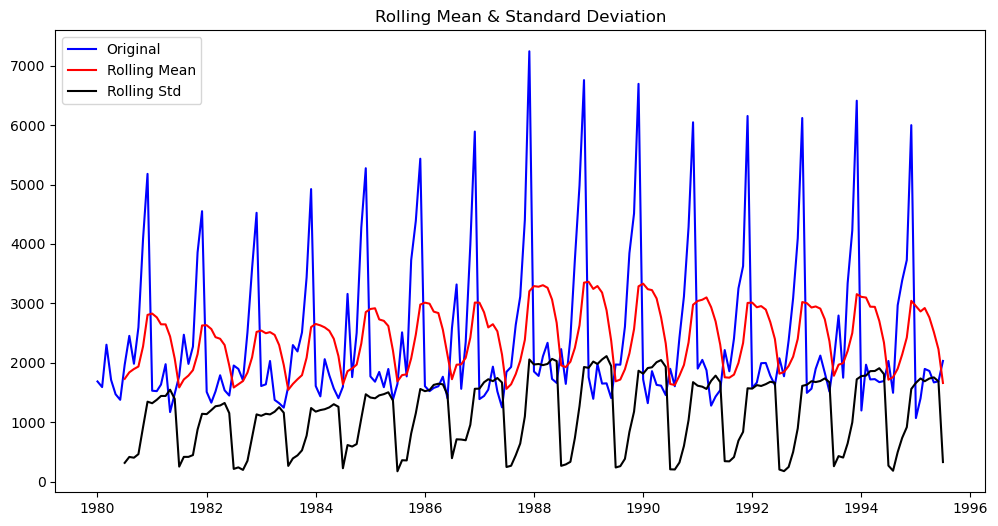

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [140]:
test_stationarity(sparkling_sales_df['Sparkling-Wine-Sales'])

#### Checking output of our test stationarity function on differenced time series

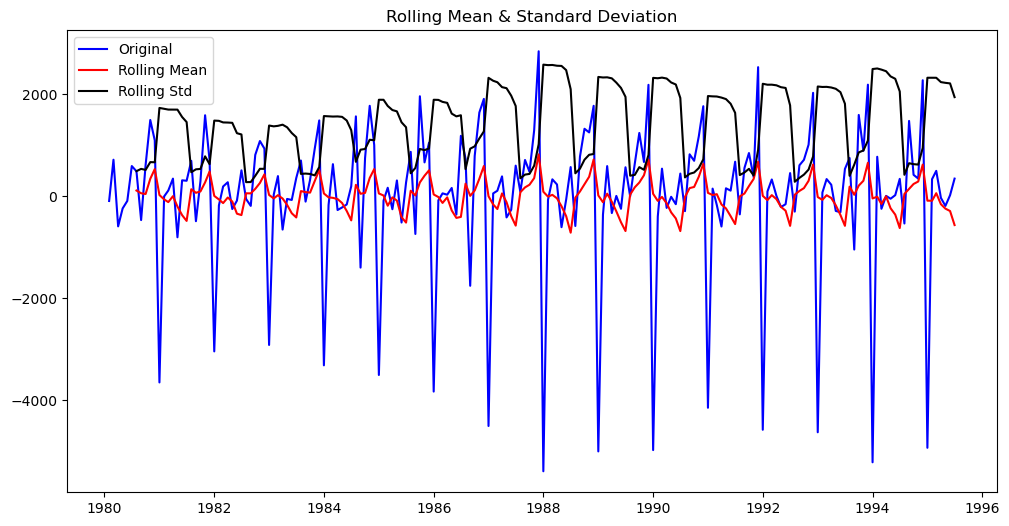

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [141]:
test_stationarity(sparkling_sales_df['Differenced'])

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'p' of AR model

- We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.


- For an AR model, 2 ways to identify order of 'p':


<i>1) **PACF Approach** :  the PACF method where the  (Partial Auto Correlation Function) values cut off and become zero after a certain lag.               PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken             as the order of AR as ‘p’. This can be seen from a PACF plot.</i>

- <i>If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.</i>
- <i>If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…</i>



 - **Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between $𝑋_{𝑡}$ and $𝑋_{𝑡−2}$ holding $𝑋_{𝑡−1}$ fixed.**


<font color='blue'><i>2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.** </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Plot of Partial-autocorrelation function plots on the original data and differenced data

In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

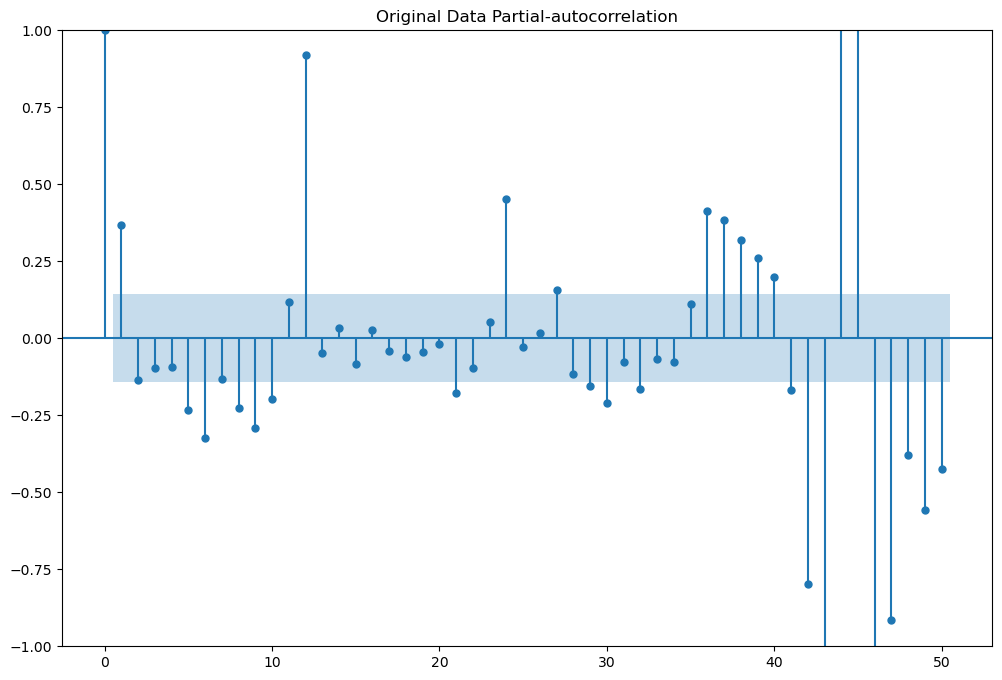

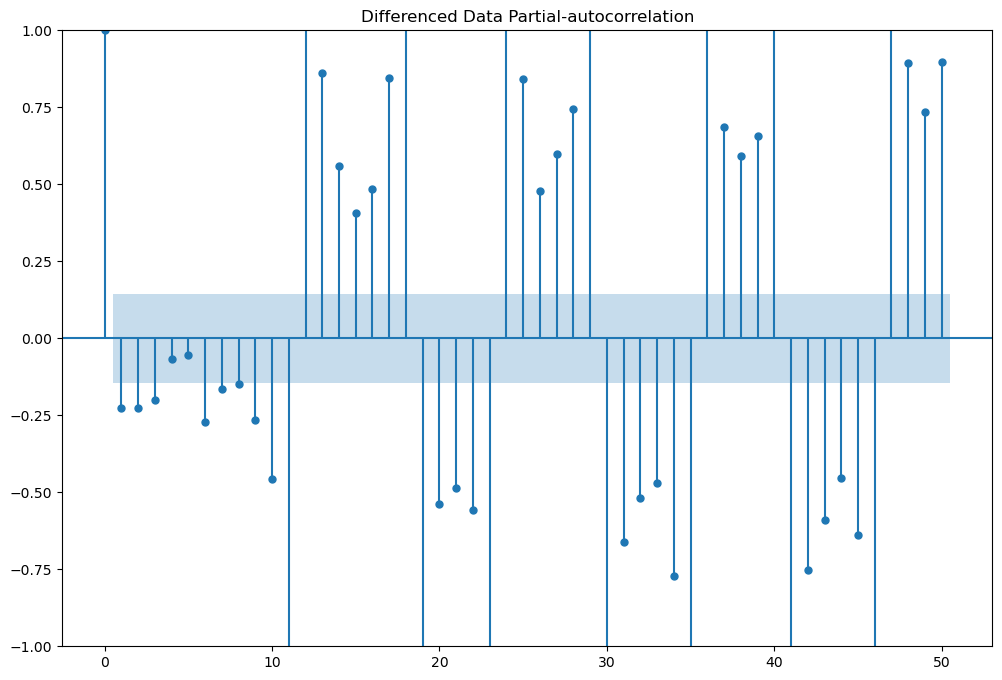

In [143]:
plot_pacf(sparkling_sales_df['Sparkling-Wine-Sales'],lags=50, title='Original Data Partial-autocorrelation')
plot_pacf(sparkling_sales_df['Sparkling-Wine-Sales'].diff().dropna(),lags=50,title='Differenced Data Partial-autocorrelation')
plt.show()

### From the above plots, we can say that there seems to be a seasonality in the data and differencing has significantly decreased autocorrelation, peaking at p = 3 after which it comes down.

## Using the 2nd method(Lowest AIC) to compare different orders of 'p'

In [144]:

# Define the p parameter to take any value between 0 and 2
p= range(1,4)


## Moving Average(MA) Models 

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

- Moving average model **considers past residual values to predict the current time period values.** 
  These past residuals are past prediction errors.
    

- For a MA model, **the residual or error component is modeled.**


- The moving average model MA(q) of  order q can be represented as:


## <font color='blue'>$y_{t} =  ε_{t} + θ_{1}ε_{t-1} +……+ θ_{q}ε_{t-q}$</font>

- **Where $y_{t}$  time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance $σ^{2}$ and  $Cov(ε_{t-1},ε_{t-q})$ = 0.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Choose the order 'q' of MA model

- We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.


- For a MA model,  

<i>1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.</i>



<i>2) <font color='blue'>**Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. </i></font>


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Plot of Autocorrelation function plots on the original data and differenced data

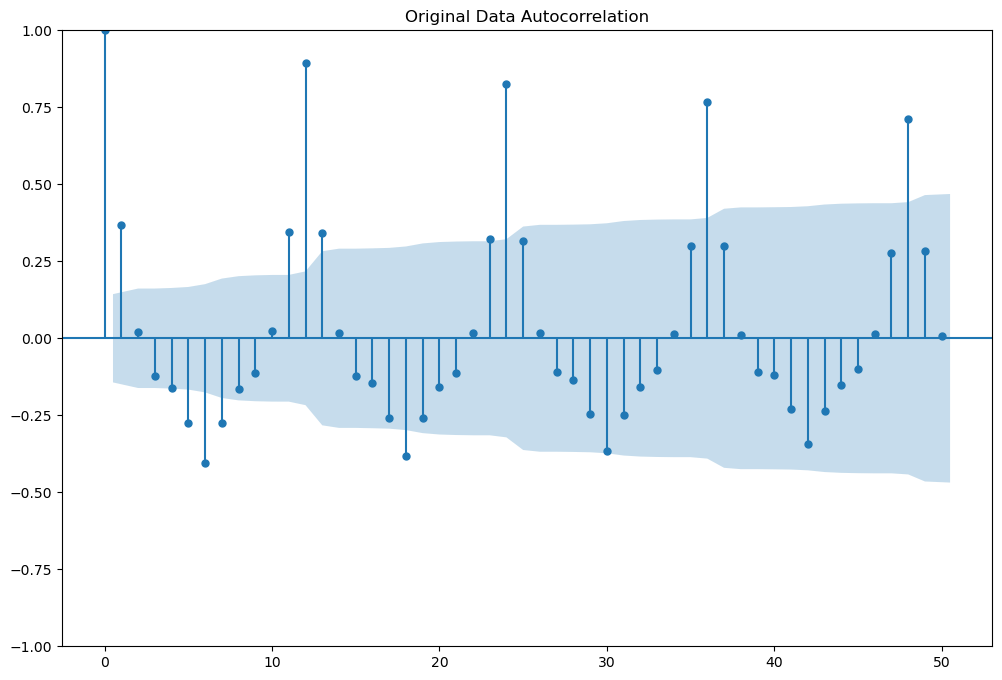

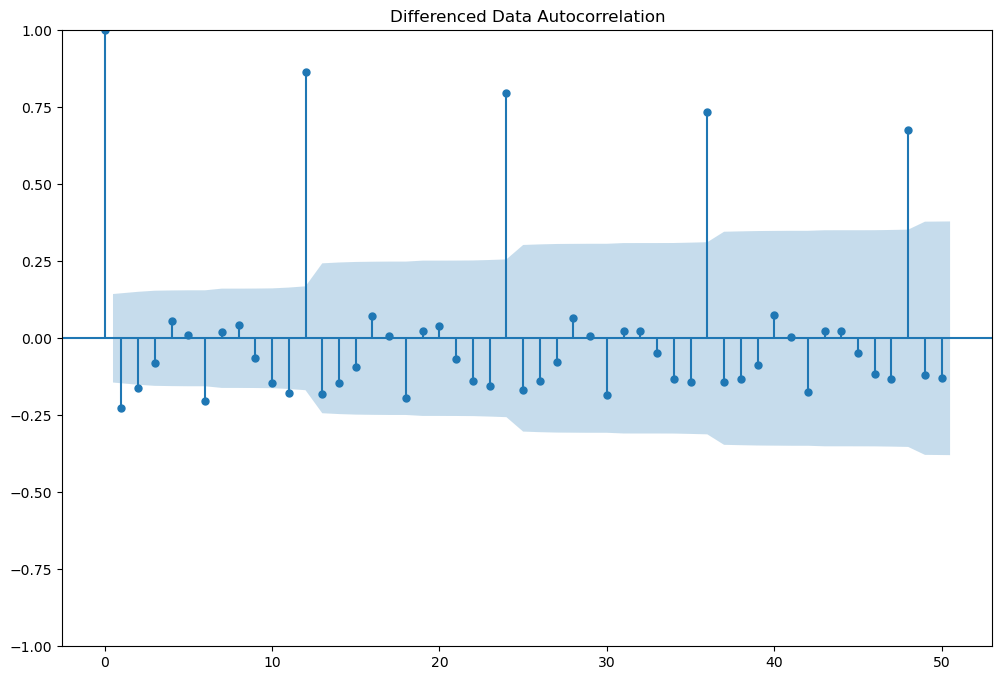

In [145]:
plot_acf(sparkling_sales_df['Sparkling-Wine-Sales'],lags=50, title='Original Data Autocorrelation')
plot_acf(sparkling_sales_df['Sparkling-Wine-Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## Using the 2nd method(Lowest AIC) to compare different orders of 'q'

In [146]:

# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

### WHY?

- <font color='blue'>**ACF(0)=1**</font>


- <font color='blue'>**ACF(1)=PACF(1)**</font>

#### <u> Parameter </u>   (p, d, q)   <u>estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models </u>

In [147]:
import itertools

d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [148]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [149]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [150]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [151]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

## <u> AR/MA/ARMA/ARIMA/SARIMA Train - Test Split</u>

In [152]:
train_2    =   sparkling_sales_df[0:int(len(sparkling_sales_df)*0.8)] 
test_2     =   sparkling_sales_df[int(len(sparkling)*0.8):]

#### Using the differenced series as there is variance in the data 

In [153]:
train_sales_ts = train_2['Differenced']

In [154]:
train_sales_ts.head()

1980-01-01      NaN
1980-02-01    -95.0
1980-03-01    713.0
1980-04-01   -592.0
1980-05-01   -241.0
Freq: MS, Name: Differenced, dtype: float64

## Check for stationarity of the Training Data Time Series.

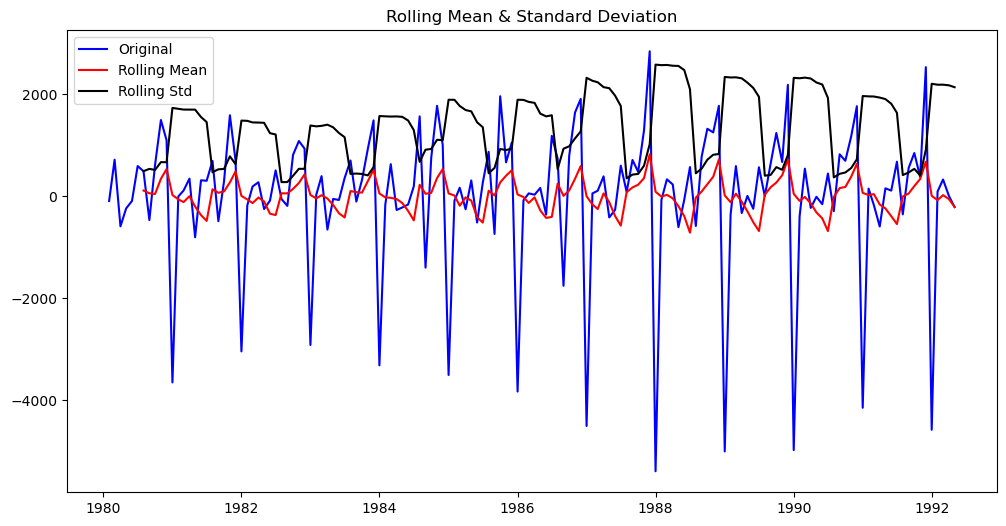

Results of Dickey-Fuller Test:
Test Statistic                -8.722027e+00
p-value                        3.365371e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64 



In [155]:
test_stationarity(train_2['Differenced'])

In [156]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model 6: AR Model 


- **Autoregressive models use <font color='blue'>previous time period values to predict the current time period values.**</font>

### Manual AR Model (PACF approach)

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1273.735
Date:                Sun, 17 Mar 2024   AIC                           2557.471
Time:                        23:37:14   BIC                           2572.457
Sample:                    02-01-1980   HQIC                          2563.559
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6554    101.060      0.006      0.995    -197.419     198.729
ar.L1         -0.2804      0.116     -2.423      0.015      -0.507      -0.054
ar.L2         -0.2857      0.117     -2.434      0.0

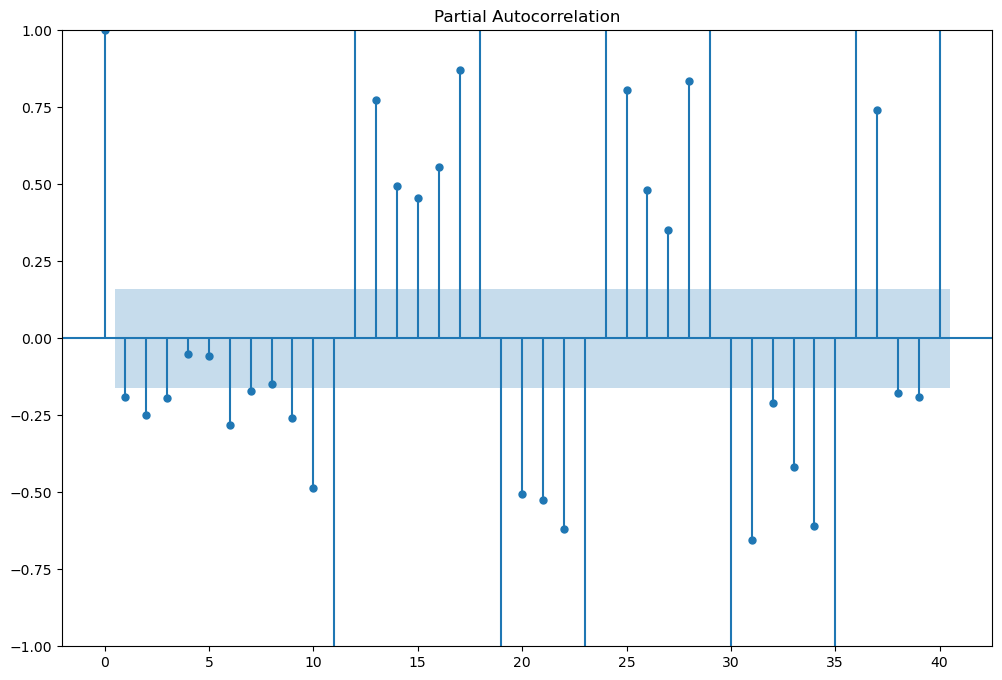

In [157]:
# Assuming you have differenced your data if needed and stored in train_sales_ts
# Now, you'll analyze the PACF plot to determine 'p'

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming train_sales_ts is a pandas Series of the training data
# Generate PACF plot
sm.graphics.tsa.plot_pacf(train_sales_ts, lags=40)

# Based on the PACF plot, choose a value for p (say p = 3)

# Fit AR model with chosen p
manual_ar_model = ARIMA(train_sales_ts, order=(3, 0, 0)).fit()

# Look at the AIC and other statistics
print(manual_ar_model.summary())




In [158]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming best_results_AR is the trained model on the training dataset
# And that test_2 is the test dataset with the actual 'Differenced' values
# Also, it's assumed that 'Differenced' column contains the actual test values after differencing

# Generate predictions for the test set
predictions_AR = manual_ar_model.get_forecast(steps=len(test_2))
predicted_mean_AR = predictions_AR.predicted_mean

# RMSE calculation
rmse_AR = sqrt(mean_squared_error(test_2['Differenced'], predicted_mean_AR))
rmse_AR

1611.4435264401498

### <u>Auto AR Model building to estimate best 'p' ( Lowest AIC Approach )</u>

In [159]:

# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [160]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:2567.761892877527
ARIMA(2, 0, 0) - AIC:2560.7305502272493
ARIMA(3, 0, 0) - AIC:2557.4706281454655


In [161]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

AR_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
2  (3, 0, 0)  2557.470628
1  (2, 0, 0)  2560.730550
0  (1, 0, 0)  2567.761893

#### <u>Building AR model with best <font color='blue'>'p'</font> parameter </u>

In [162]:
best_model_AR = ARIMA(train_sales_ts,order = (3,0,0))#p=3 with lowest AIC 
best_results_AR = best_model_AR.fit()

In [163]:
print(best_results_AR.summary().tables[0])
print(best_results_AR.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1273.735
Date:                Sun, 17 Mar 2024   AIC                           2557.471
Time:                        23:37:14   BIC                           2572.457
Sample:                    02-01-1980   HQIC                          2563.559
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6554    101.060      0.006      0.995    -197.419     198.729
ar.L1         -0.2804      0.116     -2.423      0.015      -0.507      -0.054
ar.L2         -0.2857      0.117     -2.434      0.0

#### <u>Calculating RMSE for best AR model</u>

In [164]:
test_2.head()

Sparkling-Wine-Sales  Differenced
1992-06-01                  1625       -158.0
1992-07-01                  2076        451.0
1992-08-01                  1773       -303.0
1992-09-01                  2377        604.0
1992-10-01                  3088        711.0

In [165]:
pred_dynamic_AR = best_results_AR.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [166]:
pred99_AR = best_results_AR.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [167]:
# Extract the predicted and true values of our time series
sales_forecasted_diff_AR = pred_dynamic_AR.predicted_mean
testCopy1 = test_2.copy()
testCopy1['sales_forecasted_diff_AR'] = pred99_AR.predicted_mean

In [168]:
# Compute the root mean square error
ar_mse = ((testCopy1['Differenced'] - testCopy1['sales_forecasted_diff_AR']) ** 2).mean()
ar_rmse = np.sqrt(ar_mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(ar_rmse, 3)))

The Root Mean Squared Error of our forecasts is 1611.444


In [169]:
testCopy1.head()

Sparkling-Wine-Sales  Differenced  sales_forecasted_diff_AR
1992-06-01                  1625       -158.0                 -0.426875
1992-07-01                  2076        451.0                 61.666484
1992-08-01                  1773       -303.0                 23.651295
1992-09-01                  2377        604.0                -23.022737
1992-10-01                  3088        711.0                -10.585944

In [170]:
# To "integrate" the forecasts made on differenced data back to the original scale, 
# we need to perform a cumulative sum of the forecasted differences, 
# starting from the last actual value of the non-differenced series.

# Step 1: Retrieve the last actual value of the original series
last_actual_value = sparkling_sales_df['Sparkling-Wine-Sales'].iloc[-len(test_2)-1]

# Step 2: Cumulatively sum the forecasted differences and add to the last actual value
# Reverse the differencing
integrated_forecast_ar = last_actual_value + testCopy1['sales_forecasted_diff_AR'].cumsum()

# Add the integrated forecast to your test DataFrame for comparison
testCopy1['Integrated_Forecast_AR'] = integrated_forecast_ar

print(testCopy1[['Sparkling-Wine-Sales', 'Integrated_Forecast_AR']])


            Sparkling-Wine-Sales  Integrated_Forecast_AR
1992-06-01                  1625             1782.573125
1992-07-01                  2076             1844.239609
1992-08-01                  1773             1867.890904
1992-09-01                  2377             1844.868167
1992-10-01                  3088             1834.282223
1992-11-01                  4096             1840.591425
1992-12-01                  6119             1847.262779
1993-01-01                  1494             1846.700036
1993-02-01                  1564             1844.930103
1993-03-01                  1898             1845.498315
1993-04-01                  2121             1847.096916
1993-05-01                  1831             1847.962386
1993-06-01                  1515             1848.305581
1993-07-01                  2048             1848.813655
1993-08-01                  2795             1849.560625
1993-09-01                  1749             1850.290326
1993-10-01                  333

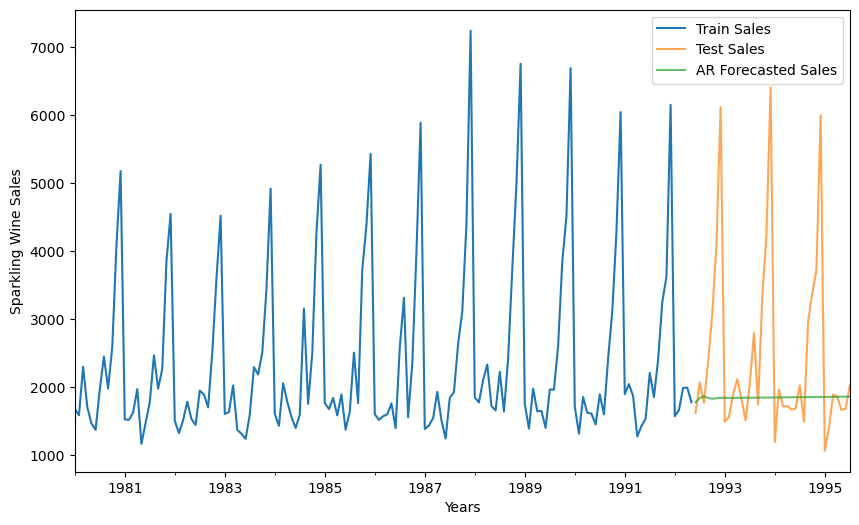

In [171]:
axis = train_2['Sparkling-Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling-Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['Integrated_Forecast_AR'].plot(ax=axis, label='AR Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [172]:
resultsDf_AR = pd.DataFrame({'Test RMSE': [ar_rmse]}
                           ,index=['ARIMA(3,0,0)'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES, resultsDf_AR])
resultsDf

Test RMSE
RegressionOnTime                    1338.222990
2pointTrailingMovingAverage          805.879970
4pointTrailingMovingAverage         1161.282792
6pointTrailingMovingAverage         1290.624831
9pointTrailingMovingAverage         1375.582351
Alpha=0.06:SES                      1329.402456
Alpha=0.11,Beta=0.21:DES            1326.662208
Alpha=0.05,Beta=0.1, Gamma=0.3:TES   295.006290
ARIMA(3,0,0)                        1611.443526

**Note: the best model for an AR MODEL is the one as AR(3)**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model 7: Improving AutoRegressive Models through Moving Average Forecasts

- **Improving AutoRegressive Models through Moving Average Forecasts.**
- ARMA models consist of 2 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### Manual ARMA Model based on PACF and ACF Plot

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1254.081
Date:                Sun, 17 Mar 2024   AIC                           2522.162
Time:                        23:37:14   BIC                           2543.142
Sample:                    02-01-1980   HQIC                          2530.686
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7493      8.980      0.863      0.388      -9.852      25.351
ar.L1         -0.5062      0.160     -3.159      0.002      -0.820      -0.192
ar.L2          0.2980      0.142      2.097      0.0

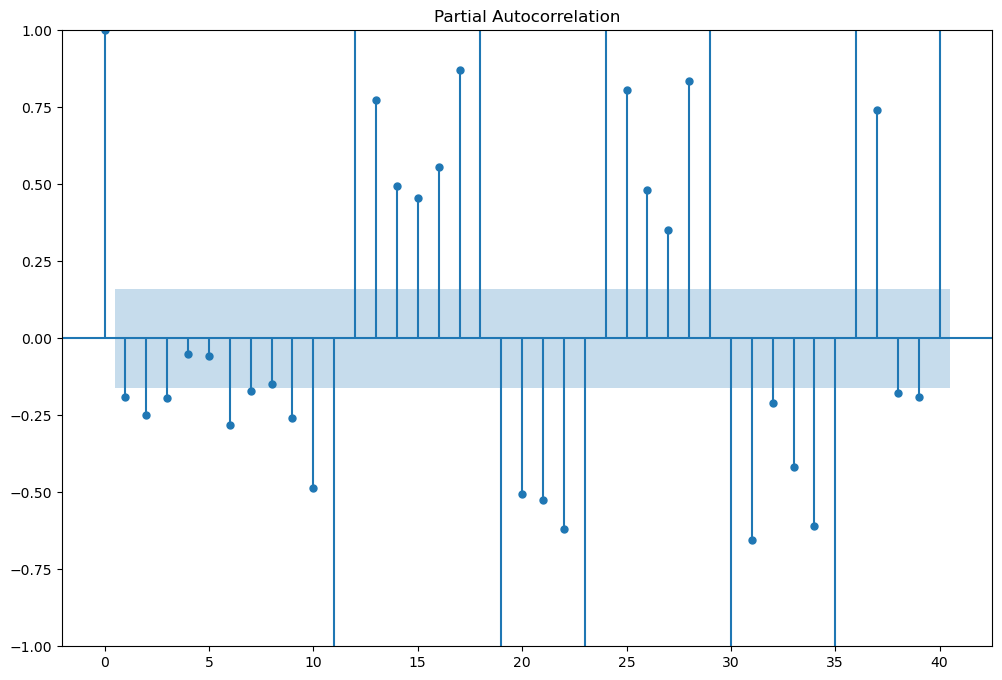

In [173]:
# Assuming you have differenced your data if needed and stored in train_sales_ts
# Now, you'll analyze the PACF plot to determine 'p'

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming train_sales_ts is a pandas Series of the training data
# Generate PACF plot
sm.graphics.tsa.plot_pacf(train_sales_ts, lags=40)

# Based on the PACF plot, choose a value for p (say p = 3)

# Fit AR model with chosen p
manual_arma_model = ARIMA(train_sales_ts, order=(3, 0, 2)).fit()

# Look at the AIC and other statistics
print(manual_arma_model.summary())

In [174]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming best_results_AR is the trained model on the training dataset
# And that test_2 is the test dataset with the actual 'Differenced' values
# Also, it's assumed that 'Differenced' column contains the actual test values after differencing

# Generate predictions for the test set
predictions_ARMA = manual_arma_model.get_forecast(steps=len(test_2))
predicted_mean_ARMA = predictions_ARMA.predicted_mean

# RMSE calculation
rmse_ARMA = sqrt(mean_squared_error(test_2['Differenced'], predicted_mean_ARMA))
rmse_ARMA

1540.0852435327372

#### <u>ARMA Model building to estimate best <font color='blue'>'p' , 'q' </font> ( Lowest AIC Approach )</u>

In [175]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [176]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:2525.3094177429457
ARIMA(1, 0, 2) - AIC:2524.476432702575
ARIMA(1, 0, 3) - AIC:2526.673723382528
ARIMA(2, 0, 1) - AIC:2523.321444956178
ARIMA(2, 0, 2) - AIC:2507.0229766558396
ARIMA(2, 0, 3) - AIC:2522.5923544053576
ARIMA(3, 0, 1) - AIC:2528.8021055542295
ARIMA(3, 0, 2) - AIC:2522.161672586528
ARIMA(3, 0, 3) - AIC:2519.2935867780097


In [177]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
4  (2, 0, 2)  2507.022977
8  (3, 0, 3)  2519.293587
7  (3, 0, 2)  2522.161673
5  (2, 0, 3)  2522.592354
3  (2, 0, 1)  2523.321445

#### <u>Building ARMA model with best p,q parameter </u>

In [178]:
ARMA_best_model = ARIMA(train_sales_ts,order = (2,0,2))
ARMA_best_results = ARMA_best_model.fit()

In [179]:
print(ARMA_best_results.summary().tables[0])
print(ARMA_best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1247.511
Date:                Sun, 17 Mar 2024   AIC                           2507.023
Time:                        23:37:16   BIC                           2525.006
Sample:                    02-01-1980   HQIC                          2514.330
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7693      2.627      1.054      0.292      -2.380       7.919
ar.L1          1.1511      0.097     11.923      0.000       0.962       1.340
ar.L2         -0.4681      0.114     -4.091      0.0

#### <u>Calculating RMSE for best MA model </u>

In [180]:
pred_dynamic_ARMA = ARMA_best_results.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [181]:
pred99_ARMA = ARMA_best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [182]:
# Extract the predicted and true values of our time series
sales_ts_forecasted_diff_ARMA = pred_dynamic_ARMA.predicted_mean
testCopy1['sales_forecasted_diff_ARMA'] = pred99_ARMA.predicted_mean

In [183]:
# Compute the root mean square error
arma_mse = ((testCopy1['Differenced'] - testCopy1['sales_forecasted_diff_ARMA']) ** 2).mean()
arma_rmse = np.sqrt(arma_mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(arma_rmse, 3)))

The Root Mean Squared Error of our forecasts is 1621.95


In [184]:
# To "integrate" the forecasts made on differenced data back to the original scale, 
# we need to perform a cumulative sum of the forecasted differences, 
# starting from the last actual value of the non-differenced series.

# Step 1: Retrieve the last actual value of the original series
last_actual_value = sparkling_sales_df['Sparkling-Wine-Sales'].iloc[-len(test_2)-1]

# Step 2: Cumulatively sum the forecasted differences and add to the last actual value
# Reverse the differencing
integrated_forecast_arma = last_actual_value + testCopy1['sales_forecasted_diff_ARMA'].cumsum()

# Add the integrated forecast to your test DataFrame for comparison
testCopy1['Integrated_Forecast_arma'] = integrated_forecast_arma

print(testCopy1[['Sparkling-Wine-Sales', 'Integrated_Forecast_arma']])

            Sparkling-Wine-Sales  Integrated_Forecast_arma
1992-06-01                  1625               2534.960157
1992-07-01                  2076               2914.694560
1992-08-01                  1773               3000.707757
1992-09-01                  2377               2922.848371
1992-10-01                  3088               2793.839848
1992-11-01                  4096               2682.659254
1992-12-01                  6119               2615.942738
1993-01-01                  1494               2592.064345
1993-02-01                  1564               2596.684443
1993-03-01                  1898               2614.057602
1993-04-01                  2121               2632.771239
1993-05-01                  1831               2647.058402
1993-06-01                  1515               2655.622740
1993-07-01                  2048               2659.671437
1993-08-01                  2795               2661.200893
1993-09-01                  1749               2661.9441

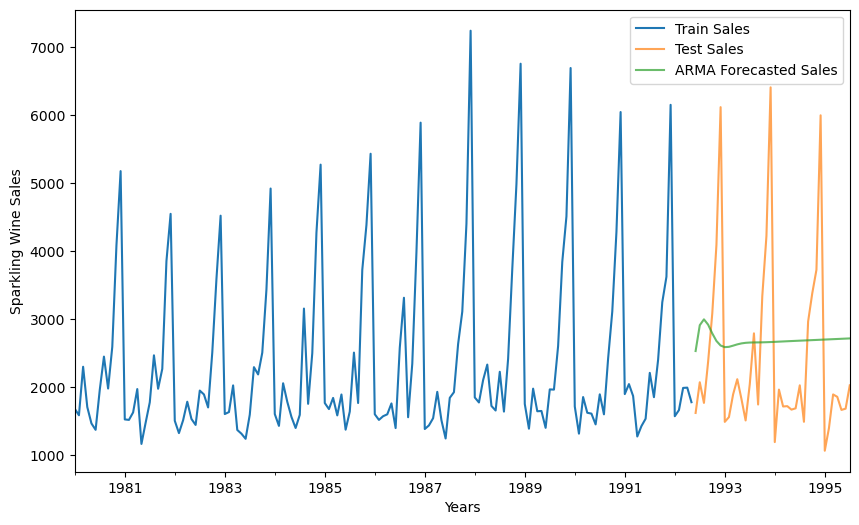

In [185]:
axis = train_2['Sparkling-Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling-Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['Integrated_Forecast_arma'].plot(ax=axis, label='ARMA Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [186]:
resultsDf_ARMA = pd.DataFrame({'Test RMSE': [arma_rmse]}
                           ,index=['ARIMA(2,0,2)'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES, resultsDf_AR, resultsDf_ARMA ])
resultsDf

Test RMSE
RegressionOnTime                    1338.222990
2pointTrailingMovingAverage          805.879970
4pointTrailingMovingAverage         1161.282792
6pointTrailingMovingAverage         1290.624831
9pointTrailingMovingAverage         1375.582351
Alpha=0.06:SES                      1329.402456
Alpha=0.11,Beta=0.21:DES            1326.662208
Alpha=0.05,Beta=0.1, Gamma=0.3:TES   295.006290
ARIMA(3,0,0)                        1611.443526
ARIMA(2,0,2)                        1621.949619

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model 8: ARIMA Model

![ARIMA.JPG](attachment:ARIMA.JPG)

- ARIMA:- **Auto Regressive Integrated Moving Average** is a way of modeling time series data **for forecasting or predicting future data points**. 
- **Improving AR Models by making Time Series stationary through Moving AVerage Forecasts** 


- ARIMA models consist of 3 components:-
	- **AR model: <font color='blue'>The data is modeled based on past observations.</font>**
	- **Integrated component: <font color='blue'>Whether the data needs to be differenced/transformed.</font>**
	- **MA model: <font color='blue'>Previous forecast errors are incorporated into the model.</font>**

#### <u>ARIMA Model building to estimate best <font color='blue'>'p' , 'd' , 'q' </font> paramters ( Lowest AIC Approach )</u>

In [187]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [188]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:2525.3094177429457
ARIMA(1, 0, 2) - AIC:2524.476432702575
ARIMA(1, 0, 3) - AIC:2526.673723382528
ARIMA(1, 1, 1) - AIC:2556.1126128322726
ARIMA(1, 1, 2) - AIC:2519.9162501740693
ARIMA(1, 1, 3) - AIC:2550.9359320987132
ARIMA(2, 0, 1) - AIC:2523.321444956178
ARIMA(2, 0, 2) - AIC:2507.0229766558396
ARIMA(2, 0, 3) - AIC:2522.5923544053576
ARIMA(2, 1, 1) - AIC:2549.5316875519743
ARIMA(2, 1, 2) - AIC:2516.6990897923797
ARIMA(2, 1, 3) - AIC:2556.023065878306
ARIMA(3, 0, 1) - AIC:2528.8021055542295
ARIMA(3, 0, 2) - AIC:2522.161672586528
ARIMA(3, 0, 3) - AIC:2519.2935867780097
ARIMA(3, 1, 1) - AIC:2546.600731573518
ARIMA(3, 1, 2) - AIC:2542.4400106636504
ARIMA(3, 1, 3) - AIC:2525.1470340484357


In [189]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
7   (2, 0, 2)  2507.022977
10  (2, 1, 2)  2516.699090
14  (3, 0, 3)  2519.293587
4   (1, 1, 2)  2519.916250
13  (3, 0, 2)  2522.161673

#### <u>Building ARIMA model with best parameters p,d,q</u>

In [190]:
best_model_ARIMA = ARIMA(train_sales_ts,order = (2,0,2))
best_results_ARIMA = best_model_ARIMA.fit()

In [191]:
print(best_results_ARIMA.summary().tables[0])
print(best_results_ARIMA.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  148
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1247.511
Date:                Sun, 17 Mar 2024   AIC                           2507.023
Time:                        23:37:18   BIC                           2525.006
Sample:                    02-01-1980   HQIC                          2514.330
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7693      2.627      1.054      0.292      -2.380       7.919
ar.L1          1.1511      0.097     11.923      0.000       0.962       1.340
ar.L2         -0.4681      0.114     -4.091      0.0

In [192]:
pred_dynamic_ARIMA = best_results_ARIMA.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [193]:
pred99_ARIMA = best_results_ARIMA.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [194]:
# Extract the predicted and true values of our time series
sales_ts_forecasted_diff_ARIMA = pred_dynamic_ARIMA.predicted_mean
testCopy1['sales_forecasted_diff_ARIMA'] = pred99_ARIMA.predicted_mean

In [195]:
# Compute the root mean square error
arima_mse = ((testCopy1['Differenced'] - testCopy1['sales_forecasted_diff_ARIMA']) ** 2).mean()
arima_rmse = np.sqrt(arma_mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(arima_rmse, 3)))

The Root Mean Squared Error of our forecasts is 1621.95


In [196]:
# To "integrate" the forecasts made on differenced data back to the original scale, 
# we need to perform a cumulative sum of the forecasted differences, 
# starting from the last actual value of the non-differenced series.

# Step 1: Retrieve the last actual value of the original series
last_actual_value = sparkling_sales_df['Sparkling-Wine-Sales'].iloc[-len(test_2)-1]

# Step 2: Cumulatively sum the forecasted differences and add to the last actual value
# Reverse the differencing
integrated_forecast_arima = last_actual_value + testCopy1['sales_forecasted_diff_ARIMA'].cumsum()

# Add the integrated forecast to your test DataFrame for comparison
testCopy1['Integrated_Forecast_arima'] = integrated_forecast_arima

print(testCopy1[['Sparkling-Wine-Sales', 'Integrated_Forecast_arima']])

            Sparkling-Wine-Sales  Integrated_Forecast_arima
1992-06-01                  1625                2534.960157
1992-07-01                  2076                2914.694560
1992-08-01                  1773                3000.707757
1992-09-01                  2377                2922.848371
1992-10-01                  3088                2793.839848
1992-11-01                  4096                2682.659254
1992-12-01                  6119                2615.942738
1993-01-01                  1494                2592.064345
1993-02-01                  1564                2596.684443
1993-03-01                  1898                2614.057602
1993-04-01                  2121                2632.771239
1993-05-01                  1831                2647.058402
1993-06-01                  1515                2655.622740
1993-07-01                  2048                2659.671437
1993-08-01                  2795                2661.200893
1993-09-01                  1749        

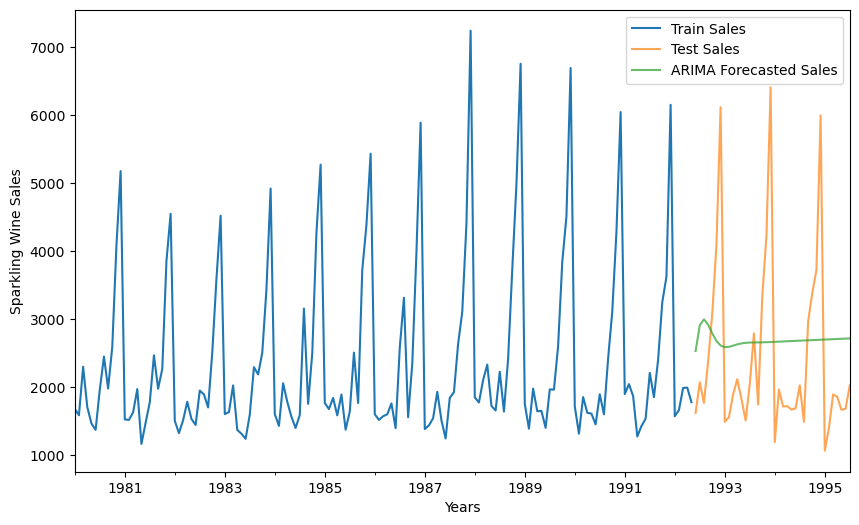

In [197]:
axis = train_2['Sparkling-Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling-Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['Integrated_Forecast_arima'].plot(ax=axis, label='ARIMA Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [198]:
resultsDf_ARIMA = pd.DataFrame({'Test RMSE': [arima_rmse]}
                           ,index=['ARIMA(2,0,2)'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES, resultsDf_AR, resultsDf_ARMA, resultsDf_ARIMA ])
resultsDf

Test RMSE
RegressionOnTime                    1338.222990
2pointTrailingMovingAverage          805.879970
4pointTrailingMovingAverage         1161.282792
6pointTrailingMovingAverage         1290.624831
9pointTrailingMovingAverage         1375.582351
Alpha=0.06:SES                      1329.402456
Alpha=0.11,Beta=0.21:DES            1326.662208
Alpha=0.05,Beta=0.1, Gamma=0.3:TES   295.006290
ARIMA(3,0,0)                        1611.443526
ARIMA(2,0,2)                        1621.949619
ARIMA(2,0,2)                        1621.949619

 **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Model 9: SARIMA Model 

- **The ARIMA models can be extended/improved to handle seasonal components of a data series.**



- The seasonal autoregressive moving average model is given by
    -                   <b>SARIMA (p, d, q)(P, D, Q)F </b>
    
    

- The above model consists of:
	- <font color='blue'>Autoregressive and moving average components (p, q)</font>
	- <font color='blue'>Seasonal autoregressive and moving average components (P, Q) </font>
	- <font color='blue'>The ordinary and seasonal difference components of order ‘d’ and ‘D’ </font>
	- <font color='blue'>Seasonal frequency ‘F’</font>
    

- The value for the parameters (p,d,q) and (P, D, Q) can be decided by comparing different values for each and taking **the lowest   AIC value** for the model build.


- **The value for F can be consolidated by ACF plot**








#### <u>Finding Seasonality = 12 from ACF/PACF plots </u> 

In [199]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

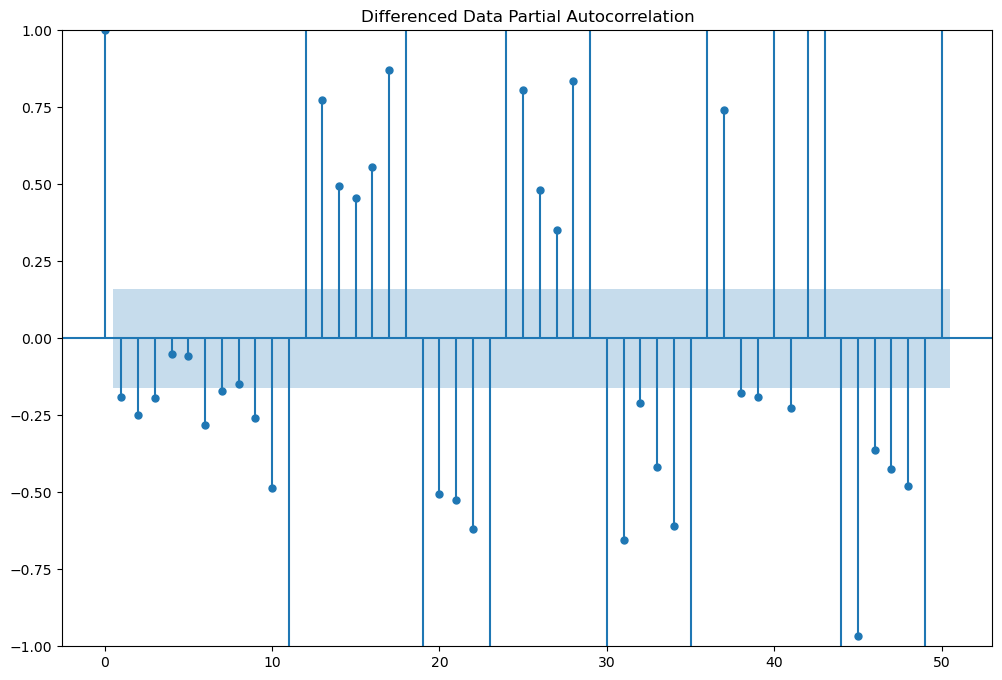

In [200]:
plot_pacf(train['Sparkling-Wine-Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

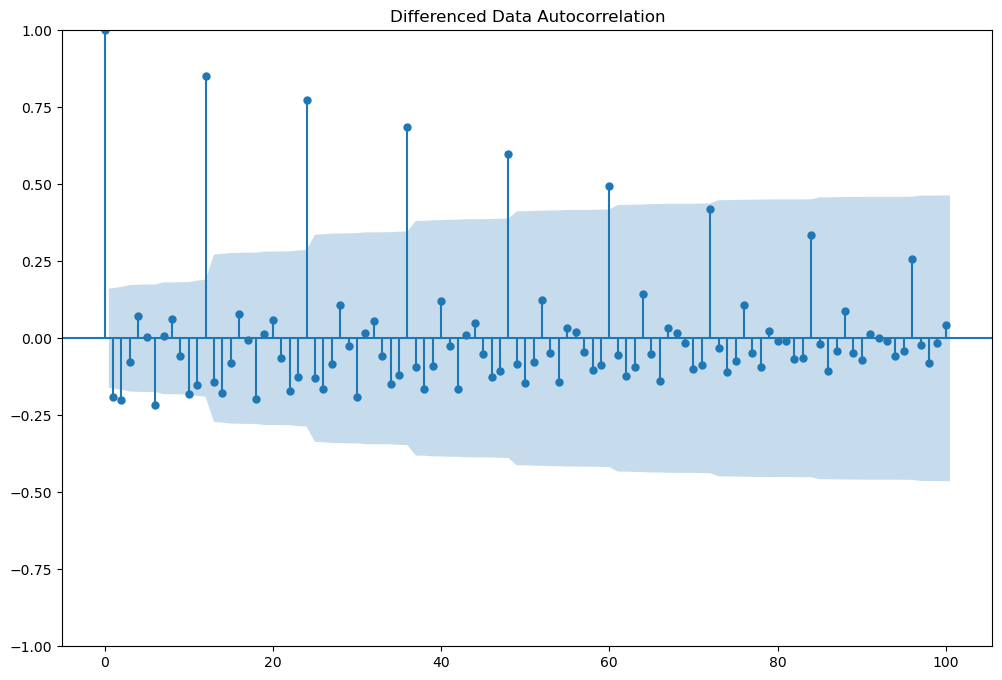

In [201]:
plot_acf(train['Sparkling-Wine-Sales'].diff().dropna(),lags=100,title='Differenced Data Autocorrelation')
plt.show()

In [202]:
# Assuming you have differenced your data if needed and stored in train_sales_ts
# Now, you'll analyze the PACF plot to determine 'p'

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Based on the PACF plot, choose a value for p (say p = 3)

# Fit AR model with chosen p
manual_sarima_model = sm.tsa.statespace.SARIMAX(train_sales_ts, order=(3, 1, 2), seasonal_order=(3, 1, 2, 12), enforce_stationarity=True).fit()

# Look at the AIC and other statistics
print(manual_sarima_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04687D+00    |proj g|=  3.75762D-01


 This problem is unconstrained.



At iterate    5    f=  6.91098D+00    |proj g|=  1.14148D-02

At iterate   10    f=  6.90624D+00    |proj g|=  1.85357D-03

At iterate   15    f=  6.90616D+00    |proj g|=  1.38230D-03

At iterate   20    f=  6.90613D+00    |proj g|=  9.26595D-04

At iterate   25    f=  6.90586D+00    |proj g|=  7.16677D-03

At iterate   30    f=  6.89539D+00    |proj g|=  7.61467D-02

At iterate   35    f=  6.88162D+00    |proj g|=  7.78419D-03

At iterate   40    f=  6.87936D+00    |proj g|=  3.88423D-02

At iterate   45    f=  6.87338D+00    |proj g|=  6.46449D-03

At iterate   50    f=  6.87325D+00    |proj g|=  1.81292D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [203]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming best_results_AR is the trained model on the training dataset
# And that test_2 is the test dataset with the actual 'Differenced' values
# Also, it's assumed that 'Differenced' column contains the actual test values after differencing

# Generate predictions for the test set
predictions_SARIMA = manual_sarima_model.get_forecast(steps=len(test_2))
predicted_mean_SARIMA = predictions_SARIMA.predicted_mean

# RMSE calculation
rmse_SARIMA = sqrt(mean_squared_error(test_2['Differenced'], predicted_mean_SARIMA))
rmse_SARIMA

456.7917099637456

#### <u>SARIMA Model building to estimate best parameters </u>

In [204]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [205]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [206]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41644D+00    |proj g|=  2.28934D-01

At iterate    5    f=  7.39975D+00    |proj g|=  3.20150D-02

At iterate   10    f=  7.39763D+00    |proj g|=  6.12655D-04

At iterate   15    f=  7.39757D+00    |proj g|=  3.40836D-03

At iterate   20    f=  7.36845D+00    |proj g|=  3.84016D-02

At iterate   25    f=  7.32537D+00    |proj g|=  9.62514D-02

At iterate   30    f=  6.96659D+00    |proj g|=  4.73068D-01


 This problem is unconstrained.



At iterate   35    f=  6.69170D+00    |proj g|=  1.85844D-01

At iterate   40    f=  6.69013D+00    |proj g|=  3.23446D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     62      1     0     0   5.018D-05   6.690D+00
  F =   6.6901204345763006     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1990.275648634585
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.75922D+00    |proj g|=  2.33787D-01

At iterate    5

 This problem is unconstrained.


At iterate   20    f=  6.73185D+00    |proj g|=  4.06546D-02

At iterate   25    f=  6.66734D+00    |proj g|=  5.70196D-01

At iterate   30    f=  6.53005D+00    |proj g|=  1.59045D-01

At iterate   35    f=  6.32094D+00    |proj g|=  1.09731D-01

At iterate   40    f=  6.30215D+00    |proj g|=  6.57531D-02

At iterate   45    f=  6.29859D+00    |proj g|=  5.28342D-02

At iterate   50    f=  6.29320D+00    |proj g|=  5.31673D-02

At iterate   55    f=  6.27954D+00    |proj g|=  4.19931D-02

At iterate   60    f=  6.27102D+00    |proj g|=  2.66991D-02

At iterate   65    f=  6.26378D+00    |proj g|=  4.68817D-02

At iterate   70    f=  6.25826D+00    |proj g|=  1.09259D-01

At iterate   75    f=  6.25586D+00    |proj g|=  3.22881D-02

At iterate   80    f=  6.25381D+00    |proj g|=  3.87380D-02

At iterate   85    f=  6.25224D+00    |proj g|=  1.66096D-02

At iterate   90    f=  6.25111D+00    |proj g|=  1.18727D-02

At iterate   95    f=  6.25047D+00    |proj g|=  1.83616D-02

At itera

 This problem is unconstrained.



At iterate    5    f=  6.08144D+00    |proj g|=  2.28203D-02

At iterate   10    f=  6.07824D+00    |proj g|=  4.95216D-04

At iterate   15    f=  6.07802D+00    |proj g|=  2.93523D-03

At iterate   20    f=  6.03015D+00    |proj g|=  6.08120D-02

At iterate   25    f=  5.98048D+00    |proj g|=  4.95396D-02

At iterate   30    f=  5.72010D+00    |proj g|=  1.24501D-01

At iterate   35    f=  5.68965D+00    |proj g|=  4.45161D-02

At iterate   40    f=  5.66716D+00    |proj g|=  4.94906D-01

At iterate   45    f=  5.57031D+00    |proj g|=  1.71685D-01

At iterate   50    f=  5.53773D+00    |proj g|=  1.88801D-01

At iterate   55    f=  5.53425D+00    |proj g|=  6.75191D-03

At iterate   60    f=  5.53221D+00    |proj g|=  1.41351D-02

At iterate   65    f=  5.53210D+00    |proj g|=  5.48489D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  6.12846D+00    |proj g|=  5.02964D-04

At iterate   15    f=  6.12821D+00    |proj g|=  1.52470D-02

At iterate   20    f=  6.11403D+00    |proj g|=  8.82021D-02

At iterate   25    f=  6.10646D+00    |proj g|=  2.32477D-02

At iterate   30    f=  6.10607D+00    |proj g|=  1.61688D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     37      1     0     0   9.875D-06   6.106D+00
  F =   6.1060724662171051     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:1817.3974500002632
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  5.53696D+00    |proj g|=  4.08967D-04

At iterate   15    f=  5.53695D+00    |proj g|=  8.54998D-03

At iterate   20    f=  5.53502D+00    |proj g|=  6.47474D-02

At iterate   25    f=  5.52173D+00    |proj g|=  1.72171D-02

At iterate   30    f=  5.52160D+00    |proj g|=  3.40576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     33      1     0     0   1.237D-04   5.522D+00
  F =   5.5216005309651504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:1646.3937571656845
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.


  ys=-2.421E+01  -gs= 6.450E-01 BFGS update SKIPPED

At iterate    5    f=  1.33620D+01    |proj g|=  1.54536D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     94      2     1     0   1.545D+04   1.336D+01
  F =   13.362026681332143     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:3969.1598976743144
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80689D+00    |proj g|=  2.01067D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  6.79256D+00    |proj g|=  2.54389D-02

At iterate   10    f=  6.79156D+00    |proj g|=  5.59693D-04

At iterate   15    f=  6.79106D+00    |proj g|=  1.13923D-02

At iterate   20    f=  6.77335D+00    |proj g|=  6.71681D-02

At iterate   25    f=  6.57729D+00    |proj g|=  6.03790D-01

At iterate   30    f=  6.20457D+00    |proj g|=  3.83635D-01

At iterate   35    f=  6.16154D+00    |proj g|=  9.13371D-02

At iterate   40    f=  6.16118D+00    |proj g|=  3.89803D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     62      1     0     0   4.732D-04   6.161D+00
  F =   6.16118486140

 This problem is unconstrained.



At iterate    5    f=  6.74060D+00    |proj g|=  2.32936D-02

At iterate   10    f=  6.73577D+00    |proj g|=  5.56154D-04

At iterate   15    f=  6.73566D+00    |proj g|=  4.51875D-03

At iterate   20    f=  6.73316D+00    |proj g|=  2.94991D-02

At iterate   25    f=  6.58264D+00    |proj g|=  1.66026D-01

At iterate   30    f=  6.30763D+00    |proj g|=  7.53149D-01

At iterate   35    f=  6.19413D+00    |proj g|=  1.58890D-01

At iterate   40    f=  6.12976D+00    |proj g|=  8.06447D-02

At iterate   45    f=  6.10715D+00    |proj g|=  1.88203D-02

At iterate   50    f=  6.10700D+00    |proj g|=  1.86054D-02

At iterate   55    f=  6.10626D+00    |proj g|=  1.23291D-02

At iterate   60    f=  6.10623D+00    |proj g|=  3.81913D-03

At iterate   65    f=  6.10622D+00    |proj g|=  2.27723D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  6.07601D+00    |proj g|=  1.44705D-03

At iterate   15    f=  6.07586D+00    |proj g|=  7.23739D-03

At iterate   20    f=  6.05738D+00    |proj g|=  8.90148D-02

At iterate   25    f=  5.65593D+00    |proj g|=  6.40932D-01

At iterate   30    f=  5.55654D+00    |proj g|=  2.22271D-01

At iterate   35    f=  5.54216D+00    |proj g|=  1.16875D-01

At iterate   40    f=  5.53894D+00    |proj g|=  4.44936D-02

At iterate   45    f=  5.53380D+00    |proj g|=  2.33450D-02

At iterate   50    f=  5.53194D+00    |proj g|=  8.52327D-03

At iterate   55    f=  5.53129D+00    |proj g|=  2.04600D-03

At iterate   60    f=  5.53115D+00    |proj g|=  1.38139D-02

At iterate   65    f=  5.53000D+00    |proj g|=  1.31280D-02

At iterate   70    f=  5.52980D+00    |proj g|=  1.96146D-03

At iterate   75    f=  5.52944D+00    |proj g|=  1.24925D-02

At iterate   80    f=  5.52893D+00    |proj g|=  1.18449D-02

At iterate   85    f=  5.52866D+00    |proj g|=  4.26624D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.58989D+00    |proj g|=  6.30701D-03

At iterate   10    f=  5.58820D+00    |proj g|=  1.31062D-03

At iterate   15    f=  5.58819D+00    |proj g|=  2.76726D-03

At iterate   20    f=  5.58587D+00    |proj g|=  3.60343D-02

At iterate   25    f=  5.57333D+00    |proj g|=  5.49789D-03

At iterate   30    f=  5.57327D+00    |proj g|=  3.30535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     34      1     0     0   2.185D-06   5.573D+00
  F =   5.5732735759512488     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:1661.6889784815

 This problem is unconstrained.



At iterate    5    f=  5.53717D+00    |proj g|=  3.84843D-03

At iterate   10    f=  5.53693D+00    |proj g|=  4.59098D-03

At iterate   15    f=  5.53688D+00    |proj g|=  1.00754D-03

At iterate   20    f=  5.53642D+00    |proj g|=  1.96646D-02

At iterate   25    f=  5.52522D+00    |proj g|=  6.11572D-02

At iterate   30    f=  5.52174D+00    |proj g|=  4.96306D-03

At iterate   35    f=  5.52120D+00    |proj g|=  4.04993D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     43      1     0     0   1.894D-05   5.521D+00
  F =   5.5211886625683411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-2.422E+01  -gs= 6.450E-01 BFGS update SKIPPED

At iterate    5    f=  1.34215D+01    |proj g|=  1.54180D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     94      2     1     0   1.542D+04   1.342D+01
  F =   13.421492394764940     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:3988.761748850422
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14467D+00    |proj g|=  1.86135D-01

At iterate    5    f=  6.13142D+00    |proj g|=  2.24139D-02

At iterate   10    f=  6.13054D+00    |proj g|=  5.02906D-04

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  6.13144D+00    |proj g|=  1.13782D-02

At iterate   10    f=  6.13044D+00    |proj g|=  9.45128D-04

At iterate   15    f=  6.13042D+00    |proj g|=  1.32829D-03

At iterate   20    f=  6.13010D+00    |proj g|=  2.68712D-03

At iterate   25    f=  6.10254D+00    |proj g|=  2.98078D-02

At iterate   30    f=  6.08683D+00    |proj g|=  1.97022D-02

At iterate   35    f=  6.00274D+00    |proj g|=  9.51743D-02

At iterate   40    f=  5.83552D+00    |proj g|=  1.05783D-01

At iterate   45    f=  5.76351D+00    |proj g|=  3.48754D-02

At iterate   50    f=  5.74646D+00    |proj g|=  3.91980D-01

At iterate   55    f=  5.63739D+00    |proj g|=  3.25764D-01

At iterate   60    f=  5.59436D+00    |proj g|=  1.46936D-02

At iterate   65    f=  5.59104D+00    |proj g|=  1.38078D-01

At iterate   70    f=  5.58441D+00    |proj g|=  2.04481D-02

At iterate   75    f=  5.58227D+00    |proj g|=  3.80525D-02

At iterate   80    f=  5.58119D+00    |proj g|=  8.96090D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  6.08023D+00    |proj g|=  2.48386D-02

At iterate   10    f=  6.07573D+00    |proj g|=  9.58520D-03

At iterate   15    f=  6.07533D+00    |proj g|=  7.71959D-04

At iterate   20    f=  6.07528D+00    |proj g|=  1.61041D-03

At iterate   25    f=  6.07524D+00    |proj g|=  3.36806D-03

At iterate   30    f=  6.07298D+00    |proj g|=  2.44019D-02

At iterate   35    f=  5.99737D+00    |proj g|=  1.50133D-01

At iterate   40    f=  5.62934D+00    |proj g|=  5.97521D-01

At iterate   45    f=  5.54377D+00    |proj g|=  1.64035D-01

At iterate   50    f=  5.53069D+00    |proj g|=  4.92374D-02

At iterate   55    f=  5.53008D+00    |proj g|=  5.72298D-03

At iterate   60    f=  5.52889D+00    |proj g|=  3.04772D-02

At iterate   65    f=  5.52231D+00    |proj g|=  6.35867D-02

At iterate   70    f=  5.51597D+00    |proj g|=  3.60078D-02

At iterate   75    f=  5.51430D+00    |proj g|=  5.05387D-03

At iterate   80    f=  5.51416D+00    |proj g|=  2.91698D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02343D+00    |proj g|=  2.00902D-01

At iterate    5    f=  4.99552D+00    |proj g|=  8.39912D-04

At iterate   10    f=  4.99551D+00    |proj g|=  1.28912D-03

At iterate   15    f=  4.99531D+00    |proj g|=  3.64733D-02

At iterate   20    f=  4.99226D+00    |proj g|=  1.21952D-02

At iterate   25    f=  4.98781D+00    |proj g|=  1.04108D-01

At iterate   30    f=  4.98620D+00    |proj g|=  6.83960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.99628D+00    |proj g|=  9.62324D-03

At iterate   10    f=  4.99521D+00    |proj g|=  5.03726D-03

At iterate   15    f=  4.99506D+00    |proj g|=  1.12942D-02

At iterate   20    f=  4.99500D+00    |proj g|=  3.13310D-04

At iterate   25    f=  4.99494D+00    |proj g|=  5.80501D-03

At iterate   30    f=  4.99152D+00    |proj g|=  5.02424D-02

At iterate   35    f=  4.98623D+00    |proj g|=  1.24821D-02

At iterate   40    f=  4.98533D+00    |proj g|=  4.66572D-03

At iterate   45    f=  4.98531D+00    |proj g|=  1.30655D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     51   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57850D+01    |proj g|=  1.40775D-03
  ys=-2.419E+01  -gs= 6.450E-01 BFGS update SKIPPED

At iterate    5    f=  1.35454D+01    |proj g|=  1.56071D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     94      2     1     0   1.561D+04   1.355D+01
  F =   13.545359002477090     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:4027.4262647332184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35452D+00    |proj g|=  4.64869D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  7.34834D+00    |proj g|=  1.53663D-03

At iterate   10    f=  7.34774D+00    |proj g|=  5.61673D-03

At iterate   15    f=  7.34757D+00    |proj g|=  1.80371D-03

At iterate   20    f=  7.33949D+00    |proj g|=  7.38680D-02

At iterate   25    f=  7.13581D+00    |proj g|=  3.83993D+00

At iterate   30    f=  6.70100D+00    |proj g|=  3.98110D-01

At iterate   35    f=  6.63679D+00    |proj g|=  5.27321D-02

At iterate   40    f=  6.62583D+00    |proj g|=  9.68339D-02

At iterate   45    f=  6.62529D+00    |proj g|=  1.03905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     69   

 This problem is unconstrained.



At iterate   15    f=  6.68715D+00    |proj g|=  1.55416D-03

At iterate   20    f=  6.68711D+00    |proj g|=  3.90035D-03

At iterate   25    f=  6.67811D+00    |proj g|=  3.29207D-02

At iterate   30    f=  6.44639D+00    |proj g|=  5.71689D-01

At iterate   35    f=  6.09963D+00    |proj g|=  1.70611D-01

At iterate   40    f=  6.05916D+00    |proj g|=  2.56607D-01

At iterate   45    f=  6.04945D+00    |proj g|=  2.17404D-01

At iterate   50    f=  6.04788D+00    |proj g|=  1.96891D-02

At iterate   55    f=  6.04786D+00    |proj g|=  9.57670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     58     78   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21844D+00    |proj g|=  2.39458D-01

At iterate    5    f=  6.02932D+00    |proj g|=  1.86477D-02

At iterate   10    f=  6.02629D+00    |proj g|=  4.11533D-03

At iterate   15    f=  6.02576D+00    |proj g|=  4.20022D-03

At iterate   20    f=  6.02567D+00    |proj g|=  1.88864D-03

At iterate   25    f=  6.02313D+00    |proj g|=  2.22101D-02

At iterate   30    f=  5.99406D+00    |proj g|=  6.01326D-02

At iterate   35    f=  5.95548D+00    |proj g|=  6.15853D-02

At iterate   40    f=  5.63788D+00    |proj g|=  5.22565D-01

At iterate   45    f=  5.48547D+00    |proj g|=  8.32779D-01

At iterate   50    f=  5.46263D+00    |proj g|=  3.79780D-02

At iterate   55    f=  5.46171D+00    |proj g|=  3.97779D-02

At iterate   60    f=  5.46159D+00    |proj g|=  3.46856D-03

At iterate   65    f=  5.4

 This problem is unconstrained.



At iterate   10    f=  6.06121D+00    |proj g|=  3.72425D-04

At iterate   15    f=  6.06120D+00    |proj g|=  9.23616D-04

At iterate   20    f=  6.06114D+00    |proj g|=  1.03650D-02

At iterate   25    f=  6.05651D+00    |proj g|=  6.55222D-02

At iterate   30    f=  6.05155D+00    |proj g|=  3.43509D-03

At iterate   35    f=  6.05153D+00    |proj g|=  1.27523D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     40      1     0     0   5.769D-06   6.052D+00
  F =   6.0515349350862229     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:1803.2543407855

 This problem is unconstrained.



At iterate    5    f=  5.46870D+00    |proj g|=  7.74543D-03

At iterate   10    f=  5.46757D+00    |proj g|=  1.31302D-03

At iterate   15    f=  5.46754D+00    |proj g|=  3.10921D-04

At iterate   20    f=  5.46753D+00    |proj g|=  2.67975D-03

At iterate   25    f=  5.46648D+00    |proj g|=  3.29411D-02

At iterate   30    f=  5.46119D+00    |proj g|=  1.22699D-02

At iterate   35    f=  5.46025D+00    |proj g|=  1.25951D-02

At iterate   40    f=  5.46011D+00    |proj g|=  1.21940D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     43      1     0     0   1.219D-05   5.460D+00
  F =   5.46010535106

 This problem is unconstrained.


  ys=-1.745E+01  -gs= 6.325E-01 BFGS update SKIPPED
  ys=-5.743E+01  -gs= 6.481E-01 BFGS update SKIPPED

At iterate    5    f=  1.16186D+01    |proj g|=  2.11691D+05
  ys=-2.119E+00  -gs= 4.914E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     94      4     3     0   2.117D+05   1.162D+01
  F =   11.618565079419595     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 2)x(1, 1, 3, 12) - AIC:3455.0952635082
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80192D+00    |proj g|=  2.58941D-02

At iterate    5    f=  6.79671D+00    |proj g|=  3.55530D-03

At iterate   10    f=  6.79580D+00    |proj g|=  4.52525D-03

At iterate   15  

 This problem is unconstrained.



At iterate   15    f=  6.68484D+00    |proj g|=  1.07839D-02

At iterate   20    f=  6.68473D+00    |proj g|=  1.45527D-03

At iterate   25    f=  6.68460D+00    |proj g|=  3.75835D-03

At iterate   30    f=  6.68254D+00    |proj g|=  1.43864D-02

At iterate   35    f=  6.66426D+00    |proj g|=  1.09970D-01

At iterate   40    f=  6.56683D+00    |proj g|=  1.13446D-01

At iterate   45    f=  6.33373D+00    |proj g|=  6.33888D-01

At iterate   50    f=  6.10947D+00    |proj g|=  2.42648D-01

At iterate   55    f=  6.06298D+00    |proj g|=  2.63108D-01

At iterate   60    f=  6.05155D+00    |proj g|=  6.04365D-02

At iterate   65    f=  6.04453D+00    |proj g|=  1.94140D-02

At iterate   70    f=  6.04422D+00    |proj g|=  2.46658D-02

At iterate   75    f=  6.04360D+00    |proj g|=  6.58579D-03

At iterate   80    f=  6.04358D+00    |proj g|=  8.55937D-04

At iterate   85    f=  6.04357D+00    |proj g|=  1.92414D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  6.02487D+00    |proj g|=  3.55959D-03

At iterate   10    f=  6.02401D+00    |proj g|=  9.95956D-03

At iterate   15    f=  6.02376D+00    |proj g|=  5.49129D-03

At iterate   20    f=  6.02365D+00    |proj g|=  5.35590D-04

At iterate   25    f=  6.02310D+00    |proj g|=  1.42597D-02

At iterate   30    f=  5.98521D+00    |proj g|=  1.21286D-01

At iterate   35    f=  5.74887D+00    |proj g|=  1.18113D+00

At iterate   40    f=  5.57172D+00    |proj g|=  4.23993D-01

At iterate   45    f=  5.52262D+00    |proj g|=  1.21526D-01

At iterate   50    f=  5.50447D+00    |proj g|=  1.44656D-01

At iterate   55    f=  5.50241D+00    |proj g|=  3.68354D-02

At iterate   60    f=  5.50070D+00    |proj g|=  9.71731D-02

At iterate   65    f=  5.47634D+00    |proj g|=  7.75890D-02

At iterate   70    f=  5.47027D+00    |proj g|=  2.56961D-02

At iterate   75    f=  5.46880D+00    |proj g|=  3.02215D-02

At iterate   80    f=  5.46459D+00    |proj g|=  1.98098D-02

At iter

 This problem is unconstrained.


At iterate    5    f=  5.56997D+00    |proj g|=  2.00680D-02

At iterate   10    f=  5.56861D+00    |proj g|=  2.07463D-03

At iterate   15    f=  5.56853D+00    |proj g|=  9.45781D-04

At iterate   20    f=  5.56851D+00    |proj g|=  3.15398D-03

At iterate   25    f=  5.56676D+00    |proj g|=  2.81909D-02

At iterate   30    f=  5.56217D+00    |proj g|=  2.33995D-02

At iterate   35    f=  5.56121D+00    |proj g|=  2.02231D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     44      1     0     0   1.385D-06   5.561D+00
  F =   5.5612018477982961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

 This problem is unconstrained.



At iterate    5    f=  5.46872D+00    |proj g|=  9.44496D-03

At iterate   10    f=  5.46756D+00    |proj g|=  1.32420D-03

At iterate   15    f=  5.46753D+00    |proj g|=  7.75130D-04

At iterate   20    f=  5.46751D+00    |proj g|=  3.00927D-03

At iterate   25    f=  5.46737D+00    |proj g|=  5.21525D-03

At iterate   30    f=  5.46486D+00    |proj g|=  1.13078D-02

At iterate   35    f=  5.46073D+00    |proj g|=  2.77616D-02

At iterate   40    f=  5.46003D+00    |proj g|=  3.52143D-03

At iterate   45    f=  5.45968D+00    |proj g|=  2.90913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53583D+01    |proj g|=  1.48086D-03
  ys=-1.745E+01  -gs= 6.325E-01 BFGS update SKIPPED
  ys=-5.744E+01  -gs= 6.481E-01 BFGS update SKIPPED

At iterate    5    f=  1.16686D+01    |proj g|=  2.12590D+05
  ys=-2.137E+00  -gs= 4.915E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     94      4     3     0   2.126D+05   1.167D+01
  F =   11.668578766129272     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 2)x(2, 1, 3, 12) - AIC:3471.8993147742644
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13993D+00    |proj g|=  2.37656D-02


 This problem is unconstrained.



At iterate    5    f=  6.13503D+00    |proj g|=  2.97057D-03

At iterate   10    f=  6.13418D+00    |proj g|=  8.00923D-03

At iterate   15    f=  6.13390D+00    |proj g|=  5.01897D-04

At iterate   20    f=  6.13386D+00    |proj g|=  1.25042D-03

At iterate   25    f=  6.13371D+00    |proj g|=  1.52271D-03

At iterate   30    f=  6.13053D+00    |proj g|=  5.60835D-02

At iterate   35    f=  6.11558D+00    |proj g|=  3.95068D-02

At iterate   40    f=  6.09449D+00    |proj g|=  4.76303D-02

At iterate   45    f=  5.86963D+00    |proj g|=  9.26885D-02

At iterate   50    f=  5.68746D+00    |proj g|=  1.35182D+00

At iterate   55    f=  5.58561D+00    |proj g|=  2.44508D-01

At iterate   60    f=  5.57145D+00    |proj g|=  7.87152D-02

At iterate   65    f=  5.57104D+00    |proj g|=  4.62714D-03

At iterate   70    f=  5.57083D+00    |proj g|=  1.85199D-02

At iterate   75    f=  5.57029D+00    |proj g|=  6.95728D-02

At iterate   80    f=  5.56881D+00    |proj g|=  1.64016D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.13723D+00    |proj g|=  3.70596D-02

At iterate   10    f=  6.13479D+00    |proj g|=  8.54437D-03

At iterate   15    f=  6.13438D+00    |proj g|=  6.98756D-03

At iterate   20    f=  6.13386D+00    |proj g|=  5.34112D-04

At iterate   25    f=  6.13377D+00    |proj g|=  8.35976D-04

At iterate   30    f=  6.13247D+00    |proj g|=  1.14179D-02

At iterate   35    f=  6.10225D+00    |proj g|=  5.90205D-02

At iterate   40    f=  6.05707D+00    |proj g|=  6.25852D-02

At iterate   45    f=  5.85107D+00    |proj g|=  3.43579D-01

At iterate   50    f=  5.64083D+00    |proj g|=  5.10573D-01

At iterate   55    f=  5.62261D+00    |proj g|=  7.80242D-02

At iterate   60    f=  5.59379D+00    |proj g|=  1.48996D-01

At iterate   65    f=  5.57933D+00    |proj g|=  8.37504D-02

At iterate   70    f=  5.57790D+00    |proj g|=  3.27101D-03

At iterate   75    f=  5.57778D+00    |proj g|=  5.86757D-03

At iterate   80    f=  5.57661D+00    |proj g|=  7.28843D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.02541D+00    |proj g|=  1.12062D-02

At iterate   10    f=  6.02398D+00    |proj g|=  2.38414D-03

At iterate   15    f=  6.02323D+00    |proj g|=  6.59603D-03

At iterate   20    f=  6.02304D+00    |proj g|=  1.08178D-03

At iterate   25    f=  6.02296D+00    |proj g|=  2.14747D-03

At iterate   30    f=  6.02261D+00    |proj g|=  3.92711D-03

At iterate   35    f=  5.99997D+00    |proj g|=  4.53537D-02

At iterate   40    f=  5.94749D+00    |proj g|=  9.50742D-02

At iterate   45    f=  5.73620D+00    |proj g|=  2.86898D-01

At iterate   50    f=  5.56083D+00    |proj g|=  2.32076D+00

At iterate   55    f=  5.51018D+00    |proj g|=  2.29566D-01

At iterate   60    f=  5.50438D+00    |proj g|=  1.31882D-01

At iterate   65    f=  5.50317D+00    |proj g|=  6.95933D-02

At iterate   70    f=  5.50253D+00    |proj g|=  9.84689D-03

At iterate   75    f=  5.50155D+00    |proj g|=  1.07575D-01

At iterate   80    f=  5.49667D+00    |proj g|=  1.09290D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  4.98070D+00    |proj g|=  4.20357D-03

At iterate   10    f=  4.98034D+00    |proj g|=  8.71997D-04

At iterate   15    f=  4.98034D+00    |proj g|=  1.08473D-03

At iterate   20    f=  4.97998D+00    |proj g|=  1.60019D-02

At iterate   25    f=  4.97873D+00    |proj g|=  1.01305D-02

At iterate   30    f=  4.97690D+00    |proj g|=  7.98298D-03

At iterate   35    f=  4.97676D+00    |proj g|=  2.83163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     45      1     0     0   5.023D-05   4.977D+00
  F =   4.9767613707204337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.98127D+00    |proj g|=  1.39872D-02

At iterate   10    f=  4.97941D+00    |proj g|=  2.13405D-03

At iterate   15    f=  4.97922D+00    |proj g|=  2.39146D-03

At iterate   20    f=  4.97917D+00    |proj g|=  4.91873D-04

At iterate   25    f=  4.97916D+00    |proj g|=  7.66408D-04

At iterate   30    f=  4.97881D+00    |proj g|=  8.79395D-03

At iterate   35    f=  4.97535D+00    |proj g|=  5.76401D-03

At iterate   40    f=  4.97523D+00    |proj g|=  1.73398D-03

At iterate   45    f=  4.97522D+00    |proj g|=  5.41418D-04

At iterate   50    f=  4.97522D+00    |proj g|=  2.99003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


  ys=-1.745E+01  -gs= 6.325E-01 BFGS update SKIPPED
  ys=-5.744E+01  -gs= 6.481E-01 BFGS update SKIPPED

At iterate    5    f=  1.17924D+01    |proj g|=  2.12568D+05
  ys=-2.136E+00  -gs= 4.915E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     94      4     3     0   2.126D+05   1.179D+01
  F =   11.792440063672641     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 0, 2)x(3, 1, 3, 12) - AIC:3510.562258847102
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25610D+00    |proj g|=  4.42870D-02

At iterate    5    f=  7.24926D+00    |proj g|=  5.85070D-03

At iterate   10    f=  7.24893D+00    |proj g|=  2.09378D-03

At iterate   15    f=  7.24871D+00    |proj g|=  2.28508D-03

At iterate   20    f=  7.24791D+00    |proj g|=  7.81845D-03

At iterate   25    f=  7.19867D+00    |proj g|=  6.60425D-02


 This problem is unconstrained.



At iterate   30    f=  6.92320D+00    |proj g|=  5.60620D-01

At iterate   35    f=  6.60061D+00    |proj g|=  3.03198D-01

At iterate   40    f=  6.58395D+00    |proj g|=  3.70752D-02

At iterate   45    f=  6.58366D+00    |proj g|=  1.46651D-02

At iterate   50    f=  6.57947D+00    |proj g|=  3.12072D-02

At iterate   55    f=  6.57867D+00    |proj g|=  1.03747D-02

At iterate   60    f=  6.57854D+00    |proj g|=  1.95344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     61     86      1     0     0   5.144D-05   6.579D+00
  F =   6.5785368580304091     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate   10    f=  6.59297D+00    |proj g|=  1.23353D-03

At iterate   15    f=  6.59277D+00    |proj g|=  7.50246D-03

At iterate   20    f=  6.59270D+00    |proj g|=  6.92752D-04

At iterate   25    f=  6.58903D+00    |proj g|=  2.08403D-02

At iterate   30    f=  6.46898D+00    |proj g|=  1.24325D-01
  ys=-5.775E-02  -gs= 2.151E-01 BFGS update SKIPPED

At iterate   35    f=  6.09640D+00    |proj g|=  9.34430D-01

At iterate   40    f=  6.07353D+00    |proj g|=  2.39645D-01

At iterate   45    f=  6.04370D+00    |proj g|=  2.90099D-01

At iterate   50    f=  6.03744D+00    |proj g|=  7.10947D-02

At iterate   55    f=  6.01114D+00    |proj g|=  1.25034D-01

At iterate   60    f=  5.99894D+00    |proj g|=  4.34755D-02

At iterate   65    f=  5.99691D+00    |proj g|=  6.30218D-03

At iterate   70    f=  5.99684D+00    |proj g|=  1.90313D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored du

 This problem is unconstrained.



At iterate    5    f=  5.93915D+00    |proj g|=  1.39972D-02

At iterate   10    f=  5.93600D+00    |proj g|=  8.27763D-04

At iterate   15    f=  5.93595D+00    |proj g|=  1.23405D-03

At iterate   20    f=  5.93583D+00    |proj g|=  6.36749D-04

At iterate   25    f=  5.93414D+00    |proj g|=  1.91103D-02

At iterate   30    f=  5.84754D+00    |proj g|=  2.47328D-01

At iterate   35    f=  5.58174D+00    |proj g|=  2.37321D-01

At iterate   40    f=  5.50945D+00    |proj g|=  1.03060D+00

At iterate   45    f=  5.47730D+00    |proj g|=  2.22554D-01

At iterate   50    f=  5.43638D+00    |proj g|=  2.06409D-01

At iterate   55    f=  5.43093D+00    |proj g|=  1.20537D-01

At iterate   60    f=  5.42269D+00    |proj g|=  4.68814D-02

At iterate   65    f=  5.42230D+00    |proj g|=  5.63051D-03

At iterate   70    f=  5.42153D+00    |proj g|=  7.07262D-02

At iterate   75    f=  5.42112D+00    |proj g|=  2.09129D-02

At iterate   80    f=  5.42075D+00    |proj g|=  6.02612D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  6.00622D+00    |proj g|=  1.37097D-02

At iterate   20    f=  6.00414D+00    |proj g|=  1.17060D-02

At iterate   25    f=  6.00359D+00    |proj g|=  2.90054D-04

At iterate   30    f=  6.00358D+00    |proj g|=  3.69263D-03

At iterate   35    f=  6.00315D+00    |proj g|=  2.20398D-02

At iterate   40    f=  6.00128D+00    |proj g|=  2.46338D-02

At iterate   45    f=  5.99782D+00    |proj g|=  1.32278D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     56      1     0     0   5.656D-06   5.998D+00
  F =   5.9978134115104611     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.42153D+00    |proj g|=  5.61390D-02

At iterate   10    f=  5.41508D+00    |proj g|=  1.66351D-02

At iterate   15    f=  5.41463D+00    |proj g|=  6.92246D-03

At iterate   20    f=  5.41440D+00    |proj g|=  4.09097D-04

At iterate   25    f=  5.41440D+00    |proj g|=  5.44016D-04

At iterate   30    f=  5.41425D+00    |proj g|=  9.01455D-03

At iterate   35    f=  5.41171D+00    |proj g|=  1.27302D-02

At iterate   40    f=  5.41155D+00    |proj g|=  3.36058D-03

At iterate   45    f=  5.41153D+00    |proj g|=  8.60735D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     52   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50139D+01    |proj g|=  1.52363D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     53      2     0     0   1.740D+06   8.642D+00
  F =   8.6418270339975614     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 0, 3)x(1, 1, 3, 12) - AIC:2575.980802063278
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76207D+00    |proj g|=  2.59643D-02

At iterate    5    f=  6.75580D+00    |proj g|=  3.13516D-03

At iterate   10    f=  6.75546D+00    |proj g|=  3.33048D-03


 This problem is unconstrained.



At iterate   15    f=  6.75535D+00    |proj g|=  1.56192D-03

At iterate   20    f=  6.75491D+00    |proj g|=  7.25862D-03

At iterate   25    f=  6.71403D+00    |proj g|=  8.38628D-02

At iterate   30    f=  6.47527D+00    |proj g|=  1.84264D+00

At iterate   35    f=  6.24594D+00    |proj g|=  2.41626D-01

At iterate   40    f=  6.15598D+00    |proj g|=  5.51051D-02

At iterate   45    f=  6.15032D+00    |proj g|=  2.46791D-02

At iterate   50    f=  6.14983D+00    |proj g|=  1.15239D-03

At iterate   55    f=  6.14983D+00    |proj g|=  4.41842D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     55     72   

 This problem is unconstrained.



At iterate    5    f=  6.59141D+00    |proj g|=  9.07322D-03

At iterate   10    f=  6.59078D+00    |proj g|=  8.06031D-04

At iterate   15    f=  6.59067D+00    |proj g|=  4.08633D-03

At iterate   20    f=  6.59049D+00    |proj g|=  5.68872D-04

At iterate   25    f=  6.59041D+00    |proj g|=  1.71963D-03

At iterate   30    f=  6.58984D+00    |proj g|=  6.86529D-03

At iterate   35    f=  6.53233D+00    |proj g|=  8.98908D-02

At iterate   40    f=  6.21989D+00    |proj g|=  3.73607D-01

At iterate   45    f=  6.03552D+00    |proj g|=  1.10871D-01

At iterate   50    f=  6.02625D+00    |proj g|=  3.44267D-02

At iterate   55    f=  6.02011D+00    |proj g|=  2.25451D-02

At iterate   60    f=  6.01580D+00    |proj g|=  3.09404D-02

At iterate   65    f=  6.00808D+00    |proj g|=  5.74662D-02

At iterate   70    f=  5.99728D+00    |proj g|=  6.81639D-02

At iterate   75    f=  5.99567D+00    |proj g|=  8.60059D-03

At iterate   80    f=  5.99440D+00    |proj g|=  9.90081D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.93510D+00    |proj g|=  7.25746D-03

At iterate   10    f=  5.93399D+00    |proj g|=  2.97177D-03

At iterate   15    f=  5.93376D+00    |proj g|=  2.19215D-03

At iterate   20    f=  5.93369D+00    |proj g|=  2.60433D-03

At iterate   25    f=  5.93363D+00    |proj g|=  5.08627D-04

At iterate   30    f=  5.93321D+00    |proj g|=  7.22286D-03

At iterate   35    f=  5.89889D+00    |proj g|=  4.78149D-02

At iterate   40    f=  5.84811D+00    |proj g|=  2.27494D-01

At iterate   45    f=  5.51422D+00    |proj g|=  2.46055D-01

At iterate   50    f=  5.42738D+00    |proj g|=  8.59527D-02

At iterate   55    f=  5.41265D+00    |proj g|=  3.44849D-02

At iterate   60    f=  5.41051D+00    |proj g|=  8.88292D-03

At iterate   65    f=  5.41033D+00    |proj g|=  2.14179D-02

At iterate   70    f=  5.41012D+00    |proj g|=  2.86741D-03

At iterate   75    f=  5.40997D+00    |proj g|=  6.82663D-03

At iterate   80    f=  5.40984D+00    |proj g|=  2.27417D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  5.56556D+00    |proj g|=  4.18740D-02

At iterate   15    f=  5.56388D+00    |proj g|=  5.30693D-03

At iterate   20    f=  5.56367D+00    |proj g|=  2.13585D-04

At iterate   25    f=  5.56366D+00    |proj g|=  1.68767D-03

At iterate   30    f=  5.56334D+00    |proj g|=  2.36540D-02

At iterate   35    f=  5.56078D+00    |proj g|=  5.21067D-03

At iterate   40    f=  5.56068D+00    |proj g|=  5.05900D-03

At iterate   45    f=  5.56063D+00    |proj g|=  2.87887D-04

At iterate   50    f=  5.56063D+00    |proj g|=  3.49389D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     51     56   

 This problem is unconstrained.



At iterate    5    f=  5.42125D+00    |proj g|=  5.34387D-02

At iterate   10    f=  5.41499D+00    |proj g|=  1.77850D-02

At iterate   15    f=  5.41456D+00    |proj g|=  6.32728D-03

At iterate   20    f=  5.41426D+00    |proj g|=  8.78966D-04

At iterate   25    f=  5.41426D+00    |proj g|=  4.86343D-04

At iterate   30    f=  5.41425D+00    |proj g|=  8.56570D-04

At iterate   35    f=  5.41414D+00    |proj g|=  1.20867D-02

At iterate   40    f=  5.41369D+00    |proj g|=  1.01751D-02

At iterate   45    f=  5.41244D+00    |proj g|=  1.01870D-02

At iterate   50    f=  5.41132D+00    |proj g|=  9.65561D-03

At iterate   55    f=  5.41110D+00    |proj g|=  1.18400D-04

At iterate   60    f=  5.41110D+00    |proj g|=  2.21166D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


  ys=-4.797E-10  -gs= 4.512E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     86      2     1     0   1.269D+06   1.158D+01
  F =   11.584124395751537     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 0, 3)x(2, 1, 3, 12) - AIC:3448.9008211424552
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10405D+00    |proj g|=  2.33310D-02


 This problem is unconstrained.



At iterate    5    f=  6.09832D+00    |proj g|=  4.22035D-03

At iterate   10    f=  6.09807D+00    |proj g|=  1.65111D-03

At iterate   15    f=  6.09783D+00    |proj g|=  8.87346D-04

At iterate   20    f=  6.09771D+00    |proj g|=  2.29966D-03

At iterate   25    f=  6.09653D+00    |proj g|=  8.15826D-03

At iterate   30    f=  6.02541D+00    |proj g|=  5.54696D-02

At iterate   35    f=  5.88267D+00    |proj g|=  5.62626D-01

At iterate   40    f=  5.69935D+00    |proj g|=  5.04135D-01

At iterate   45    f=  5.59349D+00    |proj g|=  2.83479D-01

At iterate   50    f=  5.57526D+00    |proj g|=  4.98273D-02

At iterate   55    f=  5.57272D+00    |proj g|=  7.79703D-02

At iterate   60    f=  5.57196D+00    |proj g|=  3.37310D-02

At iterate   65    f=  5.57129D+00    |proj g|=  1.18064D-02

At iterate   70    f=  5.56975D+00    |proj g|=  9.35195D-02

At iterate   75    f=  5.56880D+00    |proj g|=  2.42184D-02

At iterate   80    f=  5.56822D+00    |proj g|=  2.61258D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.10131D+00    |proj g|=  3.71313D-02

At iterate   10    f=  6.09823D+00    |proj g|=  7.41144D-03

At iterate   15    f=  6.09800D+00    |proj g|=  2.20124D-03

At iterate   20    f=  6.09790D+00    |proj g|=  3.97729D-03

At iterate   25    f=  6.09779D+00    |proj g|=  9.36746D-04

At iterate   30    f=  6.09775D+00    |proj g|=  1.60876D-03

At iterate   35    f=  6.09768D+00    |proj g|=  1.72003D-03

At iterate   40    f=  6.09735D+00    |proj g|=  8.80736D-03

At iterate   45    f=  6.08701D+00    |proj g|=  1.78378D-02

At iterate   50    f=  6.05471D+00    |proj g|=  6.42208D-02

At iterate   55    f=  6.01237D+00    |proj g|=  1.51236D-01

At iterate   60    f=  5.95807D+00    |proj g|=  8.56192D-01

At iterate   65    f=  5.94952D+00    |proj g|=  3.47672D-01

At iterate   70    f=  5.94565D+00    |proj g|=  4.92049D-01

At iterate   75    f=  5.93839D+00    |proj g|=  3.09661D-01

At iterate   80    f=  5.90624D+00    |proj g|=  1.94221D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.93576D+00    |proj g|=  1.00966D-02

At iterate   10    f=  5.93337D+00    |proj g|=  3.66088D-03

At iterate   15    f=  5.93312D+00    |proj g|=  6.89842D-03

At iterate   20    f=  5.93303D+00    |proj g|=  1.21949D-03

At iterate   25    f=  5.93296D+00    |proj g|=  5.26621D-04

At iterate   30    f=  5.93287D+00    |proj g|=  9.12049D-04

At iterate   35    f=  5.93077D+00    |proj g|=  1.36888D-02

At iterate   40    f=  5.91389D+00    |proj g|=  7.60995D-02

At iterate   45    f=  5.85914D+00    |proj g|=  1.05357D-01

At iterate   50    f=  5.81667D+00    |proj g|=  1.20597D-01

At iterate   55    f=  5.78292D+00    |proj g|=  4.70983D-01

At iterate   60    f=  5.72519D+00    |proj g|=  1.77143D+00

At iterate   65    f=  5.62187D+00    |proj g|=  4.32356D-01

At iterate   70    f=  5.50709D+00    |proj g|=  4.43069D-01

At iterate   75    f=  5.42668D+00    |proj g|=  4.90846D-02

At iterate   80    f=  5.42378D+00    |proj g|=  5.61093D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  4.98006D+00    |proj g|=  9.49245D-02

At iterate   10    f=  4.97771D+00    |proj g|=  5.02144D-03

At iterate   15    f=  4.97731D+00    |proj g|=  5.26857D-03

At iterate   20    f=  4.97728D+00    |proj g|=  1.45431D-04

At iterate   25    f=  4.97728D+00    |proj g|=  1.45399D-04

At iterate   30    f=  4.97728D+00    |proj g|=  1.32915D-03

At iterate   35    f=  4.97710D+00    |proj g|=  1.04999D-02

At iterate   40    f=  4.97641D+00    |proj g|=  1.24818D-02

At iterate   45    f=  4.97576D+00    |proj g|=  6.36778D-03

At iterate   50    f=  4.97566D+00    |proj g|=  3.14644D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.98039D+00    |proj g|=  6.27916D-02

At iterate   10    f=  4.97790D+00    |proj g|=  3.37570D-02

At iterate   15    f=  4.97584D+00    |proj g|=  2.69037D-03

At iterate   20    f=  4.97582D+00    |proj g|=  6.32775D-04

At iterate   25    f=  4.97581D+00    |proj g|=  2.48719D-03

At iterate   30    f=  4.97580D+00    |proj g|=  1.49922D-04

At iterate   35    f=  4.97580D+00    |proj g|=  1.13588D-03

At iterate   40    f=  4.97575D+00    |proj g|=  5.86888D-03

At iterate   45    f=  4.97467D+00    |proj g|=  2.20245D-02

At iterate   50    f=  4.97412D+00    |proj g|=  1.31010D-03

At iterate   55    f=  4.97410D+00    |proj g|=  4.59322D-04

At iterate   60    f=  4.97410D+00    |proj g|=  5.73126D-04

At iterate   65    f=  4.97410D+00    |proj g|=  6.75607D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      2      9      1     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 3)x(3, 1, 3, 12) - AIC:22.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52356D+00    |proj g|=  7.44190D-02

At iterate    5    f=  7.51264D+00    |proj g|=  2.67269D-03

At iterate   10    f=  7.51258D+00    |proj g|=  1.69000D-03

At iterate   15    f=  7.511

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.83880D+00    |proj g|=  2.27424D-02

At iterate   10    f=  6.83774D+00    |proj g|=  4.54698D-04

At iterate   15    f=  6.83767D+00    |proj g|=  1.13171D-02

At iterate   20    f=  6.83031D+00    |proj g|=  9.53398D-02

At iterate   25    f=  6.69837D+00    |proj g|=  3.35916D-01

At iterate   30    f=  6.27140D+00    |proj g|=  1.36406D+00

At iterate   35    f=  6.22326D+00    |proj g|=  1.37430D-01

At iterate   40    f=  6.21593D+00    |proj g|=  9.72927D-03

At iterate   45    f=  6.21591D+00    |proj g|=  6.04742D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     62   

 This problem is unconstrained.



At iterate   10    f=  6.16196D+00    |proj g|=  6.12692D-03

At iterate   15    f=  6.16167D+00    |proj g|=  4.07161D-04

At iterate   20    f=  6.16156D+00    |proj g|=  7.26541D-03

At iterate   25    f=  6.15081D+00    |proj g|=  3.97510D-02

At iterate   30    f=  6.11924D+00    |proj g|=  7.99272D-02

At iterate   35    f=  6.08838D+00    |proj g|=  2.67495D-01

At iterate   40    f=  5.69944D+00    |proj g|=  4.70435D-01

At iterate   45    f=  5.63286D+00    |proj g|=  1.75642D-01

At iterate   50    f=  5.61894D+00    |proj g|=  8.41481D-02

At iterate   55    f=  5.61729D+00    |proj g|=  3.90191D-03

At iterate   60    f=  5.61702D+00    |proj g|=  1.13686D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  6.24271D+00    |proj g|=  8.35931D-02

At iterate   25    f=  6.20382D+00    |proj g|=  8.08613D-02

At iterate   30    f=  6.20266D+00    |proj g|=  1.31811D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38      1     0     0   3.066D-06   6.203D+00
  F =   6.2026601525771330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1845.9874051628312
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  5.63594D+00    |proj g|=  3.38778D-02

At iterate   10    f=  5.63579D+00    |proj g|=  3.76128D-03

At iterate   15    f=  5.63569D+00    |proj g|=  4.41527D-04

At iterate   20    f=  5.63567D+00    |proj g|=  8.91081D-03

At iterate   25    f=  5.63249D+00    |proj g|=  1.80838D-01

At iterate   30    f=  5.60320D+00    |proj g|=  2.75038D-02

At iterate   35    f=  5.60245D+00    |proj g|=  6.64384D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     41      1     0     0   4.975D-05   5.602D+00
  F =   5.6024457127996863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-3.414E+01  -gs= 6.433E-01 BFGS update SKIPPED
  ys=-4.637E+01  -gs= 6.464E-01 BFGS update SKIPPED
  ys=-6.952E+01  -gs= 6.493E-01 BFGS update SKIPPED
  ys=-1.798E+02  -gs= 6.523E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     67      5     4     0   1.274D+05   1.141D+01
  F =   11.411329535978126     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:3391.7535426495256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  6.89280D+00    |proj g|=  3.46882D-03

At iterate   10    f=  6.89260D+00    |proj g|=  1.09440D-03

At iterate   15    f=  6.89248D+00    |proj g|=  1.15899D-02

At iterate   20    f=  6.87757D+00    |proj g|=  6.43870D-02

At iterate   25    f=  6.72571D+00    |proj g|=  3.05452D-01

At iterate   30    f=  6.37670D+00    |proj g|=  5.80093D-02

At iterate   35    f=  6.32038D+00    |proj g|=  3.18233D-01

At iterate   40    f=  6.26446D+00    |proj g|=  1.49847D-02

At iterate   45    f=  6.26439D+00    |proj g|=  3.59688D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     62   

 This problem is unconstrained.



At iterate   10    f=  6.83532D+00    |proj g|=  4.56756D-04

At iterate   15    f=  6.83527D+00    |proj g|=  1.48903D-03

At iterate   20    f=  6.83506D+00    |proj g|=  3.11453D-03

At iterate   25    f=  6.82483D+00    |proj g|=  1.62668D-01

At iterate   30    f=  6.71540D+00    |proj g|=  1.45582D-01

At iterate   35    f=  6.55544D+00    |proj g|=  1.03374D+00

At iterate   40    f=  6.40662D+00    |proj g|=  4.63312D-01

At iterate   45    f=  6.24876D+00    |proj g|=  9.69097D-02

At iterate   50    f=  6.21297D+00    |proj g|=  9.55565D-02

At iterate   55    f=  6.20720D+00    |proj g|=  1.86913D-03

At iterate   60    f=  6.20719D+00    |proj g|=  5.83039D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  6.16049D+00    |proj g|=  1.44003D-02

At iterate   10    f=  6.15953D+00    |proj g|=  1.67685D-03

At iterate   15    f=  6.15939D+00    |proj g|=  7.65553D-04

At iterate   20    f=  6.15937D+00    |proj g|=  8.60539D-04

At iterate   25    f=  6.15773D+00    |proj g|=  1.88111D-02

At iterate   30    f=  6.13417D+00    |proj g|=  8.97004D-02

At iterate   35    f=  5.81715D+00    |proj g|=  4.91954D-01

At iterate   40    f=  5.62200D+00    |proj g|=  7.20698D-02

At iterate   45    f=  5.61465D+00    |proj g|=  3.37931D-02

At iterate   50    f=  5.61220D+00    |proj g|=  9.92618D-03

At iterate   55    f=  5.61217D+00    |proj g|=  2.49696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  5.69488D+00    |proj g|=  1.70372D-02

At iterate   10    f=  5.69472D+00    |proj g|=  1.81413D-02

At iterate   15    f=  5.69331D+00    |proj g|=  3.25058D-02

At iterate   20    f=  5.69309D+00    |proj g|=  4.25303D-04

At iterate   25    f=  5.69306D+00    |proj g|=  2.81886D-03

At iterate   30    f=  5.69034D+00    |proj g|=  5.46519D-02

At iterate   35    f=  5.66474D+00    |proj g|=  1.04289D-02

At iterate   40    f=  5.66314D+00    |proj g|=  2.60285D-02

At iterate   45    f=  5.66301D+00    |proj g|=  8.83469D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     52   

 This problem is unconstrained.



At iterate   10    f=  5.63578D+00    |proj g|=  3.07262D-03

At iterate   15    f=  5.63570D+00    |proj g|=  5.10693D-03

At iterate   20    f=  5.63568D+00    |proj g|=  1.06419D-03

At iterate   25    f=  5.63524D+00    |proj g|=  1.59690D-02

At iterate   30    f=  5.61057D+00    |proj g|=  1.14678D-01

At iterate   35    f=  5.60585D+00    |proj g|=  2.09479D-02

At iterate   40    f=  5.60284D+00    |proj g|=  2.51220D-02

At iterate   45    f=  5.60234D+00    |proj g|=  3.75453D-03

At iterate   50    f=  5.60231D+00    |proj g|=  2.45488D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     51     57   

 This problem is unconstrained.


  ys=-3.414E+01  -gs= 6.433E-01 BFGS update SKIPPED
  ys=-4.637E+01  -gs= 6.464E-01 BFGS update SKIPPED
  ys=-7.031E+01  -gs= 6.494E-01 BFGS update SKIPPED

At iterate    5    f=  1.26729D+01    |proj g|=  3.78208D+04
  ys=-1.471E+00  -gs= 5.220E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     96      5     4     0   1.444D+05   1.100D+01
  F =   10.998164220617582     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3271.4566093028043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22588D+00    |proj g|=  5.61784D-02


 This problem is unconstrained.



At iterate    5    f=  6.21653D+00    |proj g|=  2.72033D-02

At iterate   10    f=  6.21593D+00    |proj g|=  2.14708D-03

At iterate   15    f=  6.21584D+00    |proj g|=  4.12835D-04

At iterate   20    f=  6.21582D+00    |proj g|=  2.25983D-03

At iterate   25    f=  6.21125D+00    |proj g|=  2.59668D-02

At iterate   30    f=  6.09607D+00    |proj g|=  1.44277D-01

At iterate   35    f=  5.74058D+00    |proj g|=  3.09264D-01

At iterate   40    f=  5.68749D+00    |proj g|=  1.40527D-01

At iterate   45    f=  5.68652D+00    |proj g|=  3.87955D-02

At iterate   50    f=  5.67986D+00    |proj g|=  1.14478D-01

At iterate   55    f=  5.67607D+00    |proj g|=  1.80736D-02

At iterate   60    f=  5.67357D+00    |proj g|=  2.18907D-02

At iterate   65    f=  5.67228D+00    |proj g|=  1.02520D-02

At iterate   70    f=  5.67128D+00    |proj g|=  2.89413D-02

At iterate   75    f=  5.67072D+00    |proj g|=  1.96261D-02

At iterate   80    f=  5.67031D+00    |proj g|=  1.78602D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.21792D+00    |proj g|=  1.12681D-02

At iterate   10    f=  6.21603D+00    |proj g|=  3.69940D-03

At iterate   15    f=  6.21582D+00    |proj g|=  4.12842D-04

At iterate   20    f=  6.21573D+00    |proj g|=  2.21032D-03

At iterate   25    f=  6.21503D+00    |proj g|=  8.96541D-03

At iterate   30    f=  6.14147D+00    |proj g|=  1.48900D-01

At iterate   35    f=  5.68857D+00    |proj g|=  1.40123D-01

At iterate   40    f=  5.68133D+00    |proj g|=  2.84816D-02

At iterate   45    f=  5.66996D+00    |proj g|=  8.34948D-02

At iterate   50    f=  5.66903D+00    |proj g|=  4.88534D-03

At iterate   55    f=  5.66897D+00    |proj g|=  3.54395D-03

At iterate   60    f=  5.66896D+00    |proj g|=  1.24253D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  6.15985D+00    |proj g|=  1.06972D-02

At iterate   10    f=  6.15898D+00    |proj g|=  2.45836D-03

At iterate   15    f=  6.15877D+00    |proj g|=  4.68123D-04

At iterate   20    f=  6.15874D+00    |proj g|=  7.72599D-04

At iterate   25    f=  6.15842D+00    |proj g|=  9.77846D-03

At iterate   30    f=  6.13023D+00    |proj g|=  9.63851D-02

At iterate   35    f=  5.79132D+00    |proj g|=  6.15635D-01

At iterate   40    f=  5.62520D+00    |proj g|=  1.51200D-01

At iterate   45    f=  5.61785D+00    |proj g|=  1.97082D-02

At iterate   50    f=  5.61636D+00    |proj g|=  1.56395D-02

At iterate   55    f=  5.61448D+00    |proj g|=  1.09397D-02

At iterate   60    f=  5.61411D+00    |proj g|=  1.60298D-02

At iterate   65    f=  5.61166D+00    |proj g|=  4.16282D-02

At iterate   70    f=  5.61083D+00    |proj g|=  1.48319D-02

At iterate   75    f=  5.61011D+00    |proj g|=  1.50360D-02

At iterate   80    f=  5.60999D+00    |proj g|=  1.69604D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.08258D+00    |proj g|=  2.23023D-03

At iterate   10    f=  5.08256D+00    |proj g|=  1.11840D-03

At iterate   15    f=  5.08254D+00    |proj g|=  1.24757D-03

At iterate   20    f=  5.08253D+00    |proj g|=  2.25141D-03

At iterate   25    f=  5.08234D+00    |proj g|=  1.06769D-02

At iterate   30    f=  5.07433D+00    |proj g|=  6.19011D-02

At iterate   35    f=  5.06628D+00    |proj g|=  3.39746D-02

At iterate   40    f=  5.06174D+00    |proj g|=  1.51575D-03

At iterate   45    f=  5.06173D+00    |proj g|=  6.10755D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     51   

 This problem is unconstrained.



At iterate    5    f=  5.08404D+00    |proj g|=  3.11920D-02

At iterate   10    f=  5.08311D+00    |proj g|=  1.46215D-02

At iterate   15    f=  5.08249D+00    |proj g|=  7.91675D-04

At iterate   20    f=  5.08247D+00    |proj g|=  3.15421D-03

At iterate   25    f=  5.08246D+00    |proj g|=  9.70293D-04

At iterate   30    f=  5.08239D+00    |proj g|=  1.17385D-02

At iterate   35    f=  5.07770D+00    |proj g|=  2.30098D-01

At iterate   40    f=  5.06177D+00    |proj g|=  6.56241D-03

At iterate   45    f=  5.06139D+00    |proj g|=  4.33719D-03

At iterate   50    f=  5.06135D+00    |proj g|=  4.96444D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     49      2     0     0   7.050D+04   1.979D+01
  F =   19.791375322140613     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:5876.247095353621


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46187D+00    |proj g|=  1.81561D-01

At iterate    5    f=  7.45544D+00    |proj g|=  5.06754D-03

At iterate   10    f=  7.45309D+00    |proj g|=  2.64788D-02

At iterate   15    f=  7.44811D+00    |proj g|=  3.32077D-03

At iterate   20    f=  7.44797D+00    |proj g|=  5.10490D-04

At iterate   25    f=  7.44794D+00    |proj g|=  9.06980D-03

At iterate   30    f=  7.44264D+00    |proj g|=  1.18749D-01

At iterate   35    f=  7.39770D+00    |proj g|=  1.08007D+00

At iterate   40    f=  7.12233D+00    |proj g|=  4.94142D-01

At iterate   45    f=  6.79340D+00    |proj g|=  3.70895D-01

At iterate   50    f=  6.76451D+00    |proj g|=  1.69274D-01

At iterate   55    f=  6.67025D+00    |proj g|=  1.49822D+00

At iterate   60    f=  6.61906D+00    |proj g|=  4.68761D-01

At iterate   65    f=  6.6

 This problem is unconstrained.



At iterate   15    f=  6.77385D+00    |proj g|=  9.51858D-04

At iterate   20    f=  6.77384D+00    |proj g|=  4.60875D-04

At iterate   25    f=  6.77371D+00    |proj g|=  4.79261D-03

At iterate   30    f=  6.76526D+00    |proj g|=  2.70316D-02

At iterate   35    f=  6.55784D+00    |proj g|=  1.44723D+00

At iterate   40    f=  6.17009D+00    |proj g|=  4.03877D-01

At iterate   45    f=  6.11842D+00    |proj g|=  7.40583D-02

At iterate   50    f=  6.11236D+00    |proj g|=  4.25774D-01

At iterate   55    f=  6.06943D+00    |proj g|=  1.88172D+00

At iterate   60    f=  6.04736D+00    |proj g|=  2.00474D-01

At iterate   65    f=  6.04521D+00    |proj g|=  1.27943D-01

At iterate   70    f=  6.04516D+00    |proj g|=  1.80431D-02

At iterate   75    f=  6.04508D+00    |proj g|=  3.80275D-02

At iterate   80    f=  6.04507D+00    |proj g|=  2.58733D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  6.15607D+00    |proj g|=  1.01370D-01

At iterate   10    f=  6.10464D+00    |proj g|=  2.78512D-02

At iterate   15    f=  6.10039D+00    |proj g|=  2.69163D-02

At iterate   20    f=  6.09881D+00    |proj g|=  6.67972D-04

At iterate   25    f=  6.09879D+00    |proj g|=  1.13589D-03

At iterate   30    f=  6.09767D+00    |proj g|=  1.65717D-02

At iterate   35    f=  6.05903D+00    |proj g|=  5.59045D-02

At iterate   40    f=  5.92094D+00    |proj g|=  6.74863D-01

At iterate   45    f=  5.56850D+00    |proj g|=  1.71915D-01

At iterate   50    f=  5.48780D+00    |proj g|=  1.95899D-01

At iterate   55    f=  5.47652D+00    |proj g|=  9.81352D-02

At iterate   60    f=  5.46478D+00    |proj g|=  5.92164D-02

At iterate   65    f=  5.46273D+00    |proj g|=  1.19331D-01

At iterate   70    f=  5.46118D+00    |proj g|=  1.13124D-01

At iterate   75    f=  5.45980D+00    |proj g|=  6.61192D-02

At iterate   80    f=  5.45976D+00    |proj g|=  6.97117D-04

       

 This problem is unconstrained.



At iterate   15    f=  6.12245D+00    |proj g|=  7.62843D-02

At iterate   20    f=  6.10074D+00    |proj g|=  1.62960D-01

At iterate   25    f=  6.09598D+00    |proj g|=  8.77537D-02

At iterate   30    f=  6.09595D+00    |proj g|=  1.02899D-03

At iterate   35    f=  6.09594D+00    |proj g|=  1.74651D-02

At iterate   40    f=  6.09456D+00    |proj g|=  1.22543D-01

At iterate   45    f=  6.04998D+00    |proj g|=  1.22577D-01

At iterate   50    f=  6.03084D+00    |proj g|=  7.33946D-01

At iterate   55    f=  6.02755D+00    |proj g|=  1.13321D-01

At iterate   60    f=  6.02654D+00    |proj g|=  9.80615D-03

At iterate   65    f=  6.02653D+00    |proj g|=  4.29530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  5.59872D+00    |proj g|=  2.07953D-02

At iterate   10    f=  5.57114D+00    |proj g|=  1.79546D-01

At iterate   15    f=  5.49955D+00    |proj g|=  4.79214D-01

At iterate   20    f=  5.49601D+00    |proj g|=  6.60098D-03

At iterate   25    f=  5.49598D+00    |proj g|=  7.79630D-02

At iterate   30    f=  5.49565D+00    |proj g|=  1.74905D-01

At iterate   35    f=  5.49477D+00    |proj g|=  8.27987D-02

At iterate   40    f=  5.49475D+00    |proj g|=  7.56596D-03

At iterate   45    f=  5.49474D+00    |proj g|=  9.23970D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     68   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     61      2     0     0   8.048D+05   1.601D+01
  F =   16.008412515217643     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:4754.490104504423
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89779D+00    |proj g|=  1.62178D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  6.89236D+00    |proj g|=  7.78732D-03

At iterate   10    f=  6.89057D+00    |proj g|=  1.81853D-02

At iterate   15    f=  6.88553D+00    |proj g|=  8.60169D-03

At iterate   20    f=  6.88534D+00    |proj g|=  1.87025D-03

At iterate   25    f=  6.88528D+00    |proj g|=  4.81451D-03

At iterate   30    f=  6.88525D+00    |proj g|=  3.04963D-03

At iterate   35    f=  6.88502D+00    |proj g|=  7.55355D-03

At iterate   40    f=  6.87476D+00    |proj g|=  1.07738D-01

At iterate   45    f=  6.83867D+00    |proj g|=  2.85094D-01

At iterate   50    f=  6.78616D+00    |proj g|=  4.58876D-02

At iterate   55    f=  6.56601D+00    |proj g|=  2.22994D-01

At iterate   60    f=  6.37119D+00    |proj g|=  7.40664D-01

At iterate   65    f=  6.31989D+00    |proj g|=  8.15997D-02

At iterate   70    f=  6.30209D+00    |proj g|=  4.08020D-01

At iterate   75    f=  6.28810D+00    |proj g|=  5.39457D-01

At iterate   80    f=  6.18980D+00    |proj g|=  1.62148D+00

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80701D+00    |proj g|=  1.71384D-01

At iterate    5    f=  6.77896D+00    |proj g|=  2.14022D-02

At iterate   10    f=  6.77671D+00    |proj g|=  1.45059D-02

At iterate   15    f=  6.77261D+00    |proj g|=  9.27374D-03

At iterate   20    f=  6.77224D+00    |proj g|=  1.49983D-03

At iterate   25    f=  6.77217D+00    |proj g|=  2.48238D-03

At iterate   30    f=  6.77215D+00    |proj g|=  1.37098D-03

At iterate   35    f=  6.77174D+00    |proj g|=  6.11102D-03

At iterate   40    f=  6.75995D+00    |proj g|=  5.67576D-02

At iterate   45    f=  6.66125D+00    |proj g|=  1.58009D-01

At iterate   50    f=  6.59362D+00    |proj g|=  1.03274D-01

At iterate   55    f=  6.37984D+00    |proj g|=  8.89890D-01

At iterate   60    f=  6.22264D+00    |proj g|=  3.06316D-01

At iterate   65    f=  6.2

 This problem is unconstrained.



At iterate    5    f=  6.10470D+00    |proj g|=  2.02287D-02

At iterate   10    f=  6.10220D+00    |proj g|=  5.17040D-03

At iterate   15    f=  6.09837D+00    |proj g|=  1.09338D-02

At iterate   20    f=  6.09767D+00    |proj g|=  5.33942D-03

At iterate   25    f=  6.09721D+00    |proj g|=  7.70017D-04

At iterate   30    f=  6.09719D+00    |proj g|=  2.85456D-03

At iterate   35    f=  6.09328D+00    |proj g|=  3.49084D-02

At iterate   40    f=  6.05746D+00    |proj g|=  7.80913D-02

At iterate   45    f=  6.03586D+00    |proj g|=  5.93393D-02

At iterate   50    f=  5.95106D+00    |proj g|=  3.32123D-01

At iterate   55    f=  5.69038D+00    |proj g|=  2.09931D-01

At iterate   60    f=  5.64462D+00    |proj g|=  8.06855D-02

At iterate   65    f=  5.61982D+00    |proj g|=  4.86514D-02

At iterate   70    f=  5.57085D+00    |proj g|=  1.72053D-01

At iterate   75    f=  5.49157D+00    |proj g|=  6.15597D-01

At iterate   80    f=  5.46917D+00    |proj g|=  5.27972D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.70837D+00    |proj g|=  4.10483D-02

At iterate   10    f=  5.63769D+00    |proj g|=  2.36186D+00

At iterate   15    f=  5.60651D+00    |proj g|=  7.05946D-02

At iterate   20    f=  5.60009D+00    |proj g|=  1.30373D-02

At iterate   25    f=  5.59989D+00    |proj g|=  4.90068D-02

At iterate   30    f=  5.59989D+00    |proj g|=  5.88883D-04

At iterate   35    f=  5.59989D+00    |proj g|=  2.65021D-03

At iterate   40    f=  5.59988D+00    |proj g|=  1.08209D-02

At iterate   45    f=  5.59972D+00    |proj g|=  1.29445D-01

At iterate   50    f=  5.59565D+00    |proj g|=  6.94007D-02

At iterate   55    f=  5.56057D+00    |proj g|=  1.15220D+00

At iterate   60    f=  5.55248D+00    |proj g|=  3.59769D-01

At iterate   65    f=  5.54926D+00    |proj g|=  4.41890D-02

At iterate   70    f=  5.54825D+00    |proj g|=  1.36179D-01

At iterate   75    f=  5.54694D+00    |proj g|=  2.15938D-01

At iterate   80    f=  5.54662D+00    |proj g|=  1.70413D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.60099D+00    |proj g|=  2.94200D-02

At iterate   10    f=  5.58171D+00    |proj g|=  7.28437D-02

At iterate   15    f=  5.52804D+00    |proj g|=  3.35194D-01

At iterate   20    f=  5.52406D+00    |proj g|=  7.01693D-02

At iterate   25    f=  5.50700D+00    |proj g|=  2.57608D-01

At iterate   30    f=  5.50092D+00    |proj g|=  1.00207D-01

At iterate   35    f=  5.49655D+00    |proj g|=  1.38566D-02

At iterate   40    f=  5.49606D+00    |proj g|=  1.60648D-02

At iterate   45    f=  5.49476D+00    |proj g|=  4.78857D-02

At iterate   50    f=  5.49462D+00    |proj g|=  2.57737D-03

At iterate   55    f=  5.49462D+00    |proj g|=  5.82526D-04

At iterate   60    f=  5.49461D+00    |proj g|=  7.97428D-03

At iterate   65    f=  5.49445D+00    |proj g|=  4.11826D-02

At iterate   70    f=  5.49374D+00    |proj g|=  2.26131D-02

At iterate   75    f=  5.48896D+00    |proj g|=  1.36183D-01

At iterate   80    f=  5.48507D+00    |proj g|=  6.70255D-01

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     73      2     0     0   7.275D+05   1.671D+01
  F =   16.705841157442162     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:4962.92898260288
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22129D+00    |proj g|=  1.50303D-01


 This problem is unconstrained.



At iterate    5    f=  6.21576D+00    |proj g|=  5.40844D-03

At iterate   10    f=  6.21263D+00    |proj g|=  3.83916D-02

At iterate   15    f=  6.21005D+00    |proj g|=  2.01679D-03

At iterate   20    f=  6.20982D+00    |proj g|=  3.25152D-03

At iterate   25    f=  6.20978D+00    |proj g|=  6.80726D-04

At iterate   30    f=  6.20976D+00    |proj g|=  2.19681D-03

At iterate   35    f=  6.20871D+00    |proj g|=  8.64857D-03

At iterate   40    f=  6.20336D+00    |proj g|=  1.69934D-02

At iterate   45    f=  6.17226D+00    |proj g|=  5.43729D-02

At iterate   50    f=  5.78759D+00    |proj g|=  5.86927D-01

At iterate   55    f=  5.61350D+00    |proj g|=  6.71803D-01

At iterate   60    f=  5.56458D+00    |proj g|=  1.95614D-01

At iterate   65    f=  5.56330D+00    |proj g|=  4.89376D-01

At iterate   70    f=  5.56250D+00    |proj g|=  2.20226D-02

At iterate   75    f=  5.56178D+00    |proj g|=  1.19343D-01

At iterate   80    f=  5.56164D+00    |proj g|=  7.20212D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  6.21468D+00    |proj g|=  9.49061D-03

At iterate   15    f=  6.21026D+00    |proj g|=  1.79291D-02

At iterate   20    f=  6.20976D+00    |proj g|=  8.22430D-04

At iterate   25    f=  6.20969D+00    |proj g|=  2.93095D-03

At iterate   30    f=  6.20967D+00    |proj g|=  6.35875D-04

At iterate   35    f=  6.20966D+00    |proj g|=  9.35520D-04

At iterate   40    f=  6.20933D+00    |proj g|=  5.11281D-03

At iterate   45    f=  6.20238D+00    |proj g|=  1.84770D-02

At iterate   50    f=  6.17864D+00    |proj g|=  6.20744D-02

At iterate   55    f=  6.16042D+00    |proj g|=  5.02838D-02

At iterate   60    f=  6.04586D+00    |proj g|=  2.32666D-01

At iterate   65    f=  5.85926D+00    |proj g|=  5.36379D-01

At iterate   70    f=  5.75898D+00    |proj g|=  2.19286D-01

At iterate   75    f=  5.71499D+00    |proj g|=  6.06689D-02

At iterate   80    f=  5.71432D+00    |proj g|=  6.26067D-03

At iterate   85    f=  5.71400D+00    |proj g|=  1.16431D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.10813D+00    |proj g|=  7.70495D-02

At iterate   10    f=  6.10228D+00    |proj g|=  4.18764D-03

At iterate   15    f=  6.10036D+00    |proj g|=  1.93411D-02

At iterate   20    f=  6.09777D+00    |proj g|=  7.60295D-03

At iterate   25    f=  6.09697D+00    |proj g|=  3.20551D-03

At iterate   30    f=  6.09681D+00    |proj g|=  2.06024D-03

At iterate   35    f=  6.09678D+00    |proj g|=  4.20484D-04

At iterate   40    f=  6.09676D+00    |proj g|=  1.76485D-03

At iterate   45    f=  6.09616D+00    |proj g|=  1.36292D-02

At iterate   50    f=  6.09058D+00    |proj g|=  1.00977D-02

At iterate   55    f=  6.08287D+00    |proj g|=  4.47871D-02

At iterate   60    f=  6.05709D+00    |proj g|=  2.54621D-01

At iterate   65    f=  5.97859D+00    |proj g|=  4.36938D-01

At iterate   70    f=  5.60074D+00    |proj g|=  1.12752D+00

At iterate   75    f=  5.47074D+00    |proj g|=  9.89830D-01

At iterate   80    f=  5.45160D+00    |proj g|=  1.10826D-01

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.16004D+00    |proj g|=  1.98205D-01

At iterate    5    f=  5.09524D+00    |proj g|=  3.55182D-02

At iterate   10    f=  5.04850D+00    |proj g|=  3.01872D-01

At iterate   15    f=  5.00737D+00    |proj g|=  2.27927D-01

At iterate   20    f=  5.00113D+00    |proj g|=  5.53357D-01

At iterate   25    f=  4.99895D+00    |proj g|=  3.74640D-03

At iterate   30    f=  4.99894D+00    |proj g|=  3.29465D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     54     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24574D+00    |proj g|=  3.81919D-01

At iterate    5    f=  5.09826D+00    |proj g|=  4.68916D-02

At iterate   10    f=  5.07285D+00    |proj g|=  2.15548D-01

At iterate   15    f=  5.01573D+00    |proj g|=  4.82625D-01

At iterate   20    f=  5.01049D+00    |proj g|=  3.67428D-01

At iterate   25    f=  5.00928D+00    |proj g|=  1.68632D-01

At iterate   30    f=  5.00499D+00    |proj g|=  2.31661D-01

At iterate   35    f=  5.00039D+00    |proj g|=  5.11458D-02

At iterate   40    f=  4.99989D+00    |proj g|=  3.43057D-02

At iterate   45    f=  4.99848D+00    |proj g|=  7.40932D-03

At iterate   50    f=  4.99846D+00    |proj g|=  3.81605D-02

At iterate   55    f=  4.99816D+00    |proj g|=  3.85066D-02

At iterate   60    f=  4.99798D+00    |proj g|=  3.71483D-03

At iterate   65    f=  4.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59780D+01    |proj g|=  5.91624D+05
  ys=-2.642E+00  -gs= 1.782E+02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      3     33      1     1     0   5.681D+05   1.479D+01
  F =   14.789764893606064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:4397.770408507395
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37424D+00    |proj g|=  3.67746D-01

At iterate    5    f=  7.35900D+00    |proj g|=  2.49872D-02

At iterate   10    f=  7.35554D+00    |proj g|=  5.75713D-03

At iterate   15    f=  7.35537D+00    |proj g|=  3.61331D-03

At iterate   20    f=  7.35527D+00    |proj g|=  5.26172D-04

At iterate   25    f=  7.35513D+00    |proj g|=  5.35003D-03


 This problem is unconstrained.



At iterate   30    f=  7.34388D+00    |proj g|=  4.39561D-02

At iterate   35    f=  7.11598D+00    |proj g|=  6.50480D-01

At iterate   40    f=  6.59648D+00    |proj g|=  8.27193D-01

At iterate   45    f=  6.56152D+00    |proj g|=  2.43225D-01

At iterate   50    f=  6.55844D+00    |proj g|=  1.92346D-02

At iterate   55    f=  6.55834D+00    |proj g|=  3.41069D-02

At iterate   60    f=  6.55831D+00    |proj g|=  1.74957D-03

At iterate   65    f=  6.55831D+00    |proj g|=  3.60967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     68     96      1     0     0   1.432D-04   6.558D+00
  F =   6.55830627871

 This problem is unconstrained.



At iterate    5    f=  6.69102D+00    |proj g|=  3.05743D-02

At iterate   10    f=  6.68485D+00    |proj g|=  1.20754D-02

At iterate   15    f=  6.68421D+00    |proj g|=  7.99049D-04

At iterate   20    f=  6.68410D+00    |proj g|=  3.13166D-03

At iterate   25    f=  6.68407D+00    |proj g|=  4.79161D-04

At iterate   30    f=  6.68373D+00    |proj g|=  1.23281D-02

At iterate   35    f=  6.66165D+00    |proj g|=  7.16514D-02

At iterate   40    f=  6.55953D+00    |proj g|=  5.97535D-01

At iterate   45    f=  6.19259D+00    |proj g|=  1.18191D+00

At iterate   50    f=  6.02156D+00    |proj g|=  2.11632D-01

At iterate   55    f=  5.98363D+00    |proj g|=  1.73140D-01

At iterate   60    f=  5.98102D+00    |proj g|=  2.58948D-01

At iterate   65    f=  5.98088D+00    |proj g|=  1.55537D-02

At iterate   70    f=  5.98076D+00    |proj g|=  1.55104D-01

At iterate   75    f=  5.98063D+00    |proj g|=  4.18257D-02

At iterate   80    f=  5.98021D+00    |proj g|=  6.24986D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.10152D+00    |proj g|=  2.72150D-01

At iterate   10    f=  6.02118D+00    |proj g|=  8.37827D-02

At iterate   15    f=  6.01258D+00    |proj g|=  7.66869D-03

At iterate   20    f=  6.01241D+00    |proj g|=  1.98512D-03

At iterate   25    f=  6.01232D+00    |proj g|=  3.72173D-03

At iterate   30    f=  6.01228D+00    |proj g|=  1.04789D-03

At iterate   35    f=  6.01226D+00    |proj g|=  2.06030D-03

At iterate   40    f=  6.01064D+00    |proj g|=  1.12431D-02

At iterate   45    f=  5.96912D+00    |proj g|=  6.98519D-02

At iterate   50    f=  5.94050D+00    |proj g|=  2.11201D-01

At iterate   55    f=  5.92112D+00    |proj g|=  1.61665D-01

At iterate   60    f=  5.83551D+00    |proj g|=  9.64737D-01

At iterate   65    f=  5.82404D+00    |proj g|=  9.96240D-01

At iterate   70    f=  5.81573D+00    |proj g|=  7.43943D-01

At iterate   75    f=  5.81495D+00    |proj g|=  2.16632D-01

At iterate   80    f=  5.80425D+00    |proj g|=  1.59842D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    584    812      2     0     0   5.168D-05   5.415D+00
  F =   5.4152478662300405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:1620.913368404092
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.15387D+00    |proj g|=  4.44141D-01


 This problem is unconstrained.



At iterate    5    f=  6.08243D+00    |proj g|=  4.28706D-01

At iterate   10    f=  6.03901D+00    |proj g|=  3.94561D-01

At iterate   15    f=  6.03777D+00    |proj g|=  5.94290D-02

At iterate   20    f=  6.02720D+00    |proj g|=  4.39519D-02

At iterate   25    f=  6.02564D+00    |proj g|=  4.37927D-02

At iterate   30    f=  6.02560D+00    |proj g|=  1.70921D-02

At iterate   35    f=  6.02553D+00    |proj g|=  1.50623D-03

At iterate   40    f=  6.02553D+00    |proj g|=  2.47079D-03

At iterate   45    f=  6.02553D+00    |proj g|=  7.34073D-03

At iterate   50    f=  6.02549D+00    |proj g|=  3.50425D-03

At iterate   55    f=  6.02545D+00    |proj g|=  1.68306D-02

At iterate   60    f=  6.02156D+00    |proj g|=  2.02521D-01

At iterate   65    f=  5.99957D+00    |proj g|=  9.21080D-02

At iterate   70    f=  5.98042D+00    |proj g|=  3.65288D-01

At iterate   75    f=  5.97104D+00    |proj g|=  1.17015D-01

At iterate   80    f=  5.97038D+00    |proj g|=  3.37181D-02

At iter

 This problem is unconstrained.


 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67331D+00    |proj g|=  5.78377D-01

At iterate    5    f=  5.46631D+00    |proj g|=  1.88067D-01

At iterate   10    f=  5.43076D+00    |proj g|=  2.03393D-02

At iterate   15    f=  5.42779D+00    |proj g|=  4.79748D-02

At iterate   20    f=  5.42599D+00    |proj g|=  9.32075D-03

At iterate   25    f=  5.42596D+00    |proj g|=  2.69179D-03

At iterate   30    f=  5.42589D+00    |proj g|=  5.55146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     38      1     0     0   5.551D-04   5

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1      3      1     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:18.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86873D+00    |proj g|=  3.43499D-01


 This problem is unconstrained.



At iterate    5    f=  6.85620D+00    |proj g|=  1.56219D-02

At iterate   10    f=  6.85164D+00    |proj g|=  2.55004D-03

At iterate   15    f=  6.85127D+00    |proj g|=  8.25028D-04

At iterate   20    f=  6.85121D+00    |proj g|=  4.14451D-03

At iterate   25    f=  6.85117D+00    |proj g|=  1.51244D-03

At iterate   30    f=  6.85107D+00    |proj g|=  3.25177D-03

At iterate   35    f=  6.85066D+00    |proj g|=  1.01981D-02

At iterate   40    f=  6.84601D+00    |proj g|=  4.90678D-02

At iterate   45    f=  6.83923D+00    |proj g|=  1.69517D-02

At iterate   50    f=  6.83852D+00    |proj g|=  2.63728D-02

At iterate   55    f=  6.83566D+00    |proj g|=  4.57995D-02

At iterate   60    f=  6.83070D+00    |proj g|=  6.94614D-02

At iterate   65    f=  6.82895D+00    |proj g|=  6.29484D-02

At iterate   70    f=  6.82285D+00    |proj g|=  3.41045D-02

At iterate   75    f=  6.80014D+00    |proj g|=  1.49173D-01

At iterate   80    f=  6.54626D+00    |proj g|=  6.41788D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  6.68296D+00    |proj g|=  4.28453D-03

At iterate   15    f=  6.68280D+00    |proj g|=  4.06429D-03

At iterate   20    f=  6.68263D+00    |proj g|=  1.15055D-03

At iterate   25    f=  6.68259D+00    |proj g|=  1.47961D-03

At iterate   30    f=  6.68255D+00    |proj g|=  1.72484D-03

At iterate   35    f=  6.68234D+00    |proj g|=  8.34289D-03

At iterate   40    f=  6.67945D+00    |proj g|=  9.18380D-03

At iterate   45    f=  6.65819D+00    |proj g|=  6.22013D-02

At iterate   50    f=  6.62093D+00    |proj g|=  1.43631D-01

At iterate   55    f=  6.59540D+00    |proj g|=  4.31904D-01

At iterate   60    f=  6.58876D+00    |proj g|=  1.02510D+00

At iterate   65    f=  6.58821D+00    |proj g|=  1.49695D-01

At iterate   70    f=  6.58783D+00    |proj g|=  1.66049D-01

At iterate   75    f=  6.58433D+00    |proj g|=  5.06531D-01

At iterate   80    f=  6.56332D+00    |proj g|=  7.18767D-01

At iterate   85    f=  6.53483D+00    |proj g|=  4.95931D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  6.01694D+00    |proj g|=  4.12736D-02

At iterate   10    f=  6.01137D+00    |proj g|=  1.83402D-02

At iterate   15    f=  6.01107D+00    |proj g|=  2.32028D-03

At iterate   20    f=  6.01093D+00    |proj g|=  8.86347D-04

At iterate   25    f=  6.01092D+00    |proj g|=  9.86746D-04

At iterate   30    f=  6.01079D+00    |proj g|=  7.96145D-03

At iterate   35    f=  6.01029D+00    |proj g|=  7.82871D-03

At iterate   40    f=  5.99991D+00    |proj g|=  2.01395D-02

At iterate   45    f=  5.99320D+00    |proj g|=  4.96233D-02

At iterate   50    f=  5.98987D+00    |proj g|=  2.10125D-02

At iterate   55    f=  5.98193D+00    |proj g|=  1.42859D-01

At iterate   60    f=  5.97557D+00    |proj g|=  8.34781D-02

At iterate   65    f=  5.93606D+00    |proj g|=  1.14090D-01

At iterate   70    f=  5.76203D+00    |proj g|=  2.93123D-01

At iterate   75    f=  5.53829D+00    |proj g|=  1.85419D-01

At iterate   80    f=  5.41999D+00    |proj g|=  4.20902D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.62722D+00    |proj g|=  3.18864D-01

At iterate   10    f=  5.58787D+00    |proj g|=  4.63673D-01

At iterate   15    f=  5.58548D+00    |proj g|=  1.12882D-01

At iterate   20    f=  5.58362D+00    |proj g|=  2.89417D-01

At iterate   25    f=  5.58021D+00    |proj g|=  2.02941D-02

At iterate   30    f=  5.57990D+00    |proj g|=  3.61697D-02

At iterate   35    f=  5.57945D+00    |proj g|=  5.01497D-02

At iterate   40    f=  5.57937D+00    |proj g|=  5.75224D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     56      1     0     0   5.752D-04   5.579D+00
  F =   5.57936740873

 This problem is unconstrained.



At iterate    5    f=  5.46680D+00    |proj g|=  2.30989D-01

At iterate   10    f=  5.43585D+00    |proj g|=  9.09132D-02

At iterate   15    f=  5.42861D+00    |proj g|=  8.13418D-02

At iterate   20    f=  5.42707D+00    |proj g|=  3.36406D-02

At iterate   25    f=  5.42583D+00    |proj g|=  3.98175D-02

At iterate   30    f=  5.42575D+00    |proj g|=  5.12161D-03

At iterate   35    f=  5.42573D+00    |proj g|=  6.55430D-03

At iterate   40    f=  5.42572D+00    |proj g|=  7.51075D-03

At iterate   45    f=  5.42571D+00    |proj g|=  4.25434D-03

At iterate   50    f=  5.42569D+00    |proj g|=  3.30993D-03

At iterate   55    f=  5.42565D+00    |proj g|=  1.53766D-03

At iterate   60    f=  5.42565D+00    |proj g|=  1.01692D-03

At iterate   65    f=  5.42565D+00    |proj g|=  1.17608D-03

At iterate   70    f=  5.42564D+00    |proj g|=  2.06748D-03

At iterate   75    f=  5.42564D+00    |proj g|=  7.08523D-04

At iterate   80    f=  5.42564D+00    |proj g|=  1.05639D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36738D+01    |proj g|=  7.87765D-02

At iterate    5    f=  2.36738D+01    |proj g|=  5.57161D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     20      1     0     0   1.231D-02   2.367D+01
  F =   23.673781959331226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:7027.439459962043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N 

 This problem is unconstrained.



At iterate    5    f=  6.18339D+00    |proj g|=  2.41939D-02

At iterate   10    f=  6.17947D+00    |proj g|=  7.06161D-03

At iterate   15    f=  6.17925D+00    |proj g|=  5.66886D-03

At iterate   20    f=  6.17907D+00    |proj g|=  1.34104D-03

At iterate   25    f=  6.17904D+00    |proj g|=  1.14961D-03

At iterate   30    f=  6.17898D+00    |proj g|=  4.37647D-04

At iterate   35    f=  6.17889D+00    |proj g|=  3.88005D-03

At iterate   40    f=  6.17763D+00    |proj g|=  1.15996D-02

At iterate   45    f=  6.14180D+00    |proj g|=  8.37215D-02

At iterate   50    f=  6.09028D+00    |proj g|=  9.25708D-02

At iterate   55    f=  5.97773D+00    |proj g|=  1.16008D+00

At iterate   60    f=  5.79534D+00    |proj g|=  3.24941D-01

At iterate   65    f=  5.72558D+00    |proj g|=  4.91915D-01

At iterate   70    f=  5.70568D+00    |proj g|=  3.53350D-01

At iterate   75    f=  5.58517D+00    |proj g|=  2.79951D-01

At iterate   80    f=  5.55129D+00    |proj g|=  4.02540D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  6.19069D+00    |proj g|=  5.92873D-02

At iterate   10    f=  6.18052D+00    |proj g|=  1.92062D-02

At iterate   15    f=  6.17936D+00    |proj g|=  2.77619D-03

At iterate   20    f=  6.17898D+00    |proj g|=  7.50652D-04

At iterate   25    f=  6.17894D+00    |proj g|=  6.74286D-04

At iterate   30    f=  6.17888D+00    |proj g|=  3.53707D-03

At iterate   35    f=  6.17872D+00    |proj g|=  6.06781D-03

At iterate   40    f=  6.17768D+00    |proj g|=  1.68873D-02

At iterate   45    f=  6.17165D+00    |proj g|=  2.41191D-02

At iterate   50    f=  6.16202D+00    |proj g|=  3.23623D-02

At iterate   55    f=  6.12980D+00    |proj g|=  5.04876D-02

At iterate   60    f=  6.09448D+00    |proj g|=  9.17178D-02

At iterate   65    f=  6.01816D+00    |proj g|=  7.06052D-01

At iterate   70    f=  5.93012D+00    |proj g|=  3.32801D-01

At iterate   75    f=  5.79905D+00    |proj g|=  8.93243D+00

At iterate   80    f=  5.78396D+00    |proj g|=  4.91189D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  6.01945D+00    |proj g|=  2.94031D-02

At iterate   10    f=  6.01154D+00    |proj g|=  7.91032D-03

At iterate   15    f=  6.01087D+00    |proj g|=  1.19244D-03

At iterate   20    f=  6.01065D+00    |proj g|=  3.32418D-03

At iterate   25    f=  6.01060D+00    |proj g|=  2.42461D-03

At iterate   30    f=  6.01054D+00    |proj g|=  1.49247D-03

At iterate   35    f=  6.00995D+00    |proj g|=  2.53959D-03

At iterate   40    f=  6.00670D+00    |proj g|=  2.74031D-02

At iterate   45    f=  5.97696D+00    |proj g|=  1.60583D-01

At iterate   50    f=  5.92337D+00    |proj g|=  6.56672D-02

At iterate   55    f=  5.91467D+00    |proj g|=  4.39125D-02

At iterate   60    f=  5.91095D+00    |proj g|=  1.18605D-01

At iterate   65    f=  5.89691D+00    |proj g|=  4.12610D-02

At iterate   70    f=  5.89645D+00    |proj g|=  2.57853D-01

At iterate   75    f=  5.89523D+00    |proj g|=  2.11826D-01

At iterate   80    f=  5.89497D+00    |proj g|=  1.20355D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08703D+00    |proj g|=  3.46840D-01

At iterate    5    f=  5.01513D+00    |proj g|=  6.29740D-02

At iterate   10    f=  4.98992D+00    |proj g|=  1.31728D-01

At iterate   15    f=  4.98539D+00    |proj g|=  9.25170D-02

At iterate   20    f=  4.98478D+00    |proj g|=  6.76872D-02

At iterate   25    f=  4.98381D+00    |proj g|=  3.03477D-02

At iterate   30    f=  4.98294D+00    |proj g|=  1.07795D-01

At iterate   35    f=  4.98202D+00    |proj g|=  2.85912D-03

At iterate   40    f=  4.98200D+00    |proj g|=  1.30083D-03

At iterate   45    f=  4.98197D+00    |proj g|=  1.68430D-02

At iterate   50    f=  4.98192D+00    |proj g|=  3.51408D-03

At iterate   55    f=  4.98190D+00    |proj g|=  2.31645D-03

At iterate   60    f=  4.98190D+00    |proj g|=  4.71247D-04

At iterate   65    f=  4.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17732D+00    |proj g|=  3.85316D-01

At iterate    5    f=  5.01125D+00    |proj g|=  1.19319D-01

At iterate   10    f=  4.98650D+00    |proj g|=  1.31666D-01

At iterate   15    f=  4.98477D+00    |proj g|=  1.86102D-01

At iterate   20    f=  4.98252D+00    |proj g|=  3.25359D-02

At iterate   25    f=  4.98178D+00    |proj g|=  3.86774D-02

At iterate   30    f=  4.98160D+00    |proj g|=  2.14580D-02

At iterate   35    f=  4.98158D+00    |proj g|=  4.16218D-03

At iterate   40    f=  4.98155D+00    |proj g|=  1.69201D-02

At iterate   45    f=  4.98155D+00    |proj g|=  4.35453D-03

At iterate   50    f=  4.98154D+00    |proj g|=  7.65713D-03

At iterate   55    f=  4.98151D+00    |proj g|=  1.10432D-02

At iterate   60    f=  4.98149D+00    |proj g|=  5.65064D-03

At iterate   65    f=  4.9

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      2     54      2     0     0   7.186D+04   1.972D+01
  F =   19.717074579156961     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:5858.25407543046
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40135D+00    |proj g|=  4.38958D-02

At iterate    5    f=  7.39319D+00    |proj g|=  2.37978D-03

At iterate   10    f=  7.39305D+00    |proj g|=  2.66065D-03

At iterate   15    f=  7.38923D+00    |proj g|=  2.58937D-02

At iterate   20    f=  7.37734D+00    |proj g|=  2.82372D-02

At iterate   25    f=  7.19569D+00    |proj g|=  3.11539D-01

At iterate   30    f=  6.99715D+00    |proj g|=  1.86505D+00


 This problem is unconstrained.



At iterate   35    f=  6.70967D+00    |proj g|=  1.19222D-01

At iterate   40    f=  6.68566D+00    |proj g|=  6.97987D-02

At iterate   45    f=  6.68474D+00    |proj g|=  1.30585D-02

At iterate   50    f=  6.68466D+00    |proj g|=  6.30635D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   6.306D-05   6.685D+00
  F =   6.6846562493142132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:1990.658249797007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  6.73383D+00    |proj g|=  5.56609D-04

At iterate   15    f=  6.73368D+00    |proj g|=  4.44009D-03

At iterate   20    f=  6.72389D+00    |proj g|=  1.00336D-01

At iterate   25    f=  6.64809D+00    |proj g|=  2.28056D-01

At iterate   30    f=  6.26355D+00    |proj g|=  3.81107D-01

At iterate   35    f=  6.10855D+00    |proj g|=  1.33891D-01

At iterate   40    f=  6.10509D+00    |proj g|=  5.17767D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     60      1     0     0   1.145D-04   6.105D+00
  F =   6.1050846684015454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  6.07411D+00    |proj g|=  2.68704D-03

At iterate   15    f=  6.07406D+00    |proj g|=  5.52312D-03

At iterate   20    f=  6.07090D+00    |proj g|=  2.48805D-02

At iterate   25    f=  5.83930D+00    |proj g|=  5.15468D-01

At iterate   30    f=  5.57313D+00    |proj g|=  1.34815D-01

At iterate   35    f=  5.53192D+00    |proj g|=  6.44819D-02

At iterate   40    f=  5.52401D+00    |proj g|=  6.94626D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     52      1     0     0   1.573D-05   5.524D+00
  F =   5.5239379366697703     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f=  6.10381D+00    |proj g|=  4.55900D-02

At iterate   30    f=  6.10268D+00    |proj g|=  1.05875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     34      1     0     0   2.393D-05   6.103D+00
  F =   6.1026815283131128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:1818.3937323806813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58851D+00    |proj g|=  1.44229D-01


 This problem is unconstrained.



At iterate    5    f=  5.53482D+00    |proj g|=  6.36498D-02

At iterate   10    f=  5.53157D+00    |proj g|=  3.26662D-03

At iterate   15    f=  5.53130D+00    |proj g|=  3.83753D-04

At iterate   20    f=  5.53128D+00    |proj g|=  1.94992D-03

At iterate   25    f=  5.52828D+00    |proj g|=  7.47270D-02

At iterate   30    f=  5.51855D+00    |proj g|=  2.00938D-02

At iterate   35    f=  5.51849D+00    |proj g|=  3.68121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     43      1     0     0   2.476D-05   5.518D+00
  F =   5.5184920029342752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55900D+01    |proj g|=  1.43098D-03
  ys=-2.183E+03  -gs= 6.620E-01 BFGS update SKIPPED
  ys=-3.555E+01  -gs= 6.503E-01 BFGS update SKIPPED
  ys=-3.275E+01  -gs= 6.492E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     54      4     3     0   1.352D+04   1.489D+01
  F =   14.886072317435774     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 0, 1)x(1, 1, 3, 12) - AIC:44


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  6.73309D+00    |proj g|=  6.62146D-03

At iterate   10    f=  6.73249D+00    |proj g|=  5.57421D-04

At iterate   15    f=  6.73239D+00    |proj g|=  5.41858D-03

At iterate   20    f=  6.72826D+00    |proj g|=  2.48028D-02

At iterate   25    f=  6.66189D+00    |proj g|=  8.42153D-02

At iterate   30    f=  6.42577D+00    |proj g|=  3.75983D-01

At iterate   35    f=  6.28126D+00    |proj g|=  1.68929D-01

At iterate   40    f=  6.22138D+00    |proj g|=  6.29359D-02

At iterate   45    f=  6.21321D+00    |proj g|=  2.98144D-02

At iterate   50    f=  6.12246D+00    |proj g|=  8.47745D-02

At iterate   55    f=  6.11061D+00    |proj g|=  6.39857D-02

At iterate   60    f=  6.10990D+00    |proj g|=  1.90126D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate   10    f=  6.73162D+00    |proj g|=  5.58972D-04

At iterate   15    f=  6.73122D+00    |proj g|=  6.91909D-03

At iterate   20    f=  6.72300D+00    |proj g|=  7.13299D-02

At iterate   25    f=  6.68614D+00    |proj g|=  2.59113D-01

At iterate   30    f=  6.18303D+00    |proj g|=  2.60016D-01

At iterate   35    f=  6.10887D+00    |proj g|=  2.35195D-01

At iterate   40    f=  6.10097D+00    |proj g|=  3.83631D-02

At iterate   45    f=  6.10072D+00    |proj g|=  9.22632D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     65      1     0     0   1.120D-04   6.101D+00
  F =   6.10071868070

 This problem is unconstrained.



At iterate    5    f=  6.07254D+00    |proj g|=  3.58503D-03

At iterate   10    f=  6.07218D+00    |proj g|=  1.53897D-03

At iterate   15    f=  6.07215D+00    |proj g|=  5.00213D-04

At iterate   20    f=  6.07172D+00    |proj g|=  6.71237D-03

At iterate   25    f=  6.04058D+00    |proj g|=  7.42710D-02

At iterate   30    f=  5.90830D+00    |proj g|=  1.05507D-01

At iterate   35    f=  5.55267D+00    |proj g|=  4.89822D-01

At iterate   40    f=  5.52193D+00    |proj g|=  7.38779D-02

At iterate   45    f=  5.52041D+00    |proj g|=  9.88003D-03

At iterate   50    f=  5.52039D+00    |proj g|=  1.95963D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.53460D+00    |proj g|=  9.00221D-03

At iterate   10    f=  5.53285D+00    |proj g|=  1.79428D-02

At iterate   15    f=  5.53256D+00    |proj g|=  3.77066D-04

At iterate   20    f=  5.53238D+00    |proj g|=  6.51056D-03

At iterate   25    f=  5.52272D+00    |proj g|=  9.39674D-02

At iterate   30    f=  5.52026D+00    |proj g|=  3.10297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     41      1     0     0   4.290D-06   5.520D+00
  F =   5.5202596528635040     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:1647.9968572475

 This problem is unconstrained.



At iterate    5    f=  5.53561D+00    |proj g|=  4.29806D-02

At iterate   10    f=  5.53149D+00    |proj g|=  3.97936D-03

At iterate   15    f=  5.53125D+00    |proj g|=  1.30357D-03

At iterate   20    f=  5.53122D+00    |proj g|=  3.97013D-04

At iterate   25    f=  5.53109D+00    |proj g|=  6.56471D-03

At iterate   30    f=  5.52498D+00    |proj g|=  4.10107D-02

At iterate   35    f=  5.51807D+00    |proj g|=  3.03517D-03

At iterate   40    f=  5.51805D+00    |proj g|=  5.13229D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     45      1     0     0   2.616D-05   5.518D+00
  F =   5.51804726574

 This problem is unconstrained.


  ys=-2.183E+03  -gs= 6.620E-01 BFGS update SKIPPED
  ys=-3.565E+01  -gs= 6.503E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5     80      4     2     0   1.594D+04   1.342D+01
  F =   13.418557061838404     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(2, 0, 1)x(2, 1, 3, 12) - AIC:3989.892890304168
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.07820D+00    |proj g|=  3.00564D-02


 This problem is unconstrained.



At iterate    5    f=  6.07255D+00    |proj g|=  6.60588D-03

At iterate   10    f=  6.07193D+00    |proj g|=  5.00316D-04

At iterate   15    f=  6.07186D+00    |proj g|=  3.44099D-03

At iterate   20    f=  6.07144D+00    |proj g|=  8.82874D-03

At iterate   25    f=  6.06922D+00    |proj g|=  1.03049D-02

At iterate   30    f=  6.04169D+00    |proj g|=  3.32947D-02

At iterate   35    f=  6.01091D+00    |proj g|=  1.76834D-01

At iterate   40    f=  5.95661D+00    |proj g|=  1.59902D-01

At iterate   45    f=  5.86748D+00    |proj g|=  8.82284D-02

At iterate   50    f=  5.66147D+00    |proj g|=  5.36647D-01

At iterate   55    f=  5.57696D+00    |proj g|=  1.18146D+00

At iterate   60    f=  5.54096D+00    |proj g|=  2.55798D-01

At iterate   65    f=  5.53425D+00    |proj g|=  4.90252D-02

At iterate   70    f=  5.53392D+00    |proj g|=  4.99564D-02

At iterate   75    f=  5.53100D+00    |proj g|=  3.22842D-02

At iterate   80    f=  5.53041D+00    |proj g|=  3.31153D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  6.07199D+00    |proj g|=  4.41288D-03

At iterate   15    f=  6.07183D+00    |proj g|=  4.39450D-03

At iterate   20    f=  6.07180D+00    |proj g|=  9.78827D-04

At iterate   25    f=  6.07174D+00    |proj g|=  1.15631D-03

At iterate   30    f=  6.07159D+00    |proj g|=  2.10590D-03

At iterate   35    f=  6.06302D+00    |proj g|=  2.18963D-02

At iterate   40    f=  5.82166D+00    |proj g|=  4.43709D-01

At iterate   45    f=  5.55635D+00    |proj g|=  1.36547D-01

At iterate   50    f=  5.52991D+00    |proj g|=  3.40215D-02

At iterate   55    f=  5.52612D+00    |proj g|=  8.86304D-03

At iterate   60    f=  5.52598D+00    |proj g|=  1.98025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f=  6.07169D+00    |proj g|=  2.09692D-03

At iterate   15    f=  6.07158D+00    |proj g|=  8.16289D-04

At iterate   20    f=  6.07152D+00    |proj g|=  7.79414D-04

At iterate   25    f=  6.06802D+00    |proj g|=  4.89671D-02

At iterate   30    f=  6.04560D+00    |proj g|=  3.50837D-02

At iterate   35    f=  6.01927D+00    |proj g|=  1.95520D-02

At iterate   40    f=  5.88633D+00    |proj g|=  5.83998D-01

At iterate   45    f=  5.81017D+00    |proj g|=  3.88198D-01

At iterate   50    f=  5.75783D+00    |proj g|=  1.68594D+00

At iterate   55    f=  5.71345D+00    |proj g|=  6.60796D-01

At iterate   60    f=  5.66046D+00    |proj g|=  7.35613D-02

At iterate   65    f=  5.65150D+00    |proj g|=  1.39616D-01

At iterate   70    f=  5.56901D+00    |proj g|=  4.46314D-01

At iterate   75    f=  5.53166D+00    |proj g|=  1.83186D-02

At iterate   80    f=  5.53025D+00    |proj g|=  2.89689D-02

At iterate   85    f=  5.52720D+00    |proj g|=  1.62492D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  4.94211D+00    |proj g|=  1.40667D-02

At iterate   10    f=  4.94194D+00    |proj g|=  3.85380D-04

At iterate   15    f=  4.94193D+00    |proj g|=  1.04297D-03

At iterate   20    f=  4.94192D+00    |proj g|=  1.37217D-03

At iterate   25    f=  4.94069D+00    |proj g|=  1.92698D-02

At iterate   30    f=  4.93509D+00    |proj g|=  9.17947D-03

At iterate   35    f=  4.93485D+00    |proj g|=  2.01054D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     42      1     0     0   2.011D-05   4.935D+00
  F =   4.9348495054763610     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00098D+00    |proj g|=  1.30507D-01

At iterate    5    f=  4.94621D+00    |proj g|=  1.26326D-01

At iterate   10    f=  4.94199D+00    |proj g|=  7.00571D-03

At iterate   15    f=  4.94150D+00    |proj g|=  1.79757D-03

At iterate   20    f=  4.94136D+00    |proj g|=  1.94725D-03

At iterate   25    f=  4.94136D+00    |proj g|=  1.10244D-03

At iterate   30    f=  4.94129D+00    |proj g|=  4.09487D-03

At iterate   35    f=  4.93822D+00    |proj g|=  3.26949D-02

At iterate   40    f=  4.93405D+00    |proj g|=  2.81041D-03

At iterate   45    f=  4.93394D+00    |proj g|=  5.19081D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


  ys=-2.183E+03  -gs= 6.620E-01 BFGS update SKIPPED
  ys=-3.561E+01  -gs= 6.503E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     82      4     2     0   2.196D+04   1.351D+01
  F =   13.509148978140820     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 0, 1)x(3, 1, 3, 12) - AIC:4018.7080975296826
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35416D+00    |proj g|=  4.54644D-02

At iterate    5    f=  7.34773D+00    |proj g|=  4.57126D-03

At iterate   10    f=  7.34745D+00    |proj g|=  1.47475D-03

At iterate   1

 This problem is unconstrained.



At iterate   35    f=  7.30002D+00    |proj g|=  9.70144D-02

At iterate   40    f=  7.26021D+00    |proj g|=  2.49218D-01

At iterate   45    f=  6.96648D+00    |proj g|=  1.75320D+00

At iterate   50    f=  6.83850D+00    |proj g|=  2.19598D-01

At iterate   55    f=  6.81889D+00    |proj g|=  9.89270D-02

At iterate   60    f=  6.81200D+00    |proj g|=  1.41250D-01

At iterate   65    f=  6.78906D+00    |proj g|=  1.44218D-01

At iterate   70    f=  6.77399D+00    |proj g|=  8.02946D-02

At iterate   75    f=  6.76361D+00    |proj g|=  1.76139D-02

At iterate   80    f=  6.75759D+00    |proj g|=  4.08560D-02

At iterate   85    f=  6.75329D+00    |proj g|=  2.12708D-02

At iterate   90    f=  6.75090D+00    |proj g|=  2.53916D-02

At iterate   95    f=  6.74916D+00    |proj g|=  1.03223D-02

At iterate  100    f=  6.74772D+00    |proj g|=  2.97288D-02

At iterate  105    f=  6.74663D+00    |proj g|=  1.56001D-02

At iterate  110    f=  6.74573D+00    |proj g|=  1.40023D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.68791D+00    |proj g|=  1.64899D-02

At iterate   10    f=  6.68700D+00    |proj g|=  6.49810D-04

At iterate   15    f=  6.68678D+00    |proj g|=  3.48986D-03

At iterate   20    f=  6.68664D+00    |proj g|=  3.77846D-03

At iterate   25    f=  6.67571D+00    |proj g|=  5.94876D-02

At iterate   30    f=  6.38418D+00    |proj g|=  2.16604D-01

At iterate   35    f=  6.07241D+00    |proj g|=  1.85996D-01

At iterate   40    f=  6.05643D+00    |proj g|=  2.67552D-02

At iterate   45    f=  6.05556D+00    |proj g|=  5.76887D-02

At iterate   50    f=  6.04977D+00    |proj g|=  3.74657D-02

At iterate   55    f=  6.04776D+00    |proj g|=  4.96211D-03

At iterate   60    f=  6.04776D+00    |proj g|=  1.13050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21779D+00    |proj g|=  2.36160D-01

At iterate    5    f=  6.02794D+00    |proj g|=  1.68631D-02

At iterate   10    f=  6.02545D+00    |proj g|=  1.45450D-03

At iterate   15    f=  6.02532D+00    |proj g|=  2.39358D-03

At iterate   20    f=  6.02522D+00    |proj g|=  1.60591D-03

At iterate   25    f=  6.01799D+00    |proj g|=  3.05385D-02

At iterate   30    f=  5.92167D+00    |proj g|=  1.43732D-01

At iterate   35    f=  5.87594D+00    |proj g|=  1.67738D-01

At iterate   40    f=  5.81493D+00    |proj g|=  2.40699D-01

At iterate   45    f=  5.71354D+00    |proj g|=  6.28758D-01

At iterate   50    f=  5.67263D+00    |proj g|=  4.07189D-01

At iterate   55    f=  5.63456D+00    |proj g|=  9.51757D-01

At iterate   60    f=  5.63189D+00    |proj g|=  5.31258D-02

At iterate   65    f=  5.6


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     71    113      1     0     0   4.853D-03   5.632D+00
  F =   5.6315066152693944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(1, 0, 3, 12) - AIC:1684.9259581197407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.07682D+00    |proj g|=  1.28804D-01

At iterate    5    f=  6.06286D+00    |proj g|=  2.00003D-02

At iterate   10    f=  6.06042D+00    |proj g|=  1.09412D-03

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  5.46710D+00    |proj g|=  1.30128D-02

At iterate   10    f=  5.46648D+00    |proj g|=  6.73944D-03

At iterate   15    f=  5.46630D+00    |proj g|=  3.05811D-04

At iterate   20    f=  5.46629D+00    |proj g|=  3.38294D-03

At iterate   25    f=  5.46463D+00    |proj g|=  2.78294D-02

At iterate   30    f=  5.45919D+00    |proj g|=  3.29975D-03

At iterate   35    f=  5.45917D+00    |proj g|=  3.55764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     40      1     0     0   2.763D-05   5.459D+00
  F =   5.4591708597290838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


  ys=-1.689E+01  -gs= 6.318E-01 BFGS update SKIPPED
  ys=-3.393E+01  -gs= 6.427E-01 BFGS update SKIPPED

At iterate    5    f=  1.32887D+01    |proj g|=  3.53809D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6     74      2     2     0   3.538D+03   1.329D+01
  F =   13.288682193504901     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(1, 1, 3, 12) - AIC:3951.449929277451
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74652D+00    |proj g|=  2.38483D-02

At iterate    5    f=  6.74095D+00    |proj g|=  4.92734D-03

At iterate   10    f=  6.74043D+00    |proj g|=  2.07815D-03


 This problem is unconstrained.



At iterate   15    f=  6.74012D+00    |proj g|=  5.14327D-03

At iterate   20    f=  6.73993D+00    |proj g|=  2.07584D-03

At iterate   25    f=  6.72796D+00    |proj g|=  1.94527D-01

At iterate   30    f=  6.69930D+00    |proj g|=  6.01638D-02

At iterate   35    f=  6.64450D+00    |proj g|=  2.00808D-01

At iterate   40    f=  6.59633D+00    |proj g|=  1.87888D-01

At iterate   45    f=  6.56594D+00    |proj g|=  1.12842D-01

At iterate   50    f=  6.51225D+00    |proj g|=  3.01390D-01

At iterate   55    f=  6.38874D+00    |proj g|=  3.81059D-01

At iterate   60    f=  6.36247D+00    |proj g|=  1.11774D-01

At iterate   65    f=  6.35768D+00    |proj g|=  5.24857D-02

At iterate   70    f=  6.30133D+00    |proj g|=  9.46139D-01

At iterate   75    f=  6.14532D+00    |proj g|=  1.34477D-01

At iterate   80    f=  6.13167D+00    |proj g|=  2.49377D-02

At iterate   85    f=  6.12777D+00    |proj g|=  2.45703D-02

At iterate   90    f=  6.12523D+00    |proj g|=  3.66056D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.68536D+00    |proj g|=  1.01580D-02

At iterate   10    f=  6.68469D+00    |proj g|=  6.76142D-04

At iterate   15    f=  6.68448D+00    |proj g|=  1.11676D-02

At iterate   20    f=  6.68434D+00    |proj g|=  7.20881D-04

At iterate   25    f=  6.68423D+00    |proj g|=  4.00947D-03

At iterate   30    f=  6.68063D+00    |proj g|=  1.44139D-02

At iterate   35    f=  6.65881D+00    |proj g|=  1.17519D-01

At iterate   40    f=  6.51816D+00    |proj g|=  3.42775D-01

At iterate   45    f=  6.48803D+00    |proj g|=  5.25843D-01

At iterate   50    f=  6.48131D+00    |proj g|=  9.92407D-01

At iterate   55    f=  6.39263D+00    |proj g|=  6.83028D-01

At iterate   60    f=  6.16326D+00    |proj g|=  3.78822D-01

At iterate   65    f=  6.10025D+00    |proj g|=  9.23557D-01

At iterate   70    f=  6.08910D+00    |proj g|=  1.29739D+00

At iterate   75    f=  6.08468D+00    |proj g|=  7.57500D-01

At iterate   80    f=  6.08048D+00    |proj g|=  5.80727D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  6.02435D+00    |proj g|=  1.23406D-02

At iterate   10    f=  6.02361D+00    |proj g|=  3.61586D-03

At iterate   15    f=  6.02346D+00    |proj g|=  2.70406D-03

At iterate   20    f=  6.02333D+00    |proj g|=  2.56031D-03

At iterate   25    f=  6.02328D+00    |proj g|=  2.51004D-03

At iterate   30    f=  6.02162D+00    |proj g|=  8.79725D-03

At iterate   35    f=  5.96369D+00    |proj g|=  1.58551D-01

At iterate   40    f=  5.91091D+00    |proj g|=  5.52218D-02

At iterate   45    f=  5.83249D+00    |proj g|=  8.26809D-01

At iterate   50    f=  5.72099D+00    |proj g|=  1.05806D+00

At iterate   55    f=  5.66028D+00    |proj g|=  3.01655D-01

At iterate   60    f=  5.62137D+00    |proj g|=  1.00290D-01

At iterate   65    f=  5.58511D+00    |proj g|=  1.62371D-01

At iterate   70    f=  5.50594D+00    |proj g|=  1.81683D-01

At iterate   75    f=  5.47109D+00    |proj g|=  8.34142D-02

At iterate   80    f=  5.46613D+00    |proj g|=  3.08962D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.51828D+00    |proj g|=  6.86620D-03

At iterate   15    f=  5.51813D+00    |proj g|=  2.97863D-04

At iterate   20    f=  5.51813D+00    |proj g|=  3.08852D-03

At iterate   25    f=  5.51763D+00    |proj g|=  1.57904D-02

At iterate   30    f=  5.51568D+00    |proj g|=  1.24913D-02

At iterate   35    f=  5.51261D+00    |proj g|=  1.67640D-02

At iterate   40    f=  5.51149D+00    |proj g|=  9.11550D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     50      1     0     0   7.038D-06   5.511D+00
  F =   5.5114871673425094     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.46696D+00    |proj g|=  1.14915D-02

At iterate   10    f=  5.46639D+00    |proj g|=  2.76079D-03

At iterate   15    f=  5.46631D+00    |proj g|=  4.15002D-04

At iterate   20    f=  5.46630D+00    |proj g|=  3.06157D-04

At iterate   25    f=  5.46629D+00    |proj g|=  9.56290D-04

At iterate   30    f=  5.46505D+00    |proj g|=  1.19286D-02

At iterate   35    f=  5.46213D+00    |proj g|=  2.07245D-02

At iterate   40    f=  5.45919D+00    |proj g|=  5.71462D-03

At iterate   45    f=  5.45887D+00    |proj g|=  6.06429D-03

At iterate   50    f=  5.45882D+00    |proj g|=  4.99446D-04

At iterate   55    f=  5.45882D+00    |proj g|=  1.42590D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


  ys=-1.689E+01  -gs= 6.318E-01 BFGS update SKIPPED
  ys=-2.884E+01  -gs= 6.407E-01 BFGS update SKIPPED

At iterate    5    f=  1.01862D+01    |proj g|=  3.63590D+05
  ys=-3.931E+00  -gs= 4.768E-01 BFGS update SKIPPED
  ys=-3.515E-03  -gs= 1.940E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7    116      3     4     0   4.294D+05   9.524D+00
  F =   9.5241319079671207     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 0, 2)x(2, 1, 3, 12) - AIC:2839.143044758268
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08459D+00    |proj g|=  2.19132D-02



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  6.07936D+00    |proj g|=  4.07796D-03

At iterate   10    f=  6.07890D+00    |proj g|=  2.02675D-03

At iterate   15    f=  6.07858D+00    |proj g|=  1.60461D-03

At iterate   20    f=  6.07854D+00    |proj g|=  1.56880D-03

At iterate   25    f=  6.07777D+00    |proj g|=  2.84773D-03

At iterate   30    f=  6.07134D+00    |proj g|=  1.43406D-02

At iterate   35    f=  5.98240D+00    |proj g|=  7.40714D-02

At iterate   40    f=  5.70398D+00    |proj g|=  2.23473D-01

At iterate   45    f=  5.54326D+00    |proj g|=  8.53624D-02

At iterate   50    f=  5.53159D+00    |proj g|=  2.44086D-02

At iterate   55    f=  5.53036D+00    |proj g|=  8.89323D-02

At iterate   60    f=  5.52865D+00    |proj g|=  1.03941D-02

At iterate   65    f=  5.52823D+00    |proj g|=  1.23931D-02

At iterate   70    f=  5.52535D+00    |proj g|=  4.17977D-02

At iterate   75    f=  5.52032D+00    |proj g|=  1.06055D-02

At iterate   80    f=  5.51979D+00    |proj g|=  2.07873D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.09080D+00    |proj g|=  6.96747D-02

At iterate    5    f=  6.08170D+00    |proj g|=  3.66441D-02

At iterate   10    f=  6.07894D+00    |proj g|=  4.59945D-03

At iterate   15    f=  6.07878D+00    |proj g|=  8.90291D-04

At iterate   20    f=  6.07854D+00    |proj g|=  6.47073D-04

At iterate   25    f=  6.07850D+00    |proj g|=  1.21040D-03

At iterate   30    f=  6.07845D+00    |proj g|=  1.02739D-03

At iterate   35    f=  6.07759D+00    |proj g|=  1.00920D-02

At iterate   40    f=  6.04345D+00    |proj g|=  4.27805D-02

At iterate   45    f=  6.02157D+00    |proj g|=  2.46273D-01

At iterate   50    f=  6.01367D+00    |proj g|=  1.05080D-01

At iterate   55    f=  5.98099D+00    |proj g|=  3.38833D-01

At iterate   60    f=  5.90234D+00    |proj g|=  4.57326D-01

At iterate   65    f=  5.7

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.24837D+00    |proj g|=  2.90822D-01

At iterate    5    f=  6.02390D+00    |proj g|=  1.01731D-02

At iterate   10    f=  6.02303D+00    |proj g|=  2.99244D-03

At iterate   15    f=  6.02279D+00    |proj g|=  6.52368D-03

At iterate   20    f=  6.02271D+00    |proj g|=  9.47636D-04

At iterate   25    f=  6.02260D+00    |proj g|=  7.71119D-04

At iterate   30    f=  6.02188D+00    |proj g|=  5.74687D-03

At iterate   35    f=  5.98372D+00    |proj g|=  1.16693D-01

At iterate   40    f=  5.81500D+00    |proj g|=  1.36332D-01

At iterate   45    f=  5.59829D+00    |proj g|=  2.66545D-01

At iterate   50    f=  5.48769D+00    |proj g|=  9.37066D-02

At iterate   55    f=  5.47925D+00    |proj g|=  2.62537D-02

At iterate   60    f=  5.46854D+00    |proj g|=  9.09153D-02

At iterate   65    f=  5.45433D+00    |proj g|=  4.48025D-02

At iterat

 This problem is unconstrained.



At iterate    5    f=  4.93190D+00    |proj g|=  2.06143D-02

At iterate   10    f=  4.93167D+00    |proj g|=  3.27702D-03

At iterate   15    f=  4.93166D+00    |proj g|=  5.12536D-04

At iterate   20    f=  4.93166D+00    |proj g|=  2.58185D-04

At iterate   25    f=  4.93165D+00    |proj g|=  1.54586D-03

At iterate   30    f=  4.93044D+00    |proj g|=  1.20363D-02

At iterate   35    f=  4.92886D+00    |proj g|=  8.50262D-03

At iterate   40    f=  4.92880D+00    |proj g|=  1.16514D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     44      1     0     0   1.165D-05   4.929D+00
  F =   4.92879782581

 This problem is unconstrained.



At iterate    5    f=  4.93267D+00    |proj g|=  1.39747D-02

At iterate   10    f=  4.93066D+00    |proj g|=  2.73098D-03

At iterate   15    f=  4.93041D+00    |proj g|=  2.44209D-03

At iterate   20    f=  4.93033D+00    |proj g|=  4.54157D-03

At iterate   25    f=  4.93031D+00    |proj g|=  2.82799D-04

At iterate   30    f=  4.93028D+00    |proj g|=  2.37739D-03

At iterate   35    f=  4.92947D+00    |proj g|=  1.52353D-02

At iterate   40    f=  4.92750D+00    |proj g|=  1.26394D-02

At iterate   45    f=  4.92708D+00    |proj g|=  1.30203D-03

At iterate   50    f=  4.92706D+00    |proj g|=  3.66293D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


  ys=-1.689E+01  -gs= 6.318E-01 BFGS update SKIPPED
  ys=-2.306E+01  -gs= 6.374E-01 BFGS update SKIPPED

At iterate    5    f=  1.35655D+01    |proj g|=  1.63342D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      7     69      2     2     0   4.021D+03   1.347D+01
  F =   13.468507946897423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(2, 0, 2)x(3, 1, 3, 12) - AIC:4008.678352281637
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25441D+00    |proj g|=  4.64815D-02

At iterate    5    f=  7.24759D+00    |proj g|=  9.59002D-04

At iterate   10    f=  7.24736D+00    |proj g|=  4.36458D-03

At iterate   15    f=  7.24713D+00    |proj g|=  1.50594D-03

At iterate   20    f=  7.24679D+00    |proj g|=  1.06276D-02

At iterate   25    f=  7.24619D+00    |proj g|=  5.78639D-03

At iterate   30    f=  7.23635D+00    |proj g|=  5.14580D-02


 This problem is unconstrained.



At iterate   35    f=  7.19102D+00    |proj g|=  6.14032D-02

At iterate   40    f=  7.17438D+00    |proj g|=  6.20850D-02

At iterate   45    f=  7.16563D+00    |proj g|=  1.37831D-01

At iterate   50    f=  7.07293D+00    |proj g|=  9.81102D-01

At iterate   55    f=  6.66697D+00    |proj g|=  4.59753D-01

At iterate   60    f=  6.58189D+00    |proj g|=  4.12821D-02

At iterate   65    f=  6.58053D+00    |proj g|=  3.02861D-03

At iterate   70    f=  6.58041D+00    |proj g|=  3.91701D-02

At iterate   75    f=  6.57893D+00    |proj g|=  6.41526D-02

At iterate   80    f=  6.57855D+00    |proj g|=  3.23065D-03

At iterate   85    f=  6.57852D+00    |proj g|=  3.59271D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  6.59212D+00    |proj g|=  1.20362D-02

At iterate   10    f=  6.59191D+00    |proj g|=  1.57491D-03

At iterate   15    f=  6.59144D+00    |proj g|=  9.73454D-03

At iterate   20    f=  6.59132D+00    |proj g|=  9.43359D-04

At iterate   25    f=  6.59109D+00    |proj g|=  5.67378D-04

At iterate   30    f=  6.59065D+00    |proj g|=  1.09763D-02

At iterate   35    f=  6.57240D+00    |proj g|=  7.82536D-02

At iterate   40    f=  6.55639D+00    |proj g|=  5.98142D-02

At iterate   45    f=  6.53762D+00    |proj g|=  2.24120D-02

At iterate   50    f=  6.52998D+00    |proj g|=  4.65673D-02

At iterate   55    f=  6.50821D+00    |proj g|=  7.76631D-01

At iterate   60    f=  6.47098D+00    |proj g|=  5.13564D-01

At iterate   65    f=  6.44744D+00    |proj g|=  7.96812D-01

At iterate   70    f=  6.40246D+00    |proj g|=  7.01033D-01

At iterate   75    f=  6.09186D+00    |proj g|=  3.57692D-01

At iterate   80    f=  6.04882D+00    |proj g|=  1.61842D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.93689D+00    |proj g|=  1.78355D-02

At iterate   10    f=  5.93488D+00    |proj g|=  1.69278D-03

At iterate   15    f=  5.93471D+00    |proj g|=  2.39871D-03

At iterate   20    f=  5.93450D+00    |proj g|=  1.03125D-03

At iterate   25    f=  5.93433D+00    |proj g|=  1.38017D-03

At iterate   30    f=  5.93410D+00    |proj g|=  1.04348D-02

At iterate   35    f=  5.92734D+00    |proj g|=  1.10632D-02

At iterate   40    f=  5.92210D+00    |proj g|=  4.19654D-02

At iterate   45    f=  5.85690D+00    |proj g|=  1.35908D-01

At iterate   50    f=  5.74308D+00    |proj g|=  3.39223D-01

At iterate   55    f=  5.60706D+00    |proj g|=  2.57889D-01

At iterate   60    f=  5.49274D+00    |proj g|=  4.66589D-01

At iterate   65    f=  5.45357D+00    |proj g|=  1.93838D-01

At iterate   70    f=  5.43955D+00    |proj g|=  6.84122D-02

At iterate   75    f=  5.43885D+00    |proj g|=  9.03278D-03

At iterate   80    f=  5.43865D+00    |proj g|=  1.73600D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  6.00424D+00    |proj g|=  1.32859D-02

At iterate   20    f=  6.00372D+00    |proj g|=  3.49816D-03

At iterate   25    f=  6.00372D+00    |proj g|=  1.09854D-03

At iterate   30    f=  6.00347D+00    |proj g|=  2.11869D-02

At iterate   35    f=  6.00248D+00    |proj g|=  6.65778D-03

At iterate   40    f=  6.00222D+00    |proj g|=  1.60910D-03

At iterate   45    f=  6.00194D+00    |proj g|=  7.23716D-02

At iterate   50    f=  6.00166D+00    |proj g|=  4.48210D-03

At iterate   55    f=  6.00162D+00    |proj g|=  4.86400D-03

At iterate   60    f=  6.00153D+00    |proj g|=  1.44692D-02

At iterate   65    f=  6.00040D+00    |proj g|=  5.44957D-02

At iterate   70    f=  5.99887D+00    |proj g|=  3.54161D-02

At iterate   75    f=  5.99832D+00    |proj g|=  2.57275D-02

At iterate   80    f=  5.99793D+00    |proj g|=  1.20814D-02

At iterate   85    f=  5.99780D+00    |proj g|=  6.00878D-04

At iterate   90    f=  5.99780D+00    |proj g|=  3.83234D-05

       

 This problem is unconstrained.



At iterate    5    f=  5.42232D+00    |proj g|=  1.05285D-02

At iterate   10    f=  5.42210D+00    |proj g|=  3.97554D-03

At iterate   15    f=  5.42196D+00    |proj g|=  5.90444D-03

At iterate   20    f=  5.42193D+00    |proj g|=  1.05118D-03

At iterate   25    f=  5.42154D+00    |proj g|=  1.09207D-01

At iterate   30    f=  5.41839D+00    |proj g|=  1.19701D-01

At iterate   35    f=  5.41459D+00    |proj g|=  6.04984D-01

At iterate   40    f=  5.40473D+00    |proj g|=  1.01623D-01

At iterate   45    f=  5.40324D+00    |proj g|=  1.23218D-02

At iterate   50    f=  5.40294D+00    |proj g|=  8.71498D-03

At iterate   55    f=  5.40289D+00    |proj g|=  4.95730D-03

At iterate   60    f=  5.40289D+00    |proj g|=  2.34930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


  ys=-1.893E+01  -gs= 6.278E-01 BFGS update SKIPPED
  ys=-2.694E+01  -gs= 6.336E-01 BFGS update SKIPPED

At iterate    5    f=  1.30986D+01    |proj g|=  1.34770D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      6     70      2     2     0   1.348D+04   1.310D+01
  F =   13.098551086155226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 3)x(1, 1, 3, 12) - AIC:3897.171121501947
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70612D+00    |proj g|=  2.89763D-02

At iterate    5    f=  6.69998D+00    |proj g|=  9.69755D-04

At iterate   10    f=  6.69948D+00    |proj g|=  5.02928D-03


 This problem is unconstrained.



At iterate   15    f=  6.69922D+00    |proj g|=  1.02472D-03

At iterate   20    f=  6.69900D+00    |proj g|=  1.77441D-03

At iterate   25    f=  6.69761D+00    |proj g|=  7.76295D-03

At iterate   30    f=  6.69213D+00    |proj g|=  2.50169D-02

At iterate   35    f=  6.67226D+00    |proj g|=  4.07645D-02

At iterate   40    f=  6.66124D+00    |proj g|=  2.00933D-02

At iterate   45    f=  6.64397D+00    |proj g|=  8.08819D-02

At iterate   50    f=  6.52989D+00    |proj g|=  1.12210D+00

At iterate   55    f=  6.46489D+00    |proj g|=  2.27048D-01

At iterate   60    f=  6.27687D+00    |proj g|=  2.63522D+00

At iterate   65    f=  6.12568D+00    |proj g|=  1.15077D-01

At iterate   70    f=  6.12126D+00    |proj g|=  3.69958D-02

At iterate   75    f=  6.11620D+00    |proj g|=  2.54168D-02

At iterate   80    f=  6.11350D+00    |proj g|=  5.59433D-02

At iterate   85    f=  6.11088D+00    |proj g|=  9.04270D-03

At iterate   90    f=  6.10969D+00    |proj g|=  1.74034D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.58979D+00    |proj g|=  1.35738D-03

At iterate   10    f=  6.58953D+00    |proj g|=  3.50782D-03

At iterate   15    f=  6.58910D+00    |proj g|=  1.86585D-03

At iterate   20    f=  6.58896D+00    |proj g|=  1.93532D-03

At iterate   25    f=  6.58878D+00    |proj g|=  1.78347D-03

At iterate   30    f=  6.58857D+00    |proj g|=  2.66218D-03

At iterate   35    f=  6.58209D+00    |proj g|=  1.55502D-02

At iterate   40    f=  6.56056D+00    |proj g|=  4.71820D-02

At iterate   45    f=  6.50518D+00    |proj g|=  2.26958D-01

At iterate   50    f=  6.11061D+00    |proj g|=  4.54083D-01

At iterate   55    f=  6.01740D+00    |proj g|=  2.08060D-01

At iterate   60    f=  6.01027D+00    |proj g|=  2.30950D-02

At iterate   65    f=  6.00344D+00    |proj g|=  9.78760D-02

At iterate   70    f=  5.99694D+00    |proj g|=  4.34444D-02

At iterate   75    f=  5.99513D+00    |proj g|=  1.63991D-02

At iterate   80    f=  5.99480D+00    |proj g|=  2.08450D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.93390D+00    |proj g|=  9.34539D-03

At iterate   10    f=  5.93298D+00    |proj g|=  2.15389D-03

At iterate   15    f=  5.93271D+00    |proj g|=  1.14649D-03

At iterate   20    f=  5.93238D+00    |proj g|=  7.45914D-04

At iterate   25    f=  5.93229D+00    |proj g|=  1.48701D-03

At iterate   30    f=  5.93215D+00    |proj g|=  1.87125D-03

At iterate   35    f=  5.93199D+00    |proj g|=  5.43750D-03

At iterate   40    f=  5.92632D+00    |proj g|=  9.42467D-03

At iterate   45    f=  5.90428D+00    |proj g|=  5.08763D-02

At iterate   50    f=  5.88706D+00    |proj g|=  1.51242D-01

At iterate   55    f=  5.61140D+00    |proj g|=  1.74877D+00

At iterate   60    f=  5.45051D+00    |proj g|=  2.46781D-01

At iterate   65    f=  5.42197D+00    |proj g|=  2.58077D-02

At iterate   70    f=  5.41892D+00    |proj g|=  3.88474D-02

At iterate   75    f=  5.41745D+00    |proj g|=  2.39818D-02

At iterate   80    f=  5.41562D+00    |proj g|=  2.91057D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.52079D+00    |proj g|=  1.27450D-02

At iterate   10    f=  5.52068D+00    |proj g|=  3.30639D-03

At iterate   15    f=  5.52022D+00    |proj g|=  1.63279D-02

At iterate   20    f=  5.51989D+00    |proj g|=  6.23007D-03

At iterate   25    f=  5.51919D+00    |proj g|=  1.11794D-01

At iterate   30    f=  5.50518D+00    |proj g|=  4.16235D-01

At iterate   35    f=  5.50097D+00    |proj g|=  6.19134D-02

At iterate   40    f=  5.50018D+00    |proj g|=  3.16065D-02

At iterate   45    f=  5.50013D+00    |proj g|=  7.15024D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     86   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.42245D+00    |proj g|=  1.05131D-02

At iterate   10    f=  5.42168D+00    |proj g|=  1.40185D-02

At iterate   15    f=  5.42158D+00    |proj g|=  9.58867D-03

At iterate   20    f=  5.42098D+00    |proj g|=  1.19487D-01

At iterate   25    f=  5.40979D+00    |proj g|=  2.03620D-01

At iterate   30    f=  5.40707D+00    |proj g|=  8.29535D-02

At iterate   35    f=  5.40204D+00    |proj g|=  3.72455D-02

At iterate   40    f=  5.40137D+00    |proj g|=  2.72052D-02

At iterate   45    f=  5.40128D+00    |proj g|=  3.39326D-02

At iterate   50    f=  5.40074D+00    |proj g|=  1.94181D-02

At iterate   55    f=  5.40063D+00    |proj g|=  7.27641D-03

At iterate   60    f=  5.40053D+00    |proj g|=  1.71394D-02

At iterate   65    f=  5.40052D+00    |proj g|=  4.69961D-03

At iterate   70    f=  5.40051D+00    |proj g|=  7.79754D-04

At iterate   75    f=  5.40051D+00    |proj g|=  3.40661D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


  ys=-1.893E+01  -gs= 6.278E-01 BFGS update SKIPPED
  ys=-1.979E+01  -gs= 6.286E-01 BFGS update SKIPPED

At iterate    5    f=  1.31422D+01    |proj g|=  1.60697D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6     91      3     2     0   1.607D+04   1.314D+01
  F =   13.142174674207457     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 0, 3)x(2, 1, 3, 12) - AIC:3912.083703565407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04839D+00    |proj g|=  2.66121D-02


 This problem is unconstrained.



At iterate    5    f=  6.04257D+00    |proj g|=  1.26558D-03

At iterate   10    f=  6.04235D+00    |proj g|=  6.39244D-03

At iterate   15    f=  6.04182D+00    |proj g|=  2.04713D-03

At iterate   20    f=  6.04173D+00    |proj g|=  2.91967D-03

At iterate   25    f=  6.04165D+00    |proj g|=  1.68777D-03

At iterate   30    f=  6.04134D+00    |proj g|=  4.91436D-03

At iterate   35    f=  6.04028D+00    |proj g|=  9.32899D-03

At iterate   40    f=  6.03137D+00    |proj g|=  3.19270D-02

At iterate   45    f=  6.02675D+00    |proj g|=  3.03864D-02

At iterate   50    f=  6.02441D+00    |proj g|=  8.86422D-03

At iterate   55    f=  6.01696D+00    |proj g|=  4.47988D-02

At iterate   60    f=  5.94676D+00    |proj g|=  2.47638D-01

At iterate   65    f=  5.59737D+00    |proj g|=  3.19439D-01

At iterate   70    f=  5.53210D+00    |proj g|=  4.82586D-02

At iterate   75    f=  5.52684D+00    |proj g|=  6.43202D-02

At iterate   80    f=  5.52384D+00    |proj g|=  1.40494D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.04448D+00    |proj g|=  3.37306D-02

At iterate   10    f=  6.04278D+00    |proj g|=  1.35592D-02

At iterate   15    f=  6.04238D+00    |proj g|=  1.95507D-03

At iterate   20    f=  6.04216D+00    |proj g|=  9.36806D-03

At iterate   25    f=  6.04191D+00    |proj g|=  2.76123D-03

At iterate   30    f=  6.04174D+00    |proj g|=  2.76984D-03

At iterate   35    f=  6.04166D+00    |proj g|=  2.00370D-03

At iterate   40    f=  6.04154D+00    |proj g|=  8.59394D-04

At iterate   45    f=  6.04076D+00    |proj g|=  5.37784D-03

At iterate   50    f=  6.03784D+00    |proj g|=  8.50109D-03

At iterate   55    f=  6.03206D+00    |proj g|=  2.15790D-02

At iterate   60    f=  6.03003D+00    |proj g|=  8.80328D-03

At iterate   65    f=  6.02481D+00    |proj g|=  2.38672D-02

At iterate   70    f=  5.98557D+00    |proj g|=  4.28354D-02

At iterate   75    f=  5.94999D+00    |proj g|=  5.36608D-02

At iterate   80    f=  5.91281D+00    |proj g|=  1.18364D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.93373D+00    |proj g|=  1.00267D-02

At iterate   10    f=  5.93238D+00    |proj g|=  2.16091D-03

At iterate   15    f=  5.93203D+00    |proj g|=  1.93963D-03

At iterate   20    f=  5.93184D+00    |proj g|=  2.26772D-03

At iterate   25    f=  5.93165D+00    |proj g|=  1.13985D-03

At iterate   30    f=  5.93160D+00    |proj g|=  9.58900D-04

At iterate   35    f=  5.93142D+00    |proj g|=  1.00006D-03

At iterate   40    f=  5.93134D+00    |proj g|=  2.62535D-03

At iterate   45    f=  5.93058D+00    |proj g|=  1.07049D-02

At iterate   50    f=  5.92497D+00    |proj g|=  8.37918D-03

At iterate   55    f=  5.91419D+00    |proj g|=  1.41651D-02

At iterate   60    f=  5.88918D+00    |proj g|=  2.90404D-02

At iterate   65    f=  5.87233D+00    |proj g|=  2.15814D-02

At iterate   70    f=  5.86274D+00    |proj g|=  3.38506D-02

At iterate   75    f=  5.85689D+00    |proj g|=  4.19130D-02

At iterate   80    f=  5.83171D+00    |proj g|=  8.13799D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  4.92895D+00    |proj g|=  2.06686D-02

At iterate   10    f=  4.92868D+00    |proj g|=  4.87615D-03

At iterate   15    f=  4.92833D+00    |proj g|=  3.89280D-02

At iterate   20    f=  4.92661D+00    |proj g|=  5.43187D-02

At iterate   25    f=  4.92238D+00    |proj g|=  2.30111D-01

At iterate   30    f=  4.91554D+00    |proj g|=  6.24473D-02

At iterate   35    f=  4.91427D+00    |proj g|=  5.45081D-02

At iterate   40    f=  4.91344D+00    |proj g|=  3.85300D-02

At iterate   45    f=  4.91235D+00    |proj g|=  1.43336D-02

At iterate   50    f=  4.91231D+00    |proj g|=  1.15553D-02

At iterate   55    f=  4.91230D+00    |proj g|=  8.34159D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96404D+00    |proj g|=  5.24368D-01

At iterate    5    f=  4.93075D+00    |proj g|=  3.01041D-02

At iterate   10    f=  4.92860D+00    |proj g|=  2.67923D-02

At iterate   15    f=  4.92657D+00    |proj g|=  1.82155D-03

At iterate   20    f=  4.92636D+00    |proj g|=  1.16542D-02

At iterate   25    f=  4.92512D+00    |proj g|=  3.74569D-02

At iterate   30    f=  4.92261D+00    |proj g|=  3.30832D-01

At iterate   35    f=  4.91518D+00    |proj g|=  2.58451D-01

At iterate   40    f=  4.91336D+00    |proj g|=  2.20505D-02

At iterate   45    f=  4.91332D+00    |proj g|=  1.88217D-02

At iterate   50    f=  4.91327D+00    |proj g|=  1.17947D-02

At iterate   55    f=  4.91307D+00    |proj g|=  9.94384D-03

At iterate   60    f=  4.91282D+00    |proj g|=  7.46565D-03

At iterate   65    f=  4.9


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(2, 0, 3)x(3, 1, 2, 12) - AIC:1476.023183068538
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51936D+01    |proj g|=  1.52486D-03


 This problem is unconstrained.


  ys=-1.893E+01  -gs= 6.278E-01 BFGS update SKIPPED
  ys=-3.150E+01  -gs= 6.356E-01 BFGS update SKIPPED


KeyboardInterrupt: 

In [ ]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

In [ ]:
best_model_SARIMA = sm.tsa.statespace.SARIMAX(train_sales_ts,
                                      order=(1, 1, 3),
                                      seasonal_order=(1, 1, 3, 12),
                                      enforce_stationarity=True)
best_results_SARIMA = best_model_SARIMA.fit()

In [ ]:
print(best_results_SARIMA.summary().tables[0])
print(best_results_SARIMA.summary().tables[1])

In [ ]:
pred_dynamic_SARIMA = best_results_SARIMA.get_prediction(start=pd.to_datetime('1992-06-01'), dynamic=True, full_results=True)

In [ ]:
pred99_SARIMA = best_results_SARIMA.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [ ]:
# Extract the predicted and true values of our time series
sales_ts_forecasted_diff_SARIMA = pred_dynamic_SARIMA.predicted_mean
testCopy1['sales_forecasted_diff_SARIMA'] = pred99_SARIMA.predicted_mean

In [ ]:
# Compute the root mean square error
sarima_mse = ((testCopy1['Differenced'] - testCopy1['sales_forecasted_diff_SARIMA']) ** 2).mean()
sarima_rmse = np.sqrt(sarima_mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(sarima_rmse, 3)))

In [ ]:
# To "integrate" the forecasts made on differenced data back to the original scale, 
# we need to perform a cumulative sum of the forecasted differences, 
# starting from the last actual value of the non-differenced series.

# Step 1: Retrieve the last actual value of the original series
last_actual_value = sparkling_sales_df['Sparkling-Wine-Sales'].iloc[-len(test_2)-1]

# Step 2: Cumulatively sum the forecasted differences and add to the last actual value
# Reverse the differencing
integrated_forecast_sarima = last_actual_value + testCopy1['sales_forecasted_diff_SARIMA'].cumsum()

# Add the integrated forecast to your test DataFrame for comparison
testCopy1['Integrated_Forecast_sarima'] = integrated_forecast_sarima

print(testCopy1[['Sparkling-Wine-Sales', 'Integrated_Forecast_sarima']])

In [ ]:
axis = train_2['Sparkling-Wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling-Wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['Integrated_Forecast_sarima'].plot(ax=axis, label='SARIMA Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
resultsDf_SARIMA = pd.DataFrame({'Test RMSE': [sarima_rmse]}
                           ,index=['SARIMAX(1, 1, 3)x(1, 1, 3, 12)'])

resultsDf = pd.concat([resultsDf_LR, resultsDf_MA, resultsDf_SES, resultsDf_DES, resultsDf_TES, resultsDf_AR, resultsDf_ARMA, resultsDf_ARIMA, resultsDf_SARIMA ])
resultsDf

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

#### This is where our model building exercise ends.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## Building the most optimum AR/AR/ARIMA/SARIMA model on the Full Data.

In [ ]:
full_data_model = sm.tsa.statespace.SARIMAX(sparkling_sales_df['Sparkling-Wine-Sales'],
                                order=(1,1,3),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

In [ ]:
results_full_data_model.plot_diagnostics();

#### Note : <u>4 plots in the residuals diagnostic plots tell us</u> : 

- **Standardized residuals plot**: <i>The top left plot shows 1-step-ahead standardized residuals. 
    If model is working correctly, then no pattern should be obvious in the residuals which is clearly not visible from the plot as well .</i>



- **Histogram plus estimated density plot**: <i>This plot shows the distribution of the residuals.The orange line shows a smoothed version of this histogram, and the green line shows a normal distribution. If the model is good these two lines should be the same. Here there are small differences between them, which indicate that our model is doing just well enough.</i>



- **Normal Q-Q plot**: <i>The Q-Q plot compare the distribution of residuals to normal distribution. If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end, which is exactly happening in this case.</i>



- **Correlogram plot**: <i>The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag >0  should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model, which is clearly not in this case</i> .

## Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

In [ ]:
sparkling_sales_df.tail()

In [ ]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=17)

In [ ]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(sparkling_sales_df['Sparkling-Wine-Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

In [ ]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1997-01-01', freq='M'))

In [ ]:
# plot the forecast along with the confidence band

axis = sparkling_sales_df['Sparkling-Wine-Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling-Wine-Sales')
plt.legend(loc='best')
plt.show()